## Setup

In [1]:
import torch
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from torch import nn, optim
from torch.utils.data import TensorDataset
from torcheval.metrics import functional as funcmetrics
from ucimlrepo import fetch_ucirepo

from common import *

In [2]:
torch.manual_seed(2024)
torch.use_deterministic_algorithms(True)

In [3]:
class BreastCancerNN(nn.Module):
    def __init__(self, num_features, hidden_sizes, output_size):
        super(BreastCancerNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(num_features, hidden_sizes[0]),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU()
        )
        self.out = nn.Linear(hidden_sizes[1], output_size)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.out(x)
        return self.softmax(x)

In [4]:
# import breast cancer dataset
breast_cancer = fetch_ucirepo(id=17)

In [5]:
breast_cancer_scaler = StandardScaler()
breast_cancer_dataset = TensorDataset(
    torch.tensor(breast_cancer_scaler.fit_transform(
        breast_cancer.data.features), dtype=torch.float),
    torch.tensor(breast_cancer.data.targets['Diagnosis'] == 'M', dtype=torch.long).flatten()
)

breast_cancer_datasets = shuffle_train_valid_test_split(breast_cancer_dataset)
breast_cancer_headers: list = breast_cancer.data.headers[1:-1].to_list()

In [6]:
def optimizer_factory(model):
    return optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

In [7]:
labels = ("accuracy", "f1-score")


def score_outputs(outputs, targets):
    return (
        funcmetrics.multiclass_accuracy(
            outputs, targets, average='macro', num_classes=2).item(),
        funcmetrics.multiclass_f1_score(
            outputs, targets, average='macro', num_classes=2).item(),
    )

## Base model

/home/szynka/Projects/Studia/xai/.venv/lib64/python3.12/site-packages/torcheval/metrics/functional/classification/accuracy.py:275: UserWarning: The reduce argument of torch.scatter with Tensor src is deprecated and will be removed in a future PyTorch release. Use torch.scatter_reduce instead for more reduction options. (Triggered internally at ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:232.)
  num_correct = mask.new_zeros(num_classes).scatter_(0, target, mask, reduce="add")


test: ('accuracy', 'f1-score'): (0.9598382711410522, 0.9636977910995483)


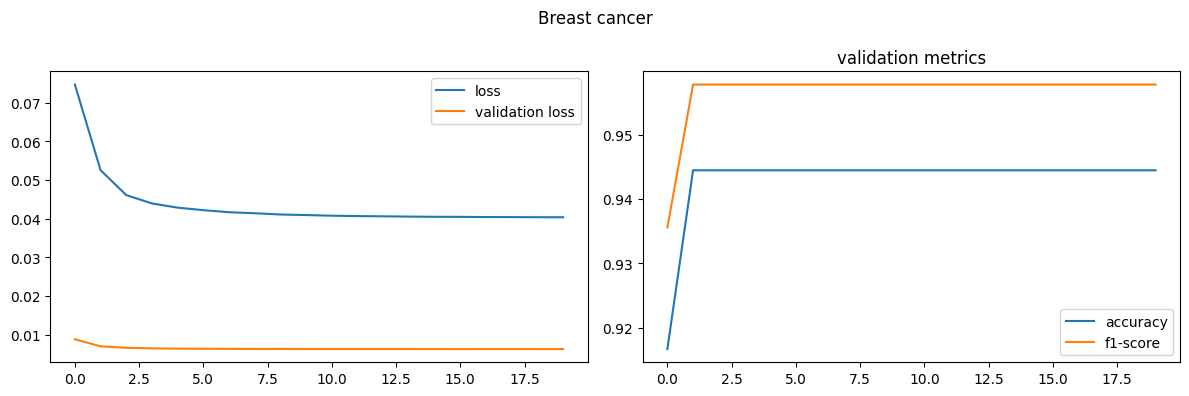

In [8]:
datasets = breast_cancer_datasets

model = BreastCancerNN(len(breast_cancer_headers), (32, 32), 2)
optimizer = optimizer_factory(model)

metrics = model_train(datasets, model, optimizer, criterion, score_outputs, 20)

with torch.no_grad():
    inputs, targets = datasets["test"][:]
    outputs = model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test: {labels}: {test_metrics}")
plot_metrics('Breast cancer', metrics, labels)

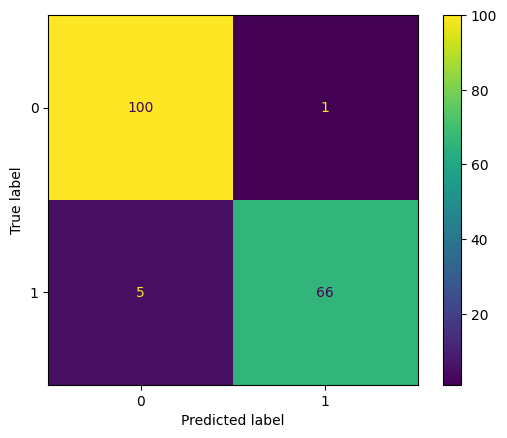

In [9]:
ConfusionMatrixDisplay.from_predictions(targets, outputs.argmax(dim=1))
plt.show()

## DGSM

In [10]:
best_model = BreastCancerNN(len(breast_cancer_headers), (32, 32), 2)

### input layer

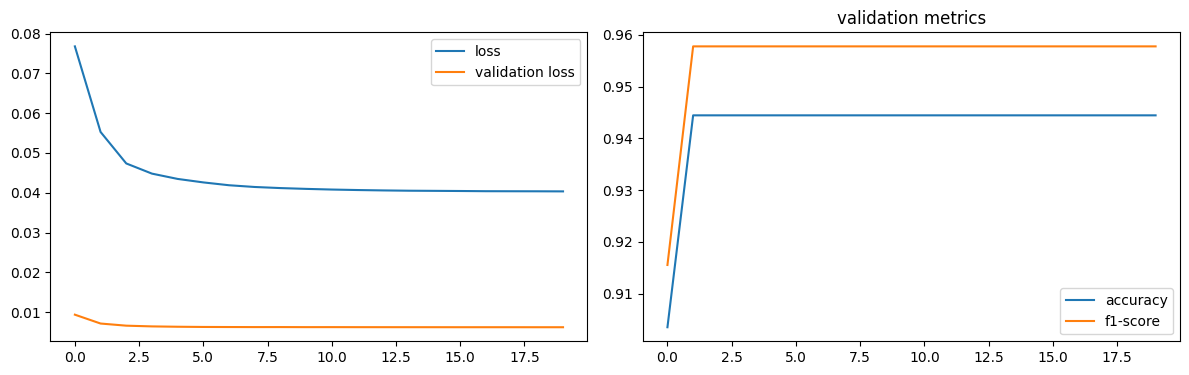

Test: loss: 0.34992516040802, avg metrics: (0.9606749534606933, 0.963766074180603)
dropping feature: (8, 'symmetry1')


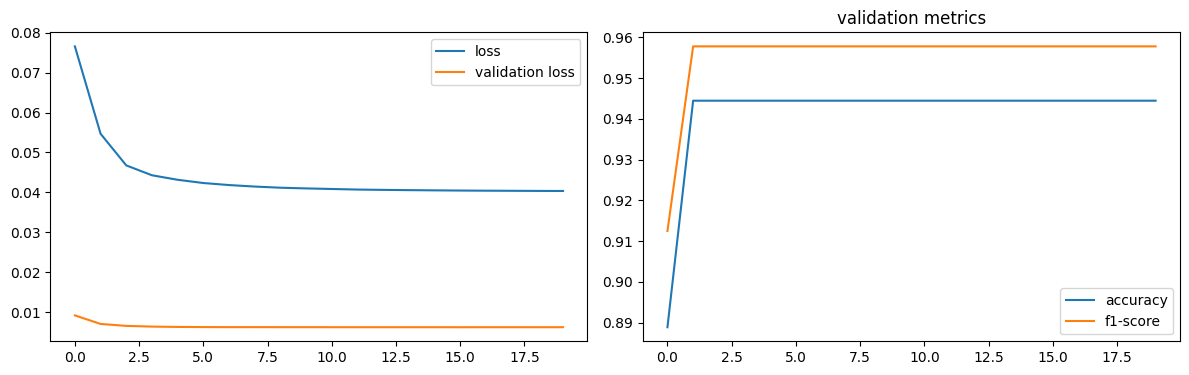

Test: loss: 0.34587907791137695, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (13, 'smoothness2')


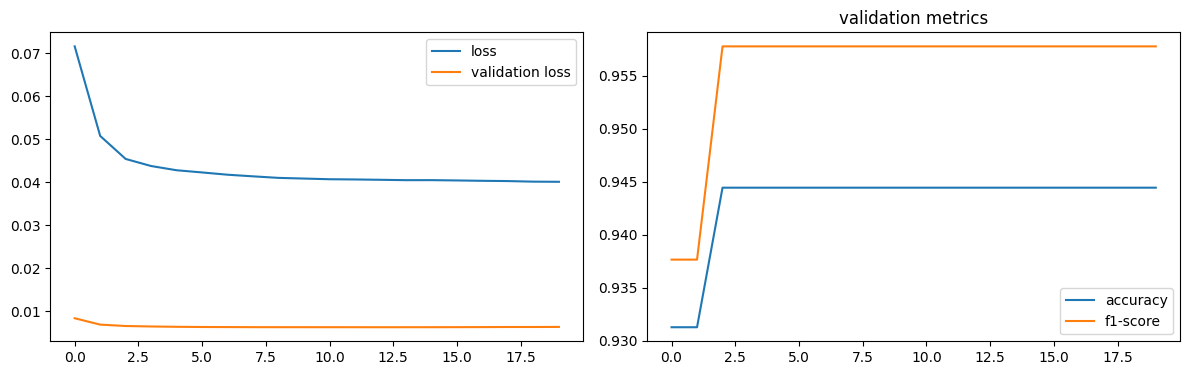

Test: loss: 0.3551272451877594, avg metrics: (0.9554594993591309, 0.9588787674903869)
dropping feature: (14, 'concavity2')


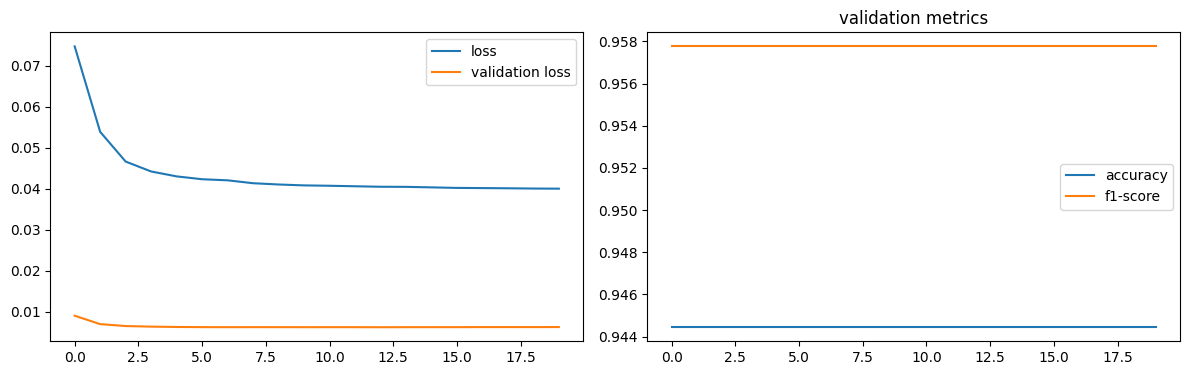

Test: loss: 0.35418692231178284, avg metrics: (0.9568679451942443, 0.9601216077804565)
dropping feature: (10, 'texture2')


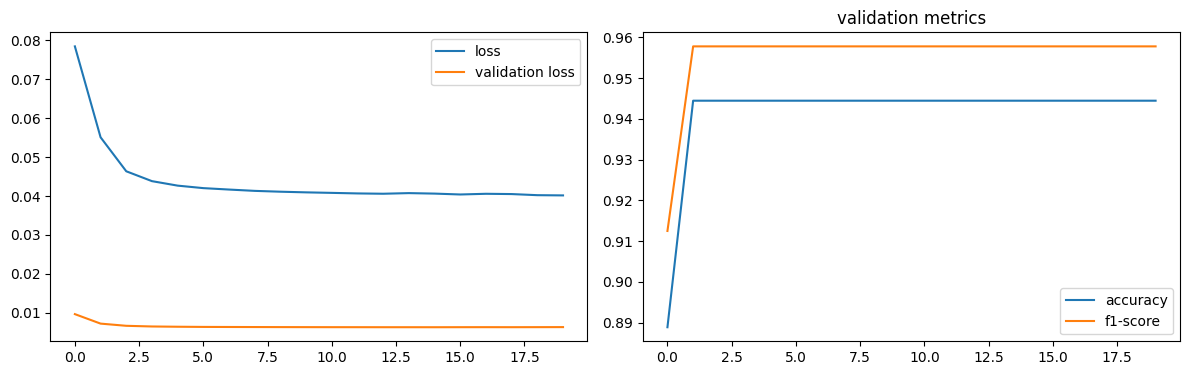

Test: loss: 0.35191771388053894, avg metrics: (0.9644819498062134, 0.967398750782013)
dropping feature: (13, 'concave_points2')


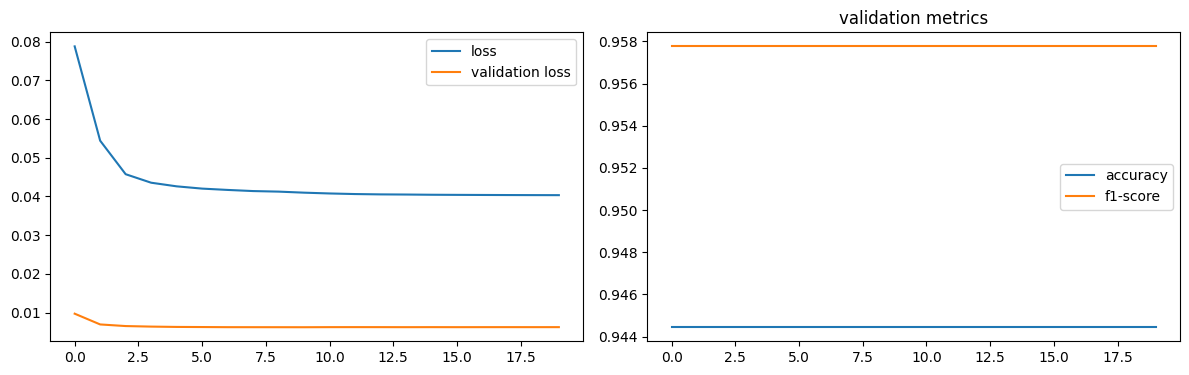

Test: loss: 0.34778186678886414, avg metrics: (0.9588481545448303, 0.9625012397766113)
dropping feature: (24, 'fractal_dimension3')


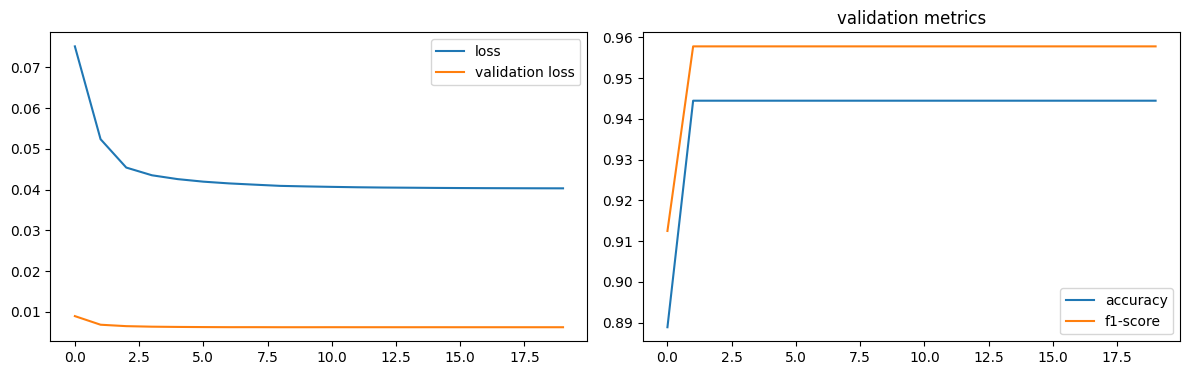

Test: loss: 0.3444306254386902, avg metrics: (0.9626551628112793, 0.9661463975906373)
dropping feature: (20, 'compactness3')


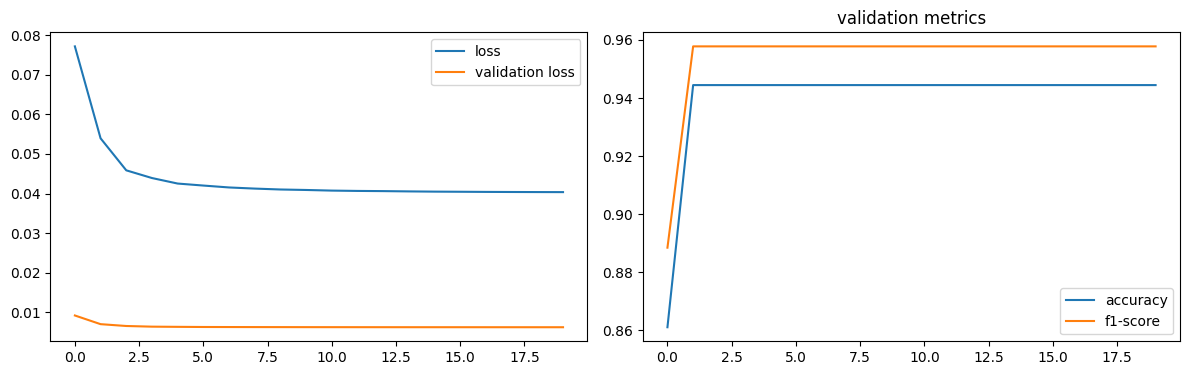

Test: loss: 0.34626609086990356, avg metrics: (0.9626551508903504, 0.9661400079727173)
dropping feature: (5, 'compactness1')


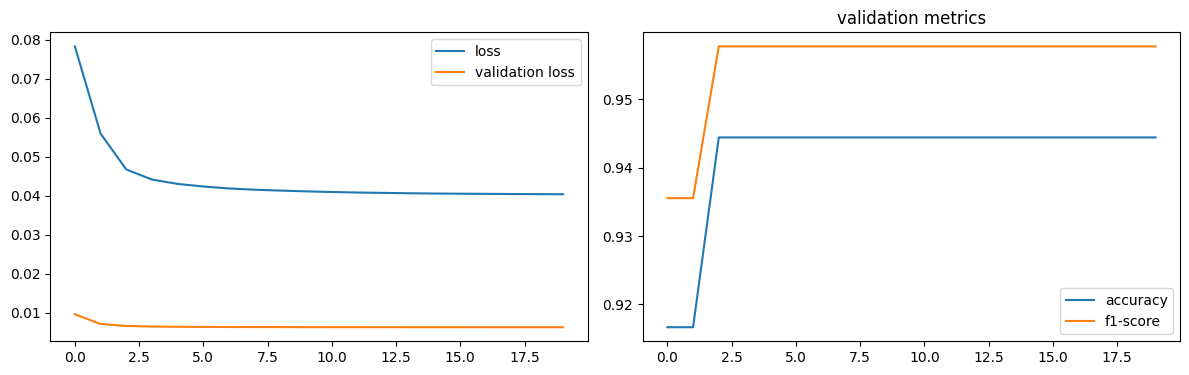

Test: loss: 0.3397364020347595, avg metrics: (0.9654720544815063, 0.968595004081726)
dropping feature: (13, 'fractal_dimension2')


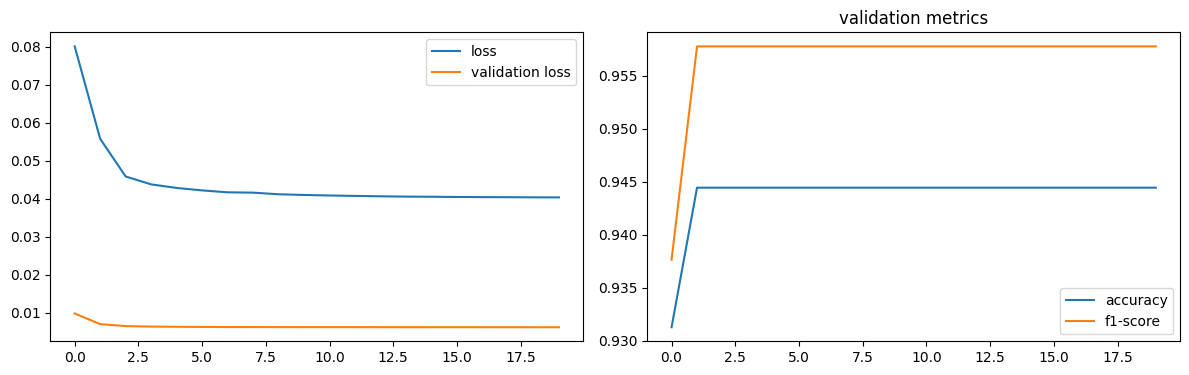

Test: loss: 0.34759989380836487, avg metrics: (0.9527959823608398, 0.9575376510620117)
dropping feature: (4, 'smoothness1')


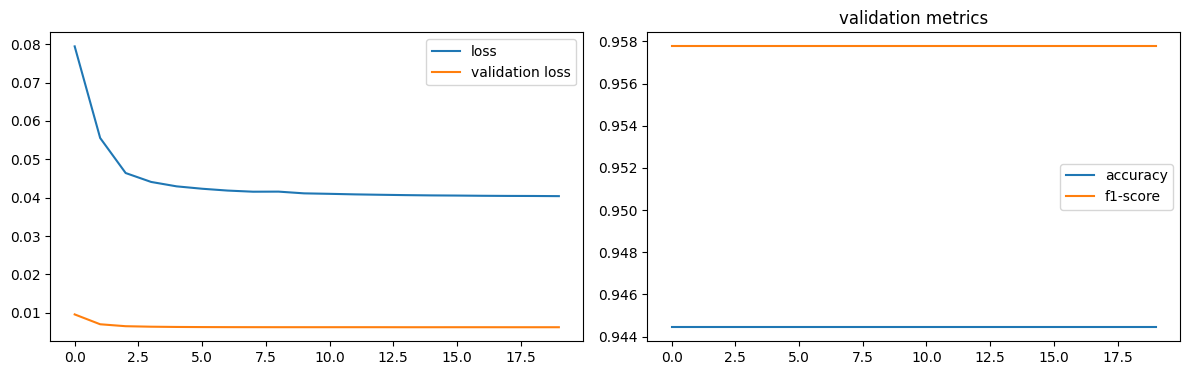

Test: loss: 0.3406260311603546, avg metrics: (0.9602566003799439, 0.9637262344360351)
dropping feature: (0, 'radius1')


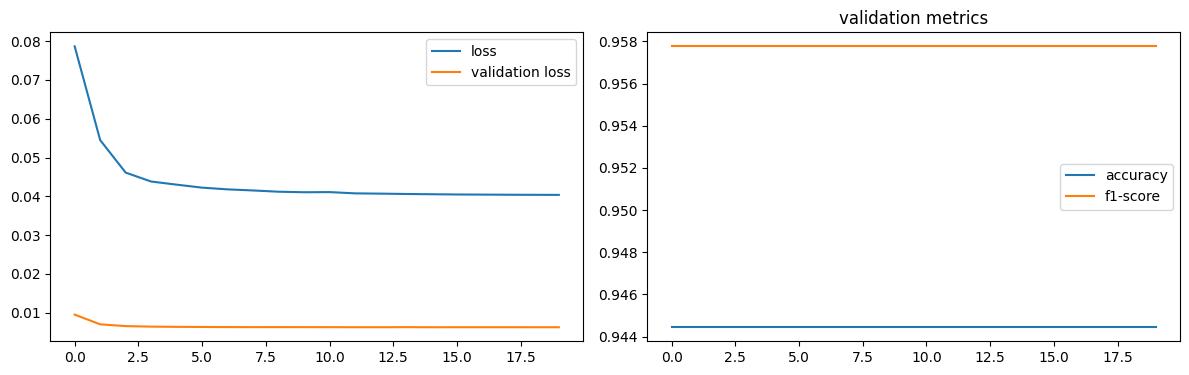

Test: loss: 0.3415263593196869, avg metrics: (0.9612467050552368, 0.9649203062057495)
dropping feature: (10, 'symmetry2')


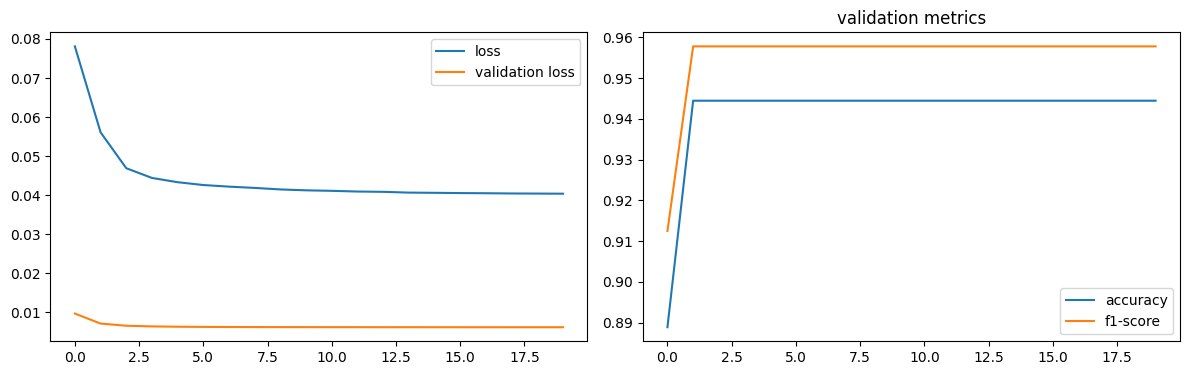

Test: loss: 0.34087124466896057, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (17, 'symmetry3')


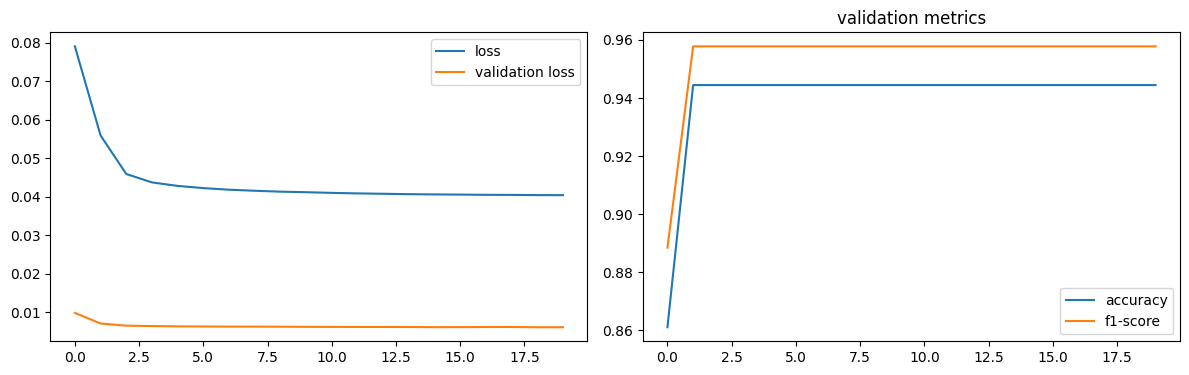

Test: loss: 0.3437093496322632, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (3, 'concavity1')


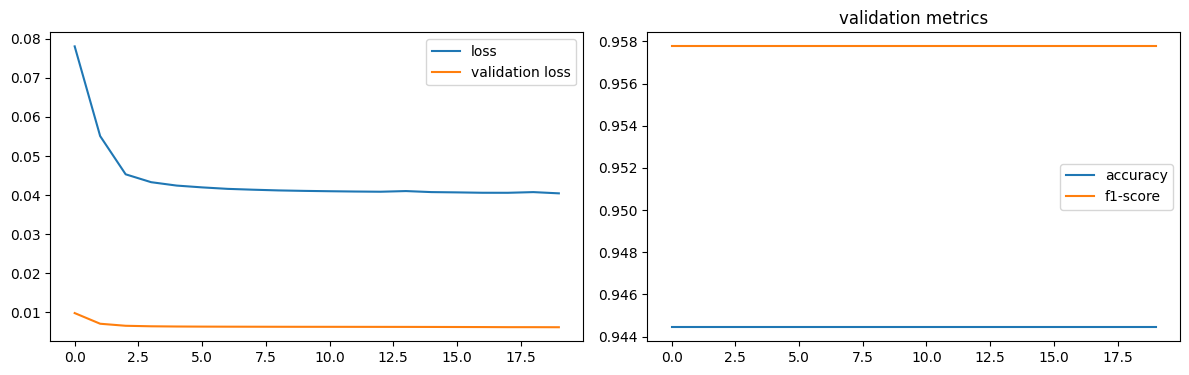

Test: loss: 0.34195539355278015, avg metrics: (0.9682889461517334, 0.9710375189781189)
dropping feature: (4, 'fractal_dimension1')


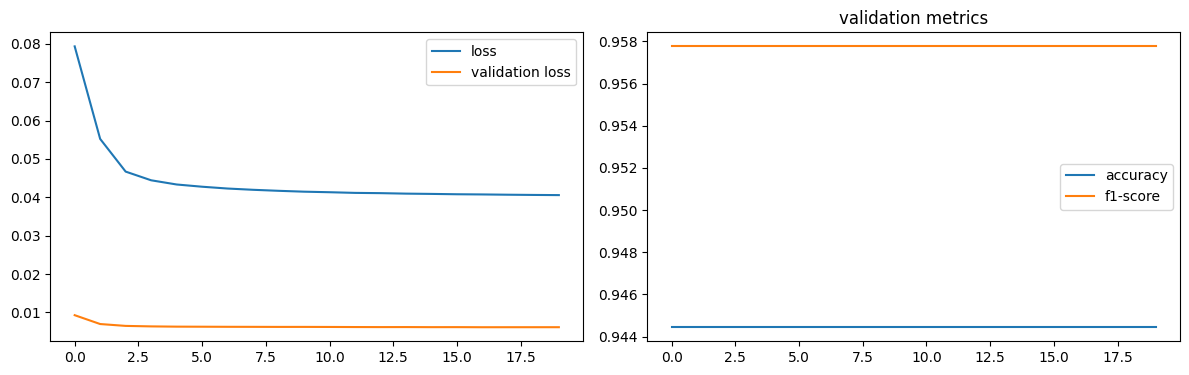

Test: loss: 0.3411690592765808, avg metrics: (0.9725142836570739, 0.9746921539306641)
dropping feature: (5, 'perimeter2')


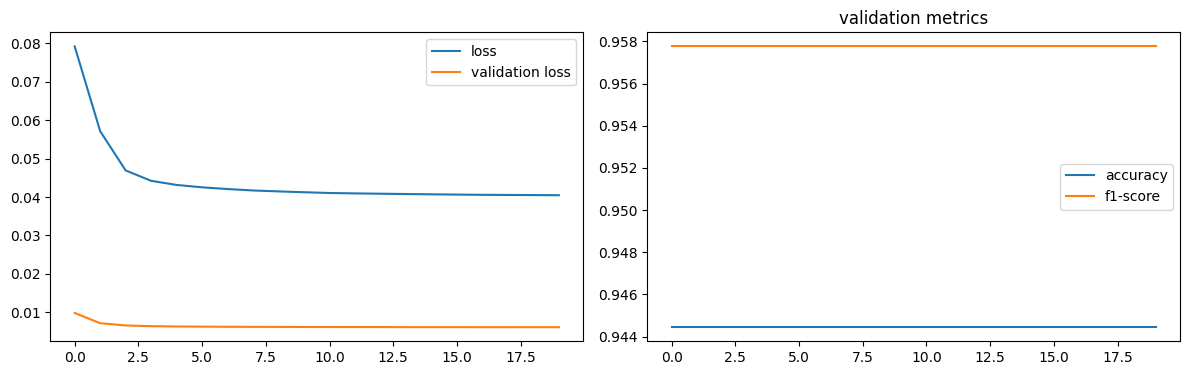

Test: loss: 0.3402378559112549, avg metrics: (0.9711058378219605, 0.9734739422798157)
dropping feature: (8, 'texture3')


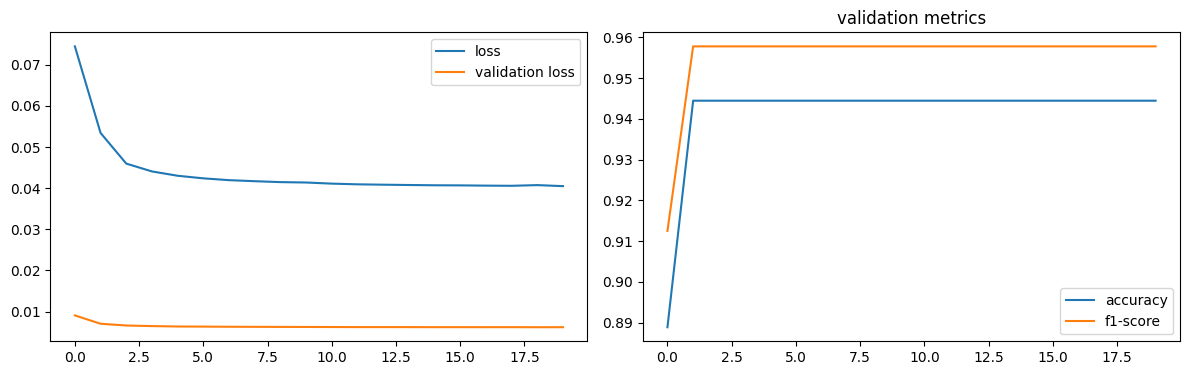

Test: loss: 0.34127023816108704, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (2, 'area1')


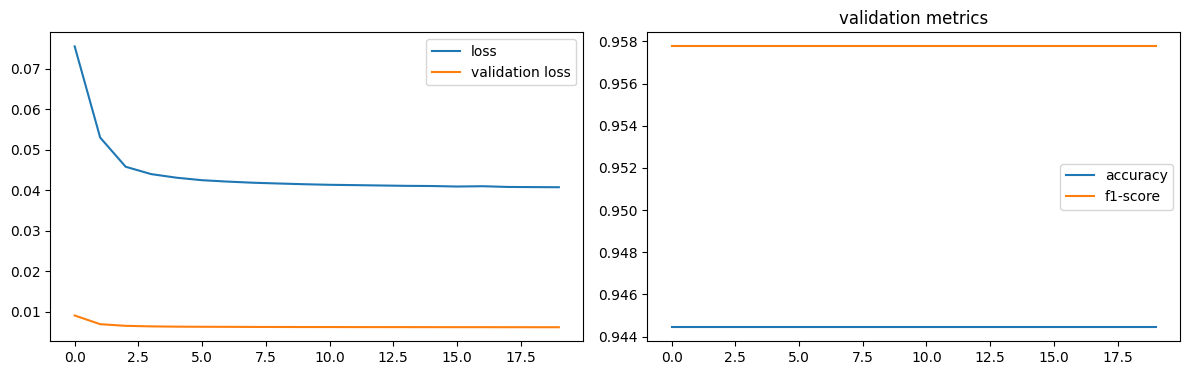

Test: loss: 0.3428651690483093, avg metrics: (0.9663087606430054, 0.9686555504798889)
dropping feature: (1, 'perimeter1')


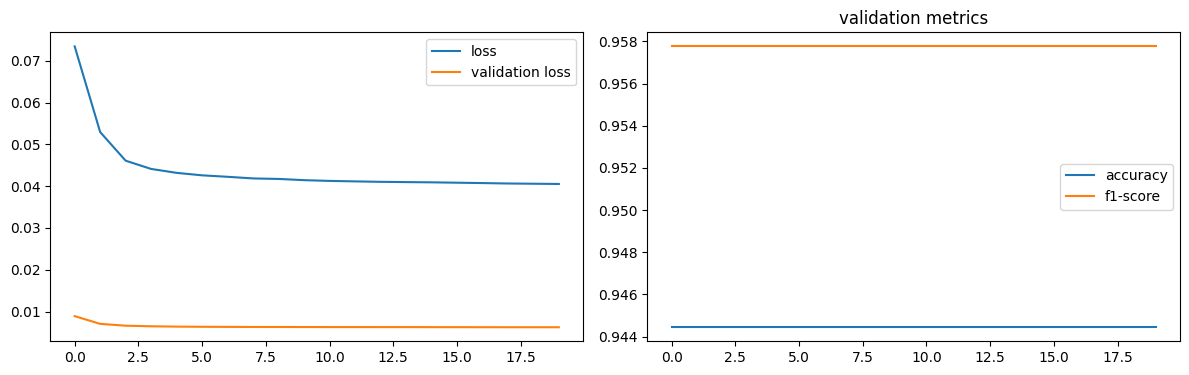

Test: loss: 0.3438214957714081, avg metrics: (0.9649003148078918, 0.9674429178237915)
dropping feature: (2, 'radius2')


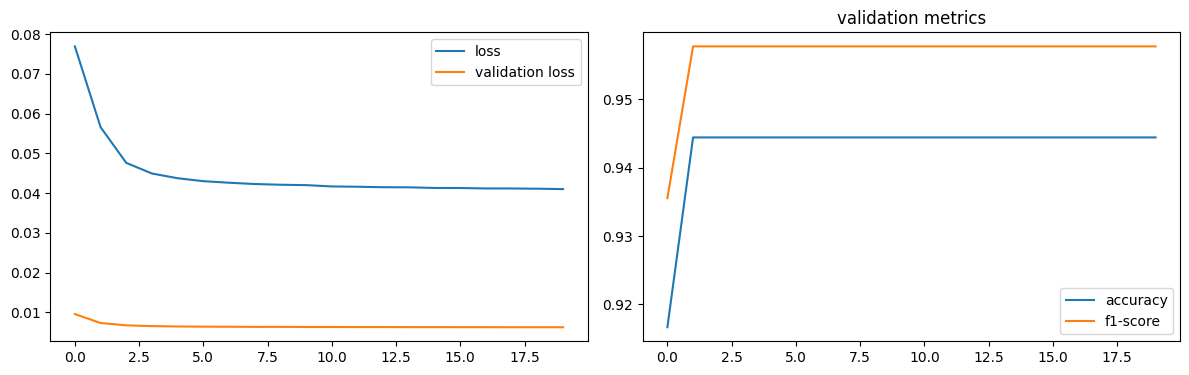

Test: loss: 0.34326809644699097, avg metrics: (0.9653186678886414, 0.9674652814865112)
dropping feature: (3, 'compactness2')


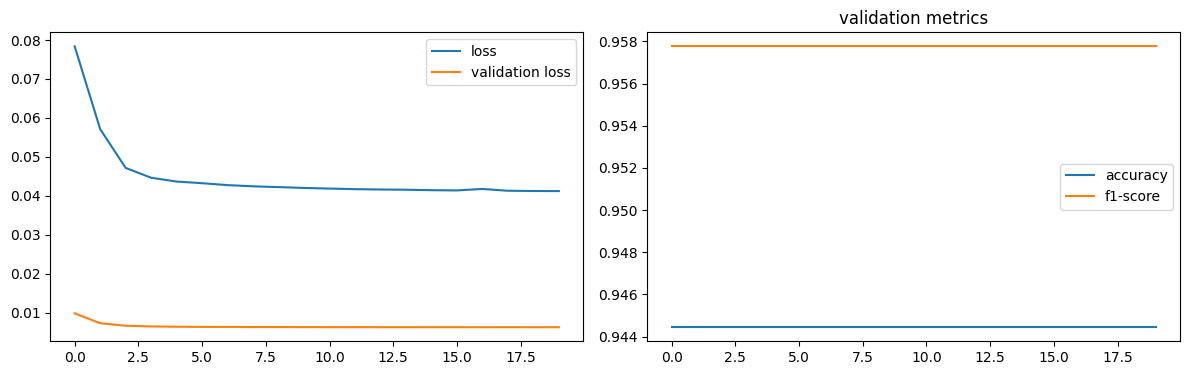

Test: loss: 0.33516258001327515, avg metrics: (0.9795565605163574, 0.9807600855827332)
dropping feature: (1, 'concave_points1')


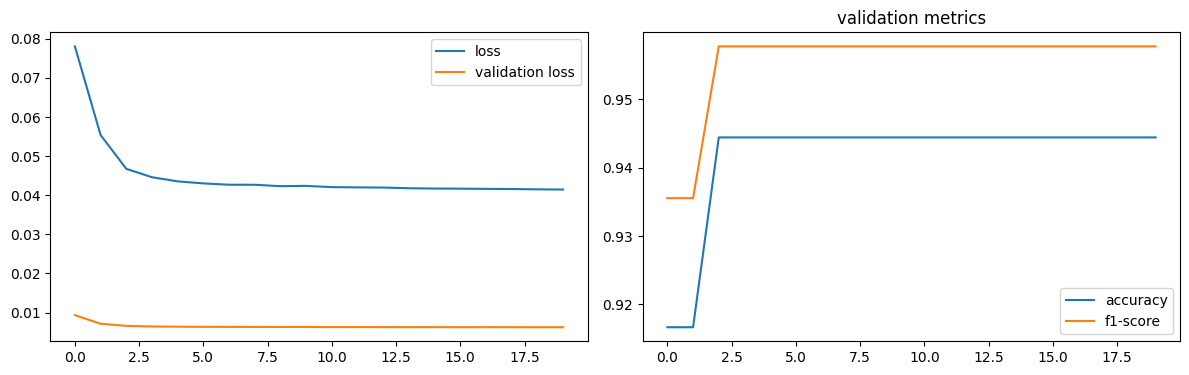

Test: loss: 0.33339062333106995, avg metrics: (0.9767396450042725, 0.9783352255821228)
dropping feature: (7, 'concave_points3')


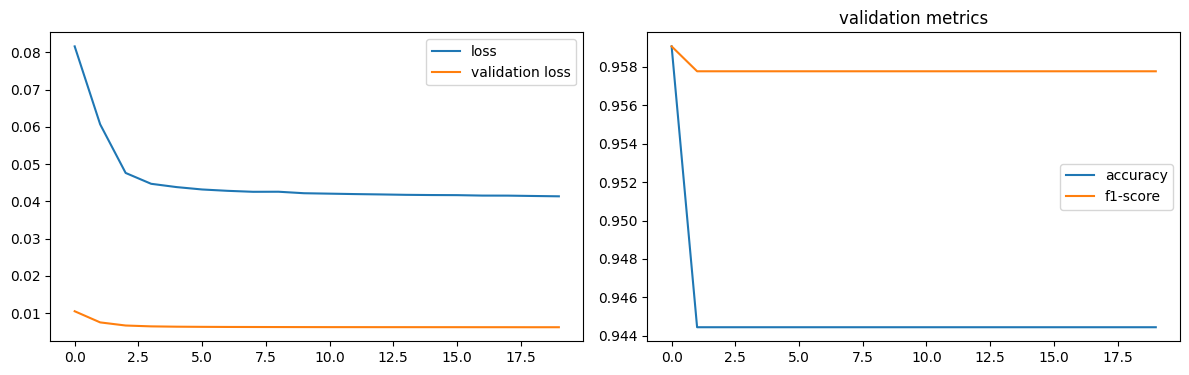

Test: loss: 0.33792102336883545, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (6, 'concavity3')


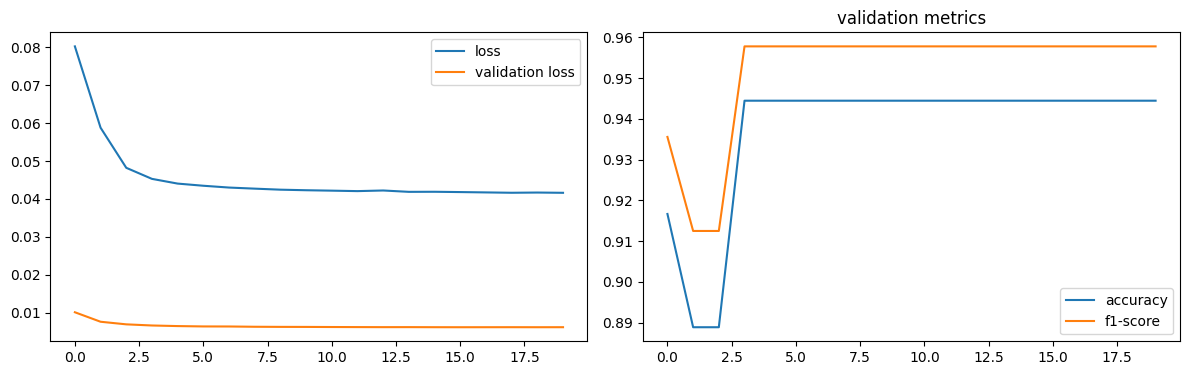

Test: loss: 0.3390788733959198, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'perimeter3')


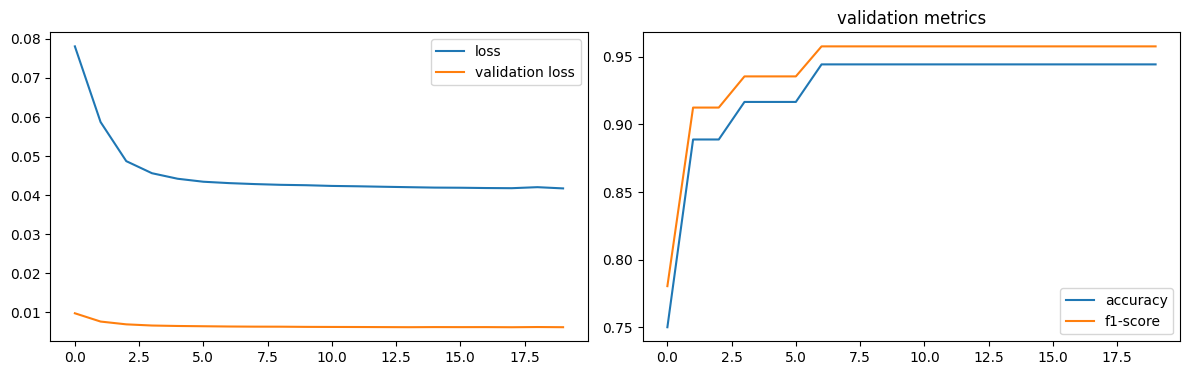

Test: loss: 0.34108227491378784, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (0, 'texture1')


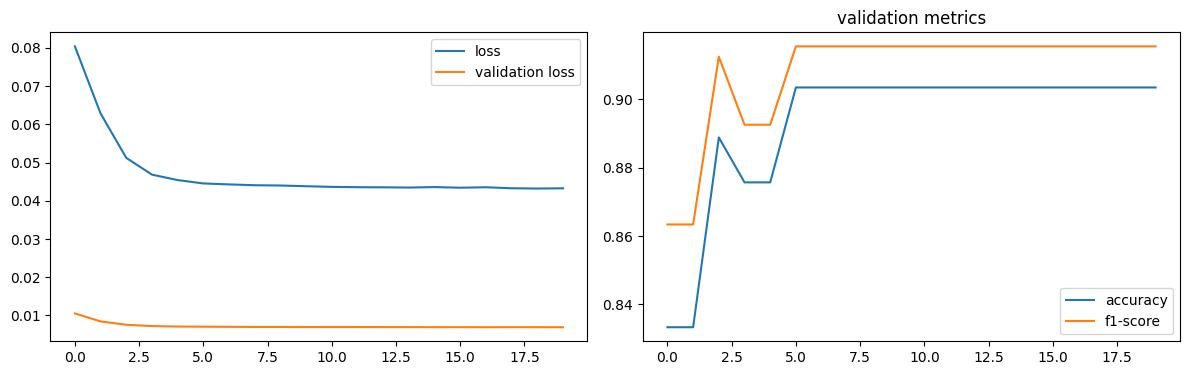

Test: loss: 0.36129602789878845, avg metrics: (0.9428949952125549, 0.9456746578216553)
dropping feature: (0, 'area2')


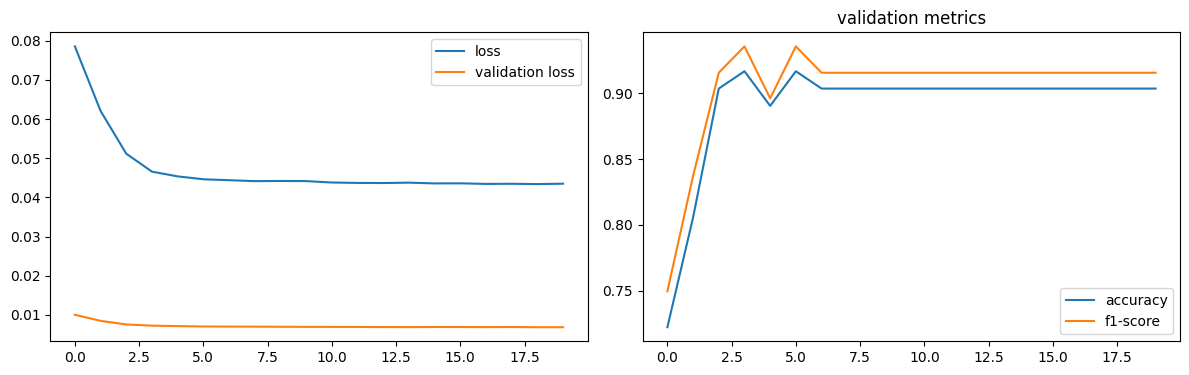

Test: loss: 0.3626759648323059, avg metrics: (0.9428949952125549, 0.9456746578216553)
dropping feature: (2, 'smoothness3')


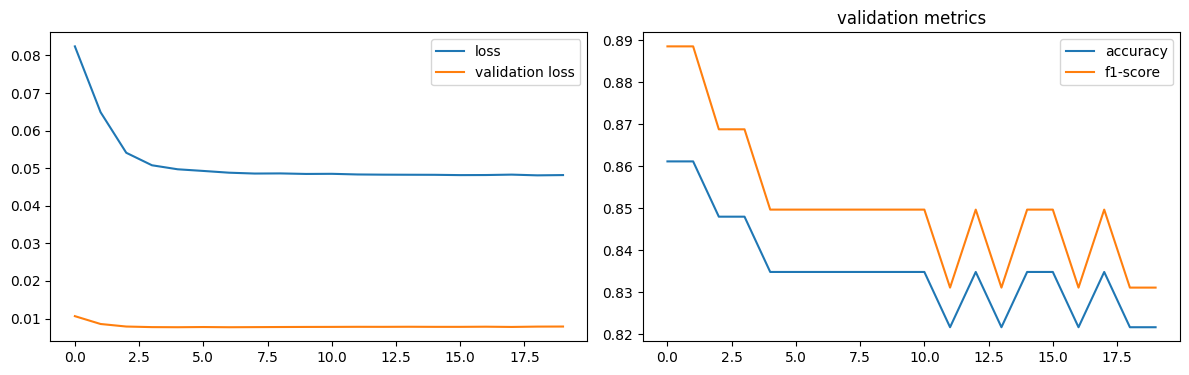

Test: loss: 0.40379199385643005, avg metrics: (0.8977827429771423, 0.9027149677276611)
dropping feature: (1, 'area3')


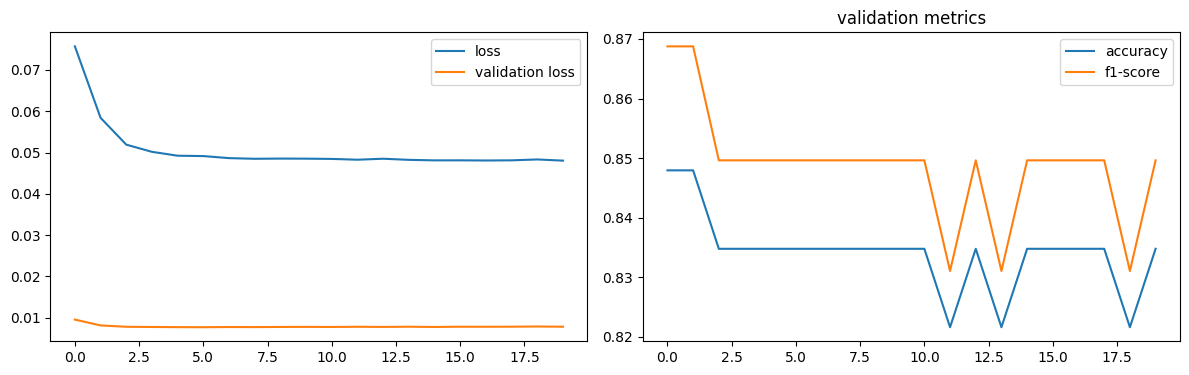

Test: loss: 0.40617215633392334, avg metrics: (0.8989262223243714, 0.9048480272293091)


In [11]:
torch.manual_seed(2024)

datasets = breast_cancer_datasets.copy()
headers = breast_cancer_headers.copy()


def model_factory(size):
    return BreastCancerNN(size, (32, 32), 2)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs, 20,
    labels, "", None
)

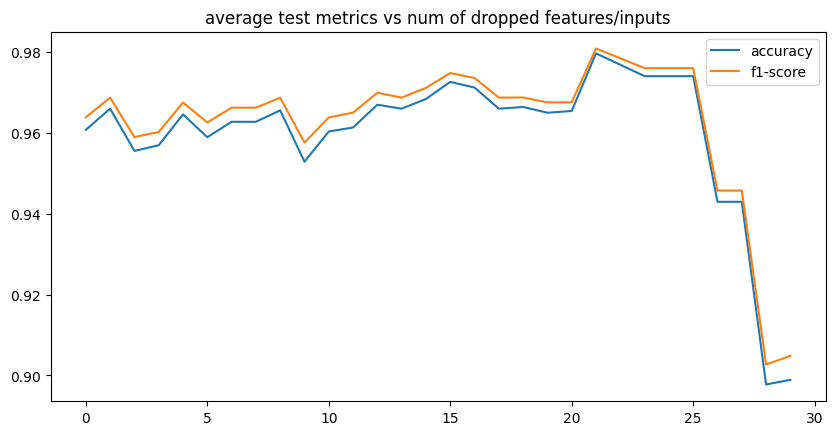

In [12]:
plot_dropping_metrics(test_metrics, labels)

In [13]:
num_drop_features = 21

save_models("breast", "dgsm-layer1", models, dropped)

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_features)
layer = models[num_drop_features].layer1

best_model.layer1 = layer

dgsm_datasets = reduced_datasets

features left [9]:  ['texture1', 'concave_points1', 'area2', 'radius3', 'perimeter3', 'area3', 'smoothness3', 'concavity3', 'concave_points3']


### 1st hidden layer

In [14]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

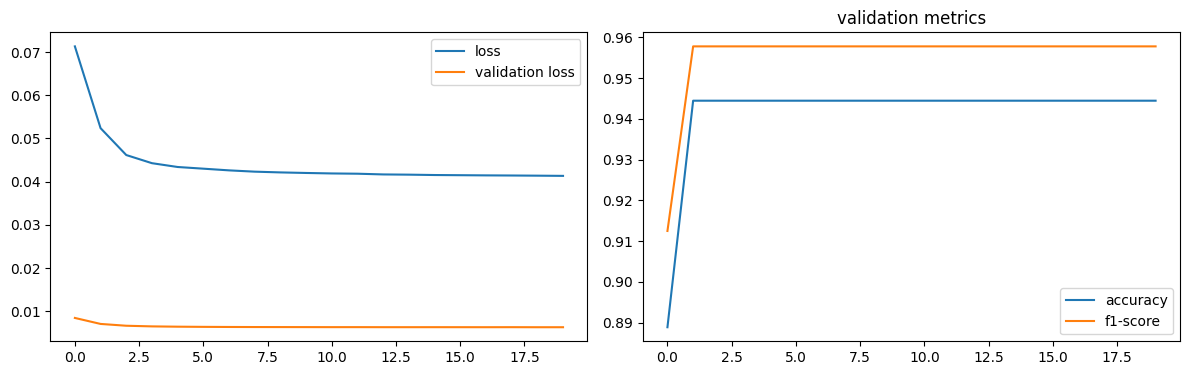

Test: loss: 0.33629828691482544, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (0, 'neuron0')


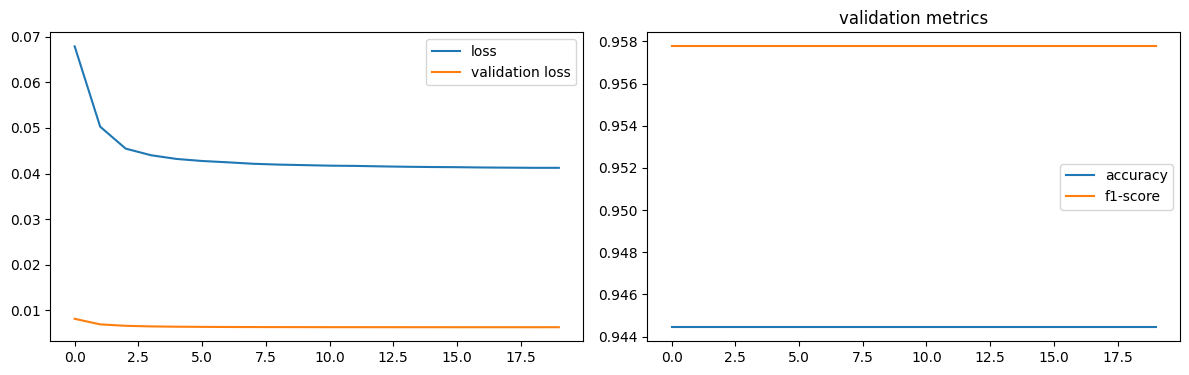

Test: loss: 0.33654409646987915, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (6, 'neuron7')


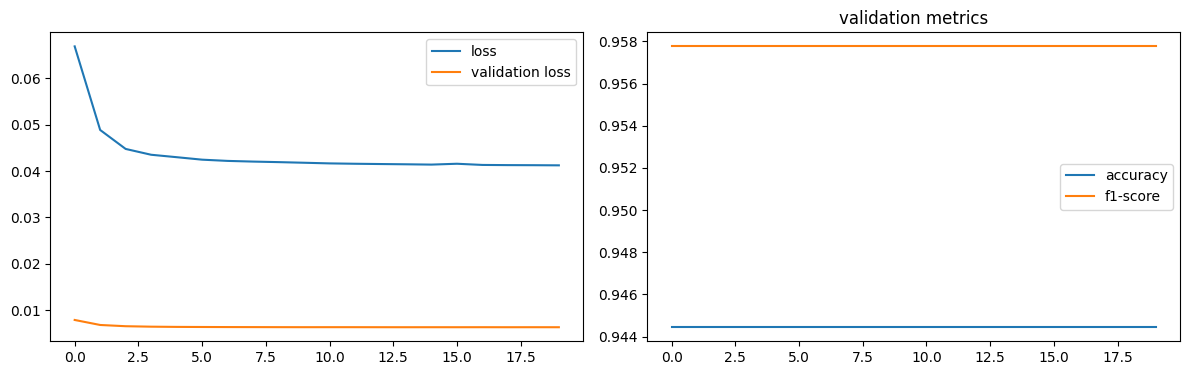

Test: loss: 0.3362155556678772, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (23, 'neuron25')


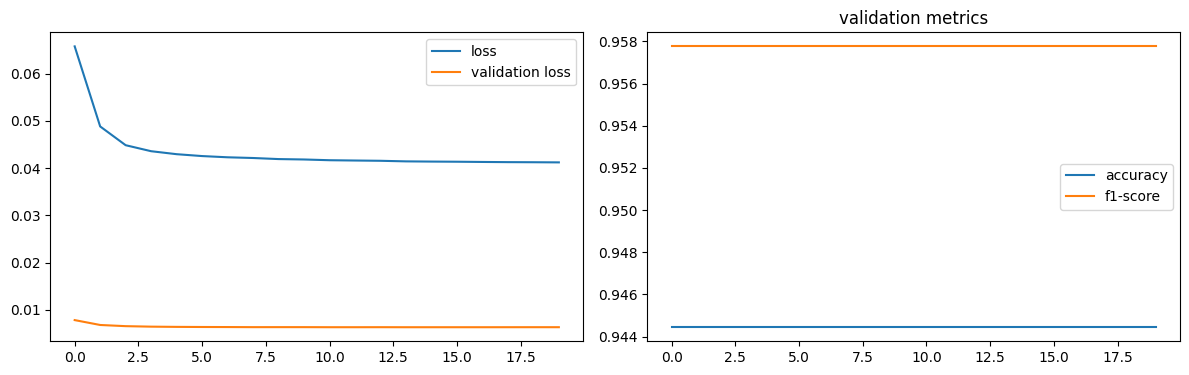

Test: loss: 0.33669984340667725, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (17, 'neuron19')


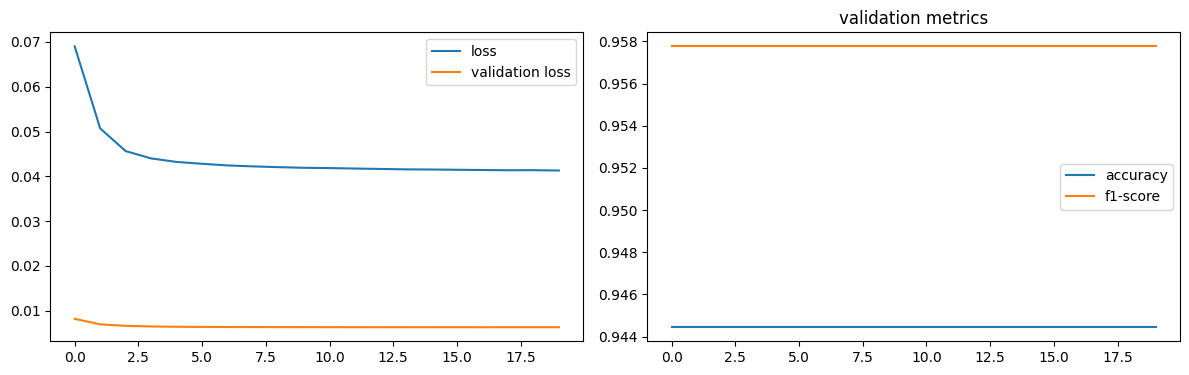

Test: loss: 0.3376305401325226, avg metrics: (0.9795565605163574, 0.9807600855827332)
dropping feature: (5, 'neuron6')


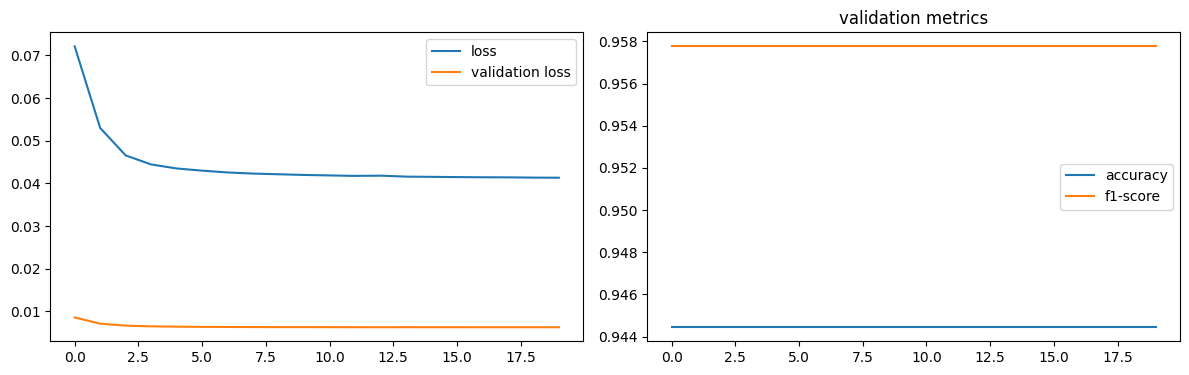

Test: loss: 0.3374631106853485, avg metrics: (0.9785664558410645, 0.9795684814453125)
dropping feature: (22, 'neuron27')


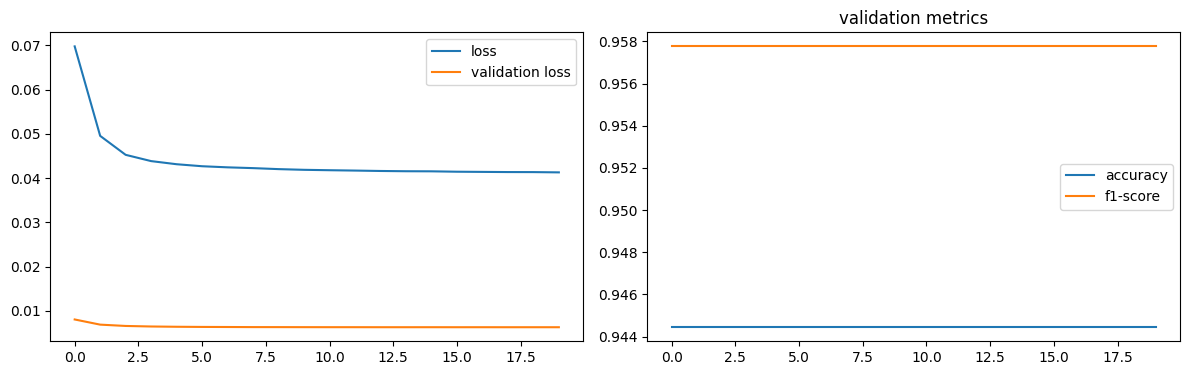

Test: loss: 0.33724501729011536, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (17, 'neuron21')


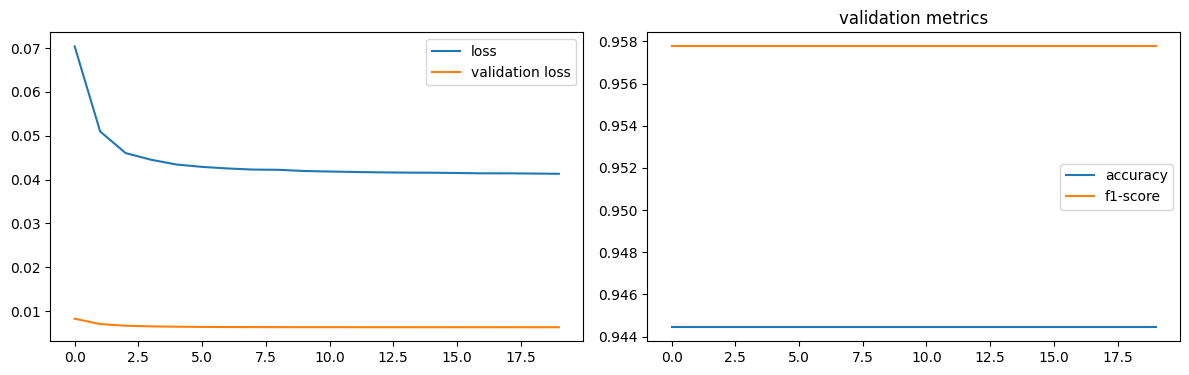

Test: loss: 0.33682018518447876, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (22, 'neuron29')


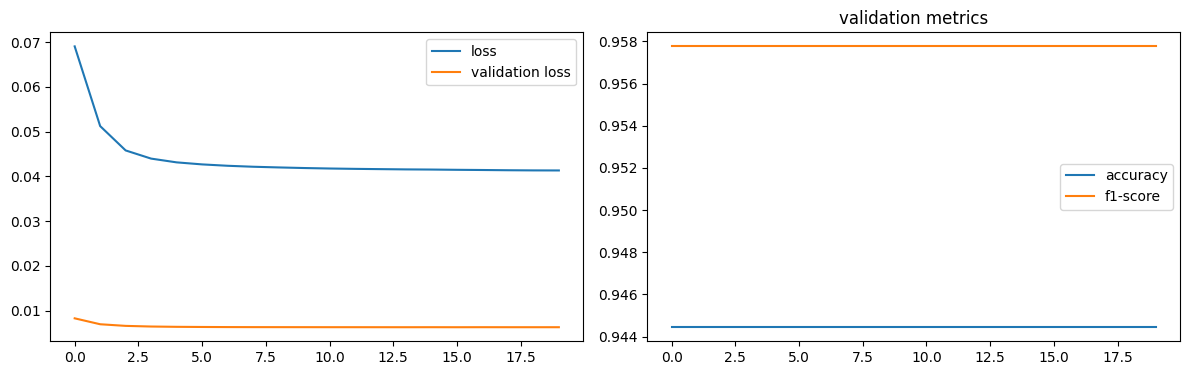

Test: loss: 0.33664706349372864, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (13, 'neuron16')


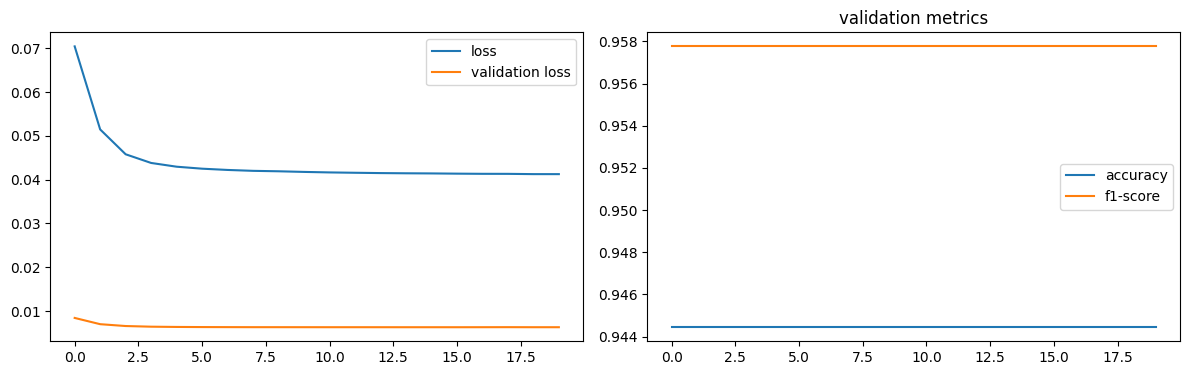

Test: loss: 0.336258202791214, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (20, 'neuron28')


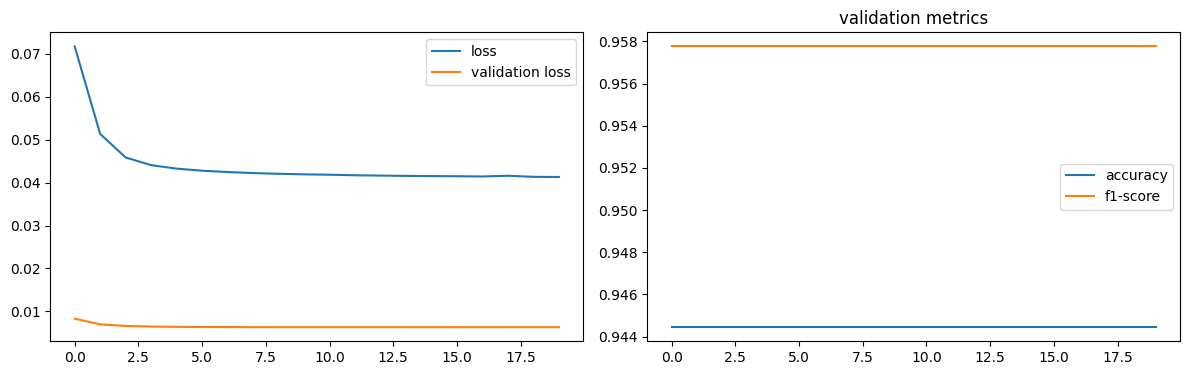

Test: loss: 0.3367615342140198, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (17, 'neuron23')


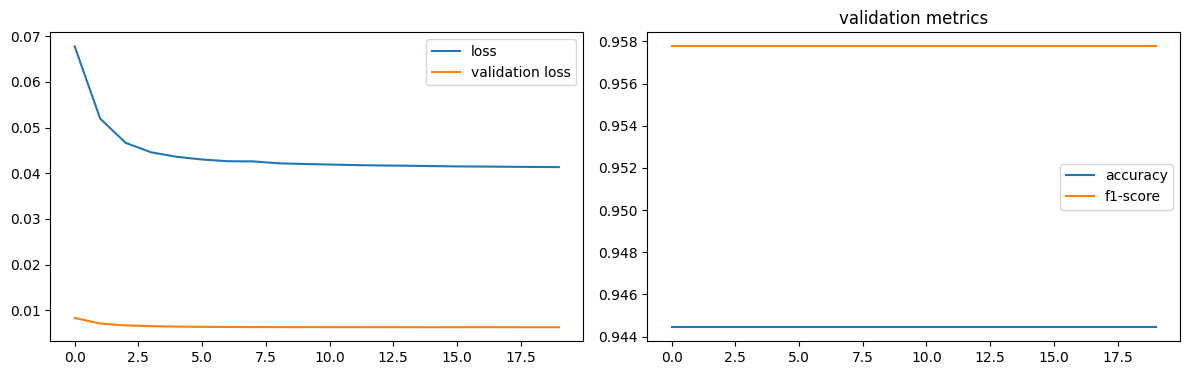

Test: loss: 0.336648166179657, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (7, 'neuron10')


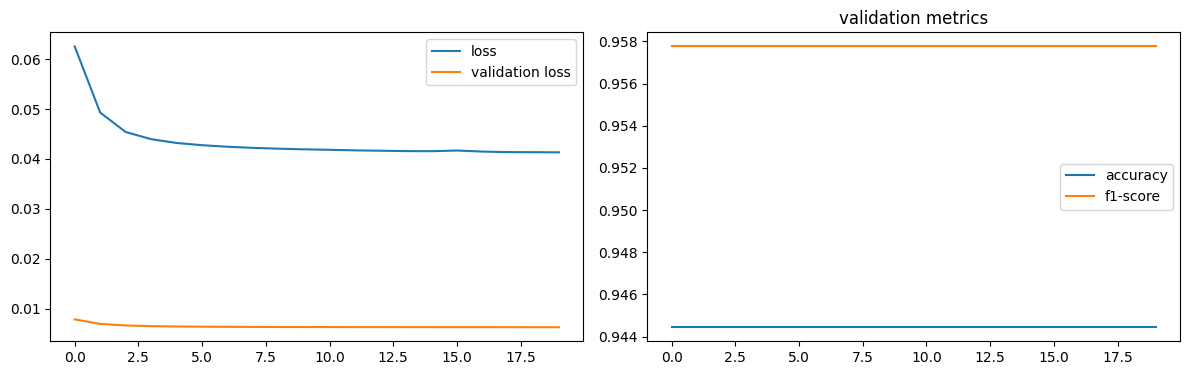

Test: loss: 0.3362123966217041, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (4, 'neuron5')


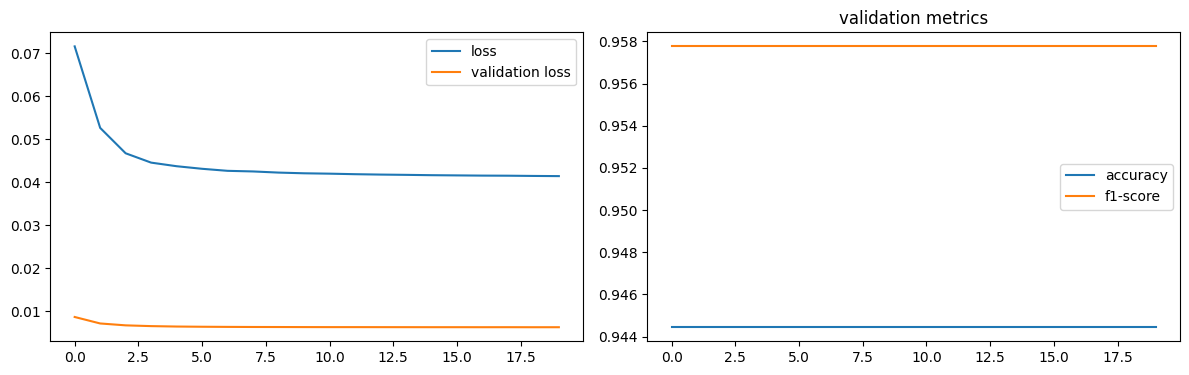

Test: loss: 0.33734291791915894, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (13, 'neuron20')


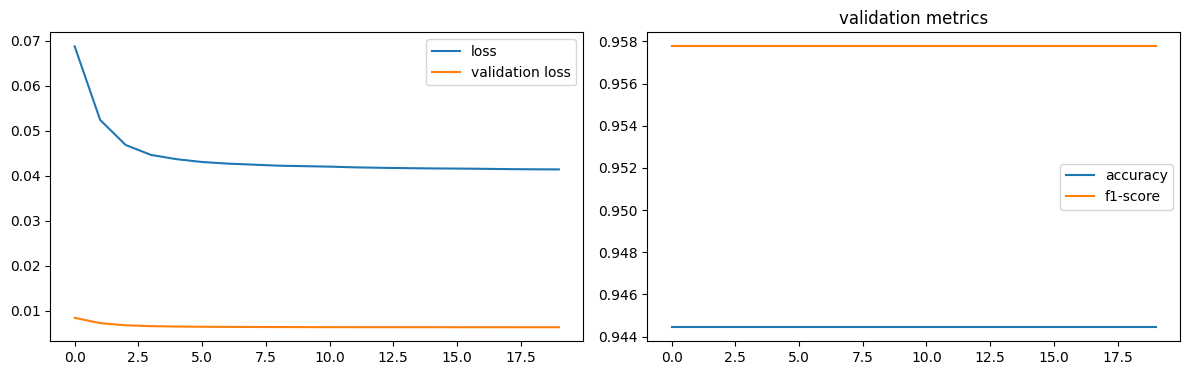

Test: loss: 0.3374840021133423, avg metrics: (0.9781481027603149, 0.979547655582428)
dropping feature: (8, 'neuron13')


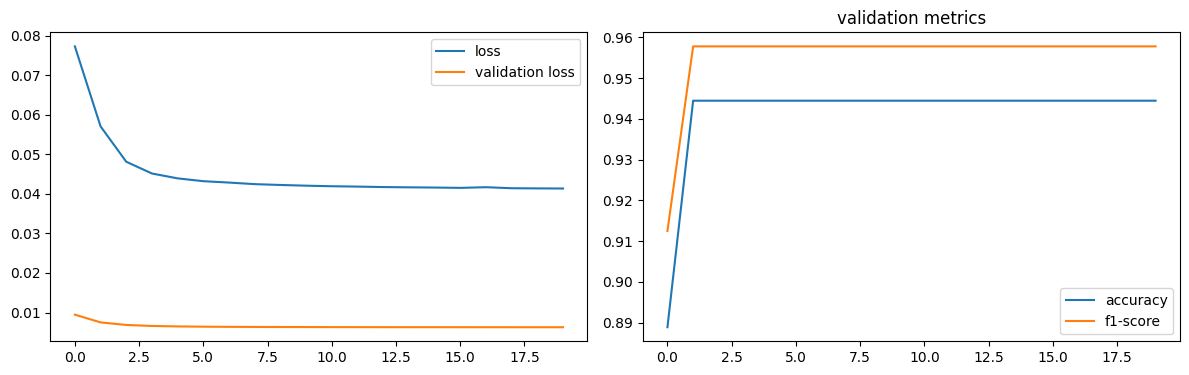

Test: loss: 0.3368663191795349, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (4, 'neuron8')


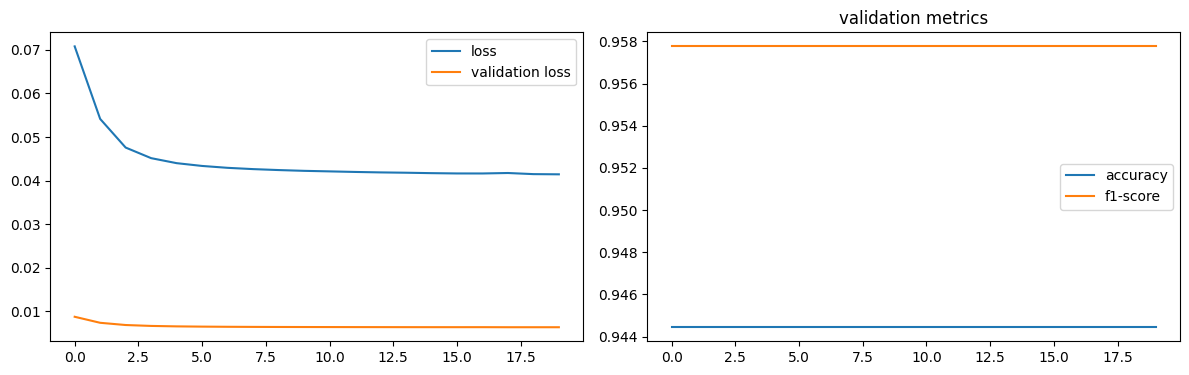

Test: loss: 0.33828064799308777, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (6, 'neuron12')


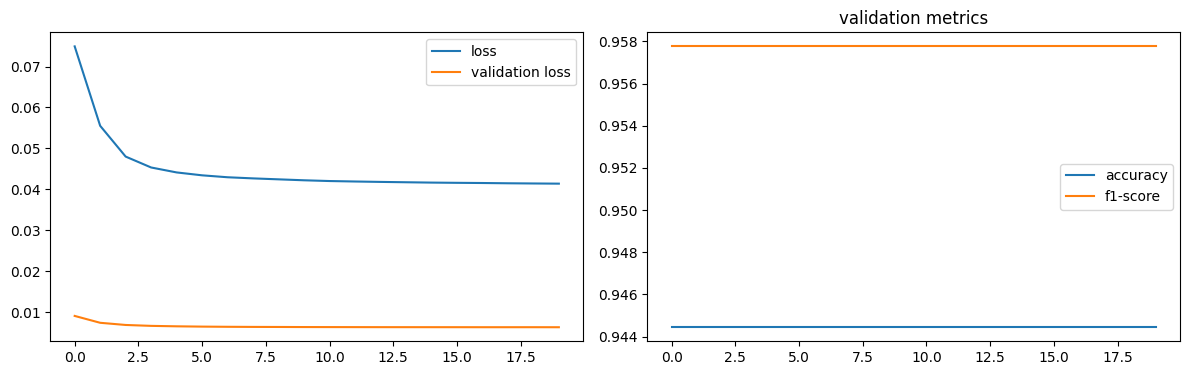

Test: loss: 0.33820733428001404, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron4')


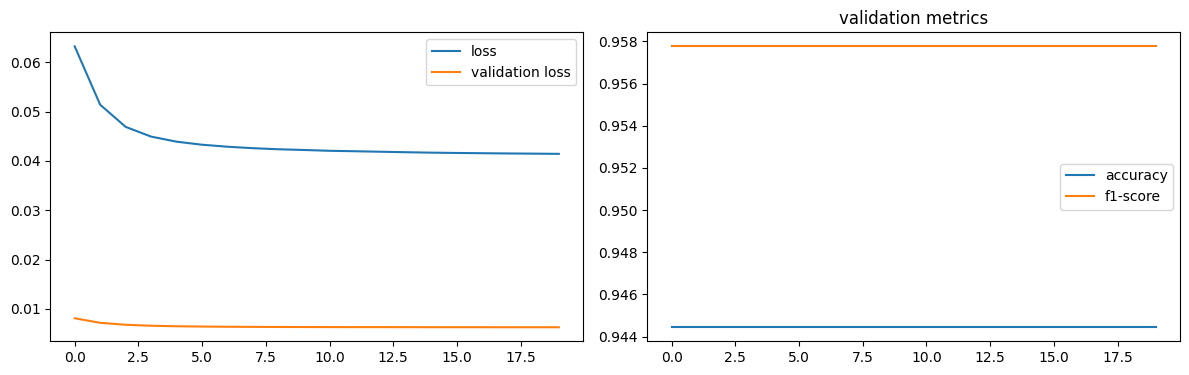

Test: loss: 0.3385589122772217, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (12, 'neuron30')


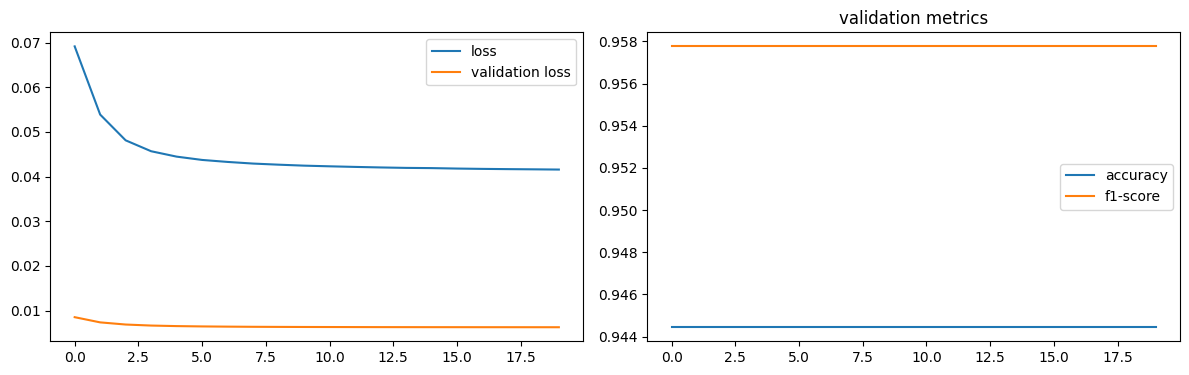

Test: loss: 0.33951395750045776, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (2, 'neuron3')


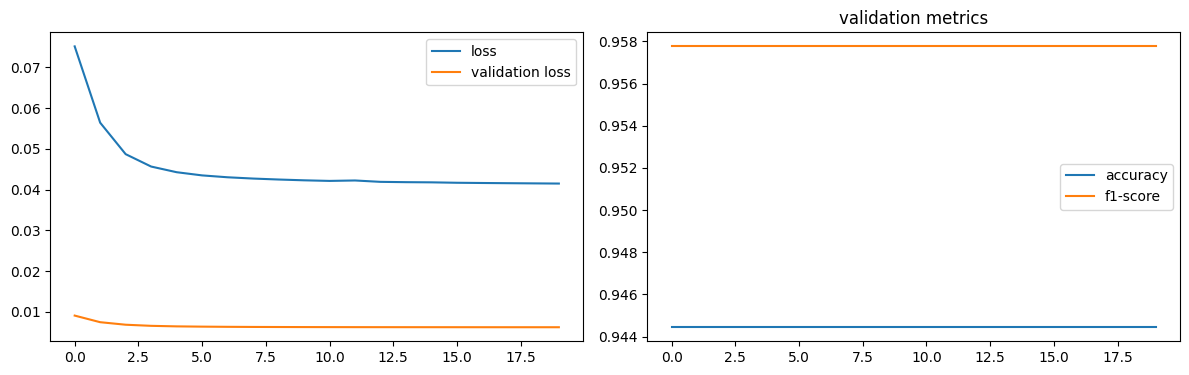

Test: loss: 0.3384972810745239, avg metrics: (0.9767396569252014, 0.9783294439315796)
dropping feature: (0, 'neuron1')


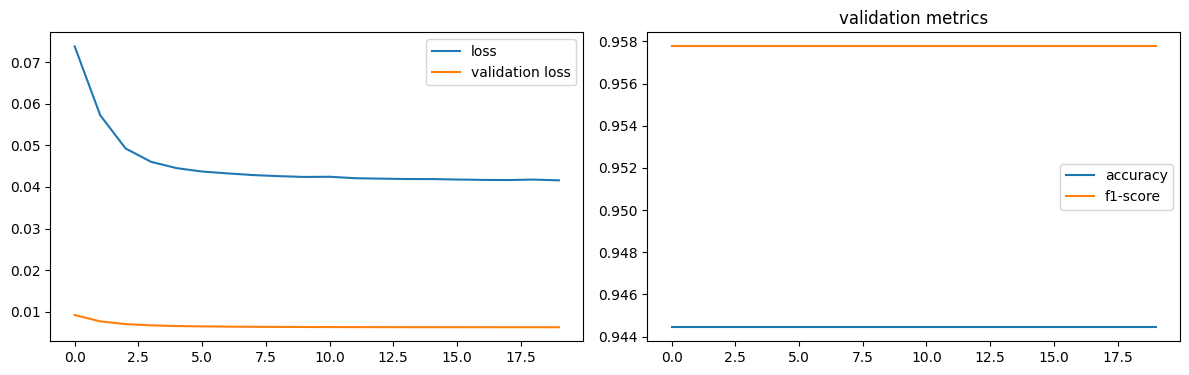

Test: loss: 0.3384242653846741, avg metrics: (0.9682889461517334, 0.9710375189781189)
dropping feature: (3, 'neuron14')


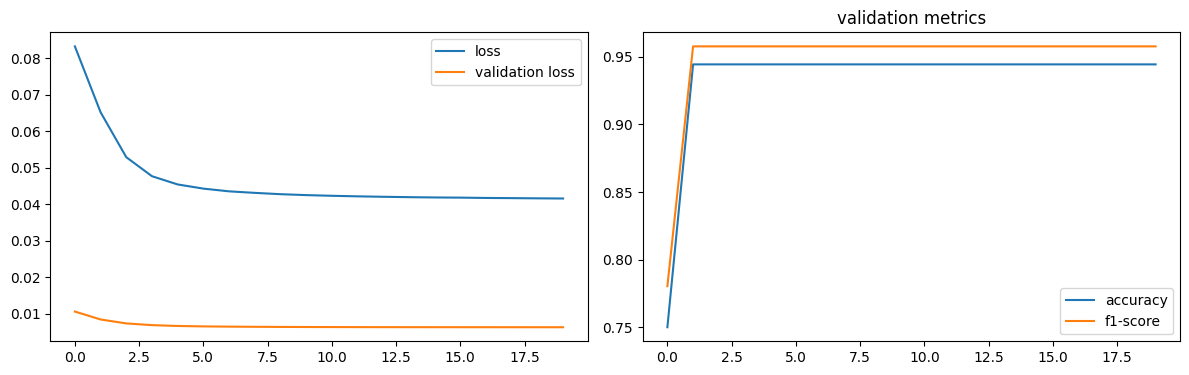

Test: loss: 0.33808568120002747, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (4, 'neuron17')


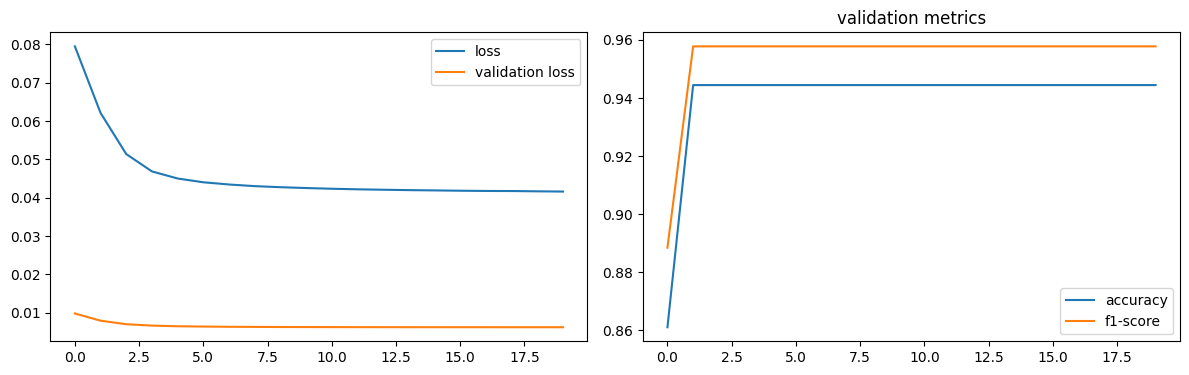

Test: loss: 0.33809196949005127, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (8, 'neuron31')


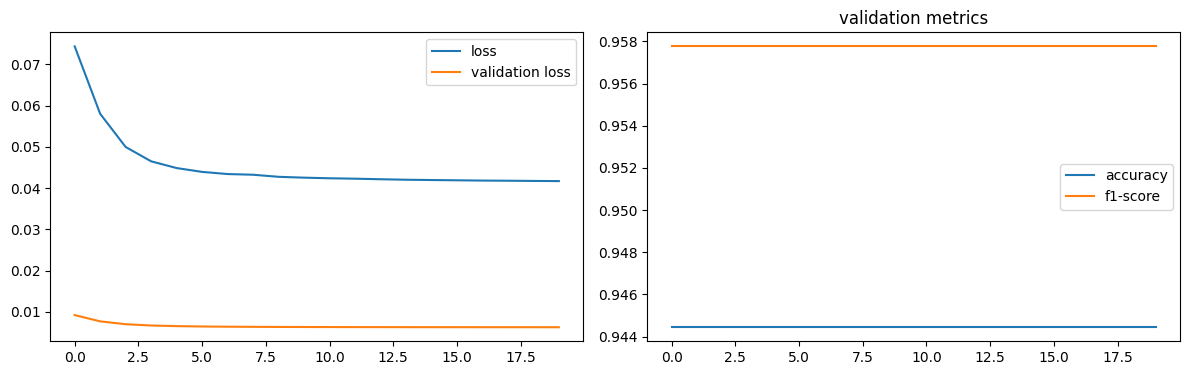

Test: loss: 0.3374236226081848, avg metrics: (0.9781481027603149, 0.979547655582428)
dropping feature: (7, 'neuron26')


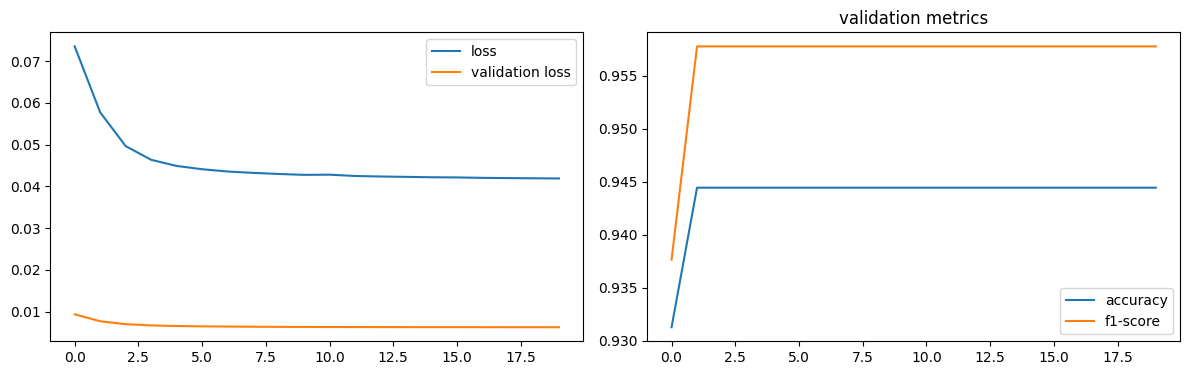

Test: loss: 0.3407839238643646, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (6, 'neuron24')


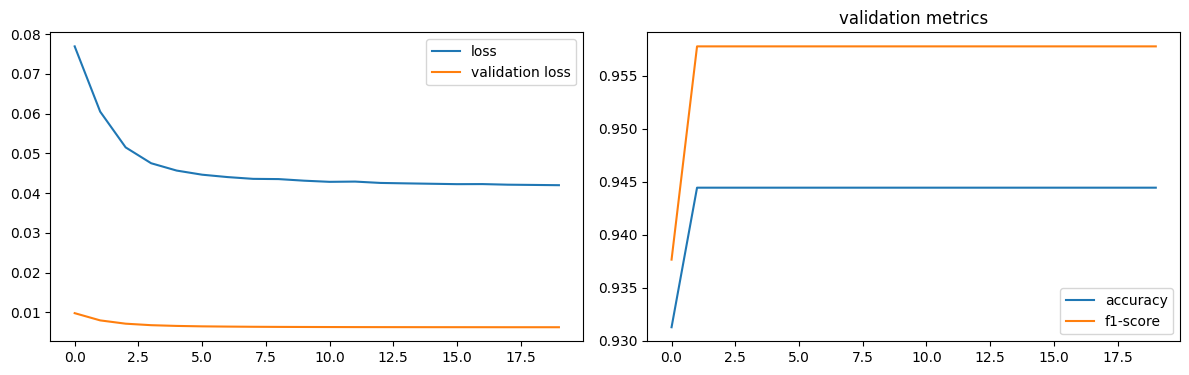

Test: loss: 0.33885714411735535, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (0, 'neuron2')


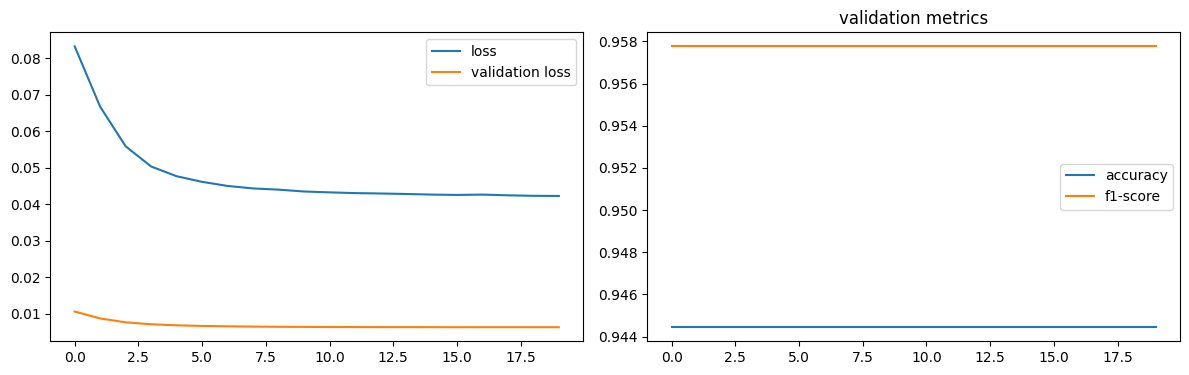

Test: loss: 0.3404766619205475, avg metrics: (0.9699623584747314, 0.9711454749107361)
dropping feature: (4, 'neuron22')


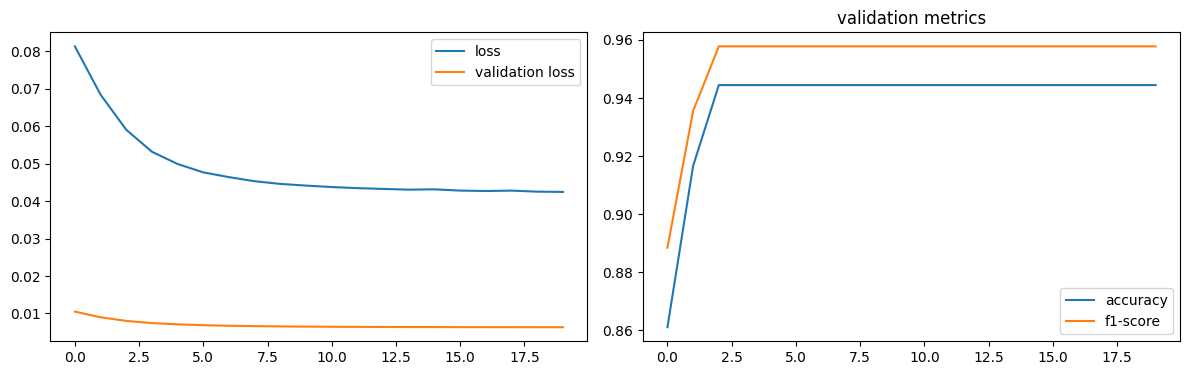

Test: loss: 0.34151697158813477, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (1, 'neuron11')


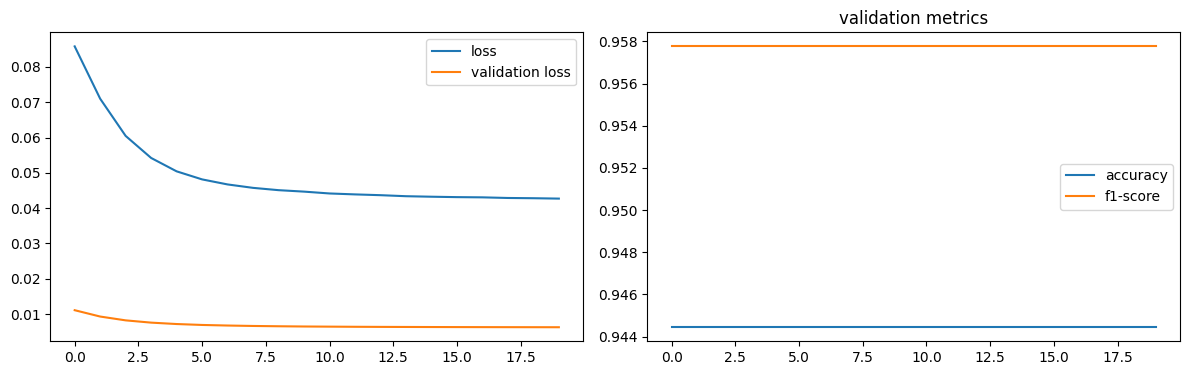

Test: loss: 0.34349364042282104, avg metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (0, 'neuron9')


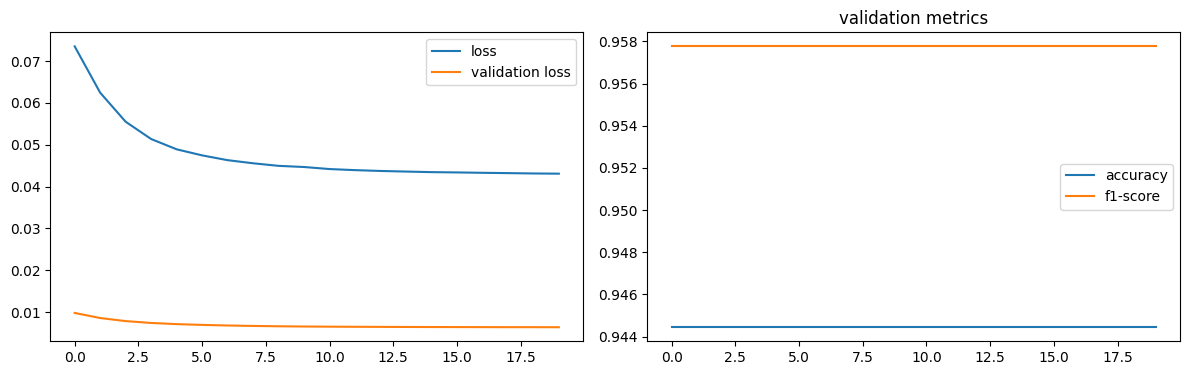

Test: loss: 0.3480716645717621, avg metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (1, 'neuron18')


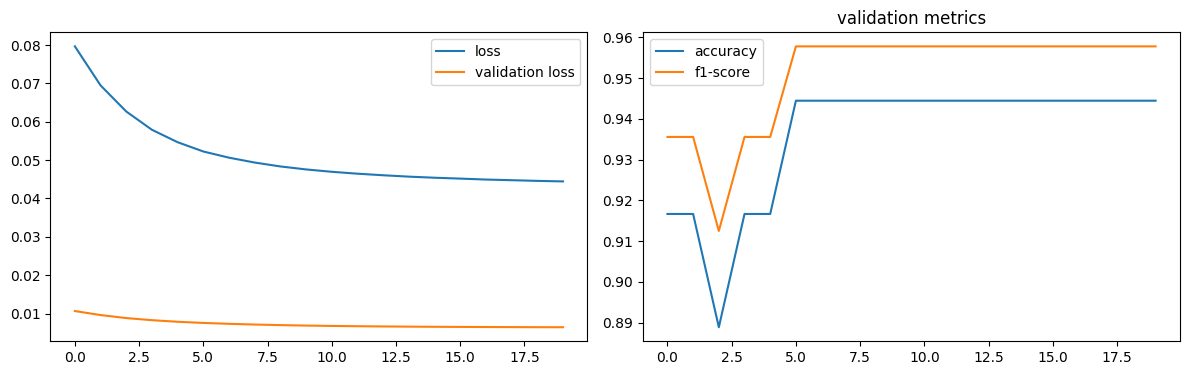

Test: loss: 0.3590303361415863, avg metrics: (0.947845458984375, 0.9515969753265381)


In [15]:
torch.manual_seed(2024)

headers = [f"neuron{i}" for i in range(32)]


def model_factory(size):
    model = BreastCancerNN(1, (size, 32), 2)
    model.layer1 = nn.Identity()
    return model


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs, 20,
    labels, "", None
)

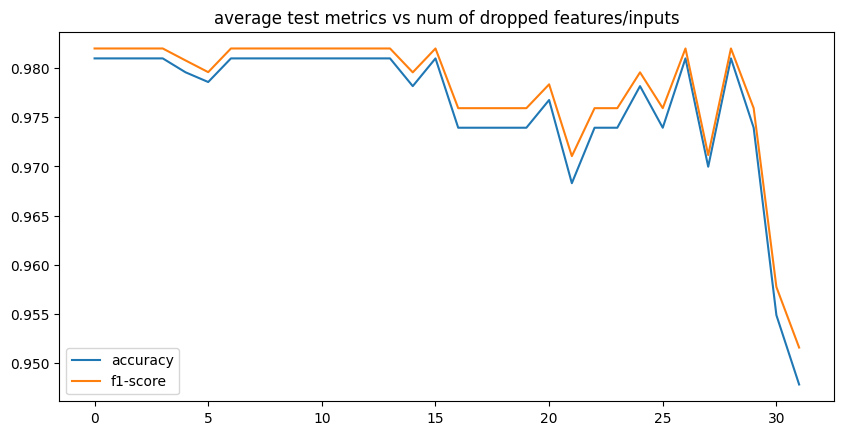

In [16]:
plot_dropping_metrics(test_metrics, labels)

In [17]:
num_drop_neurons = 28

save_models("breast", "dgsm-layer2", models, dropped)

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].layer2

best_model.layer2 = layer
best_model.layer1[0] = reduce_linear(best_model.layer1[0], dropped, num_drop_neurons)

features left [4]:  ['neuron9', 'neuron11', 'neuron15', 'neuron18']


### 2nd hidden layer

In [18]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

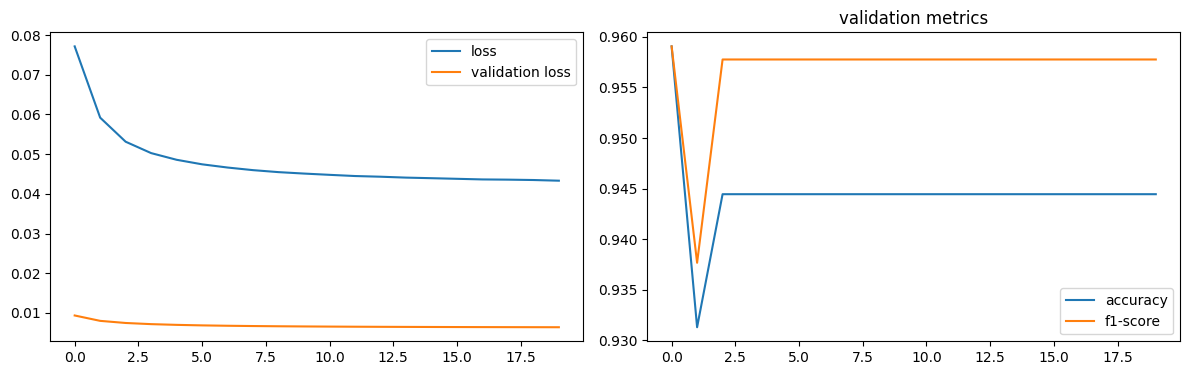

Test: loss: 0.34712669253349304, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (27, 'neuron27')


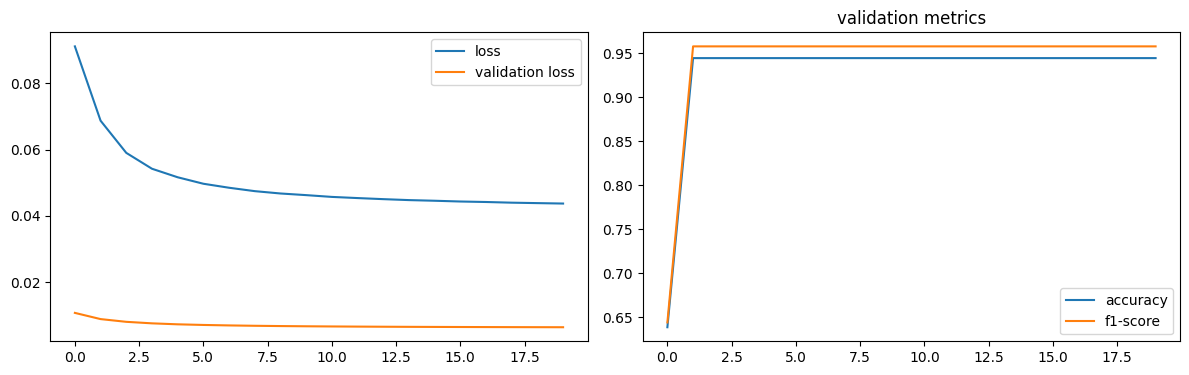

Test: loss: 0.35081592202186584, avg metrics: (0.9795565605163574, 0.9807600855827332)
dropping feature: (13, 'neuron13')


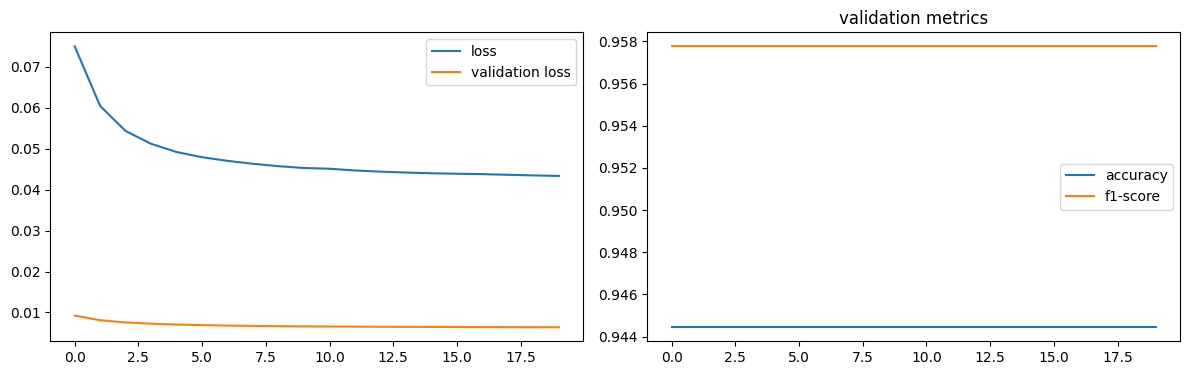

Test: loss: 0.347883015871048, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (10, 'neuron10')


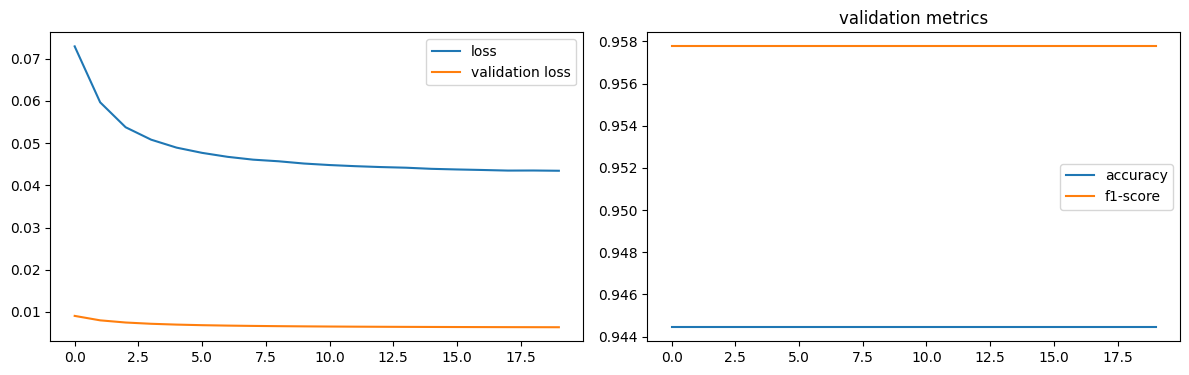

Test: loss: 0.3476104438304901, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (6, 'neuron6')


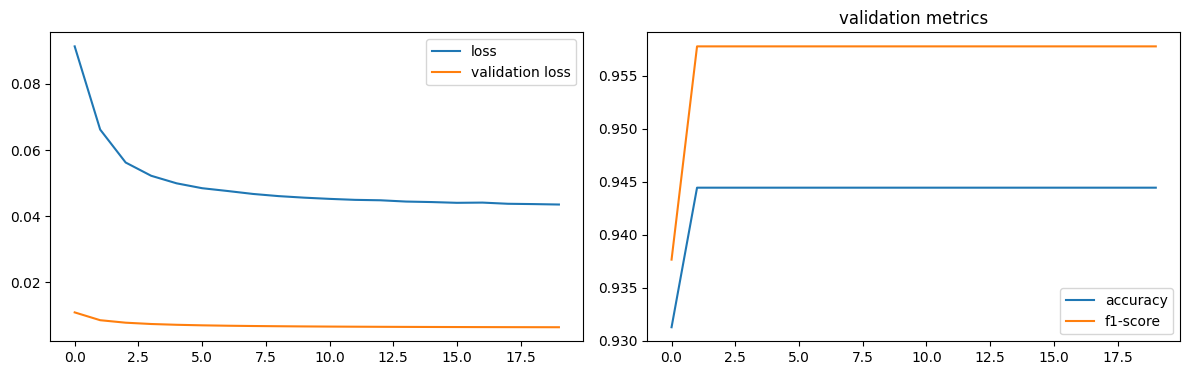

Test: loss: 0.3489695191383362, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (18, 'neuron21')


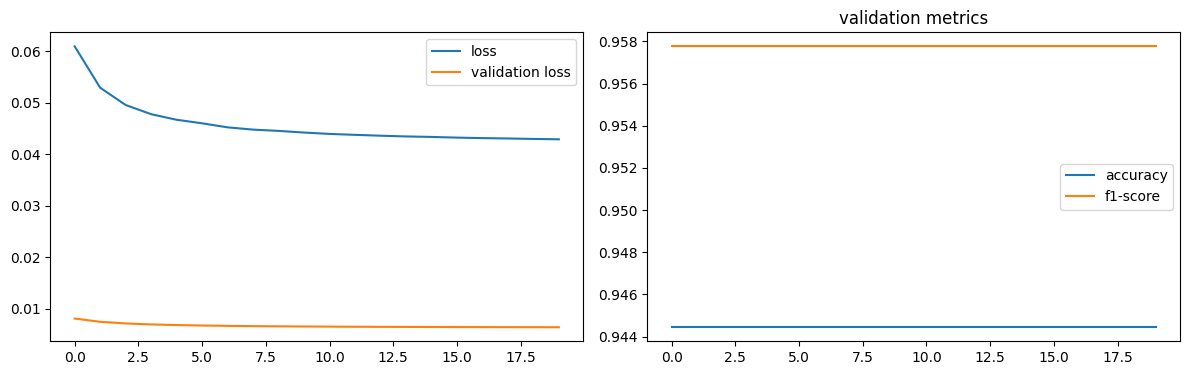

Test: loss: 0.34454575181007385, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (21, 'neuron25')


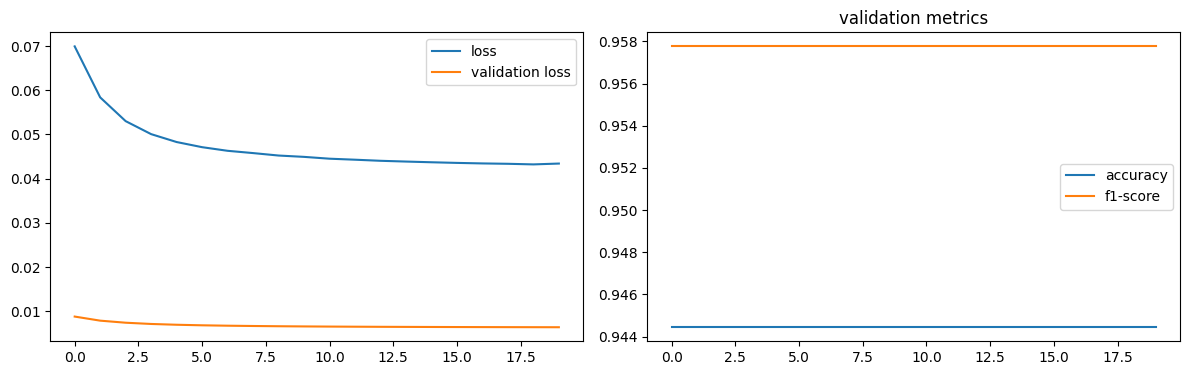

Test: loss: 0.34662631154060364, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (12, 'neuron15')


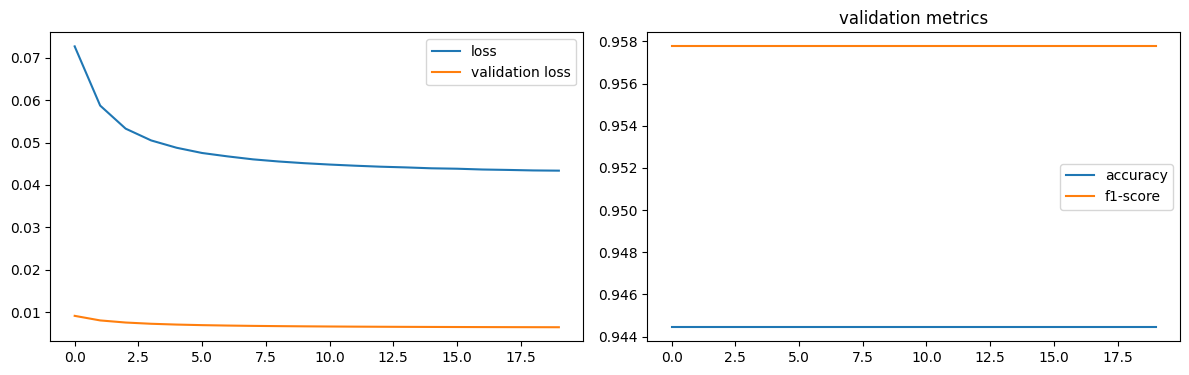

Test: loss: 0.3476197123527527, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (10, 'neuron12')


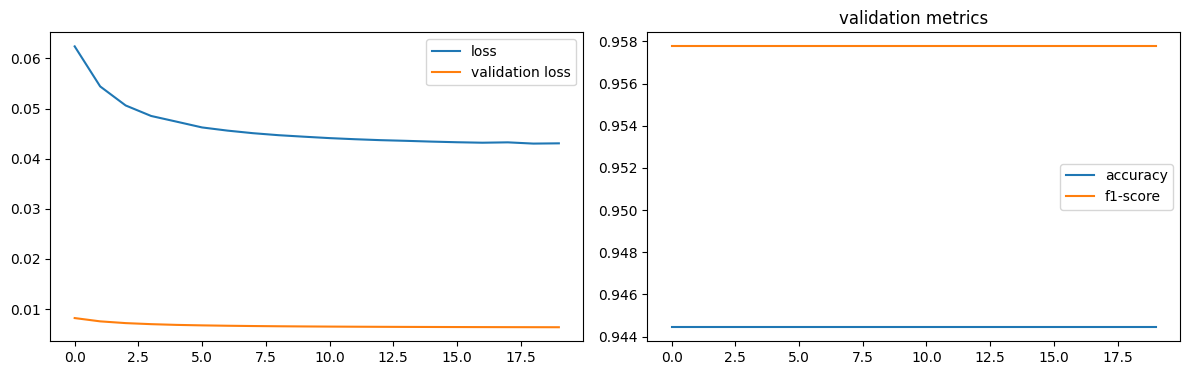

Test: loss: 0.3451111912727356, avg metrics: (0.9795565605163574, 0.9807600855827332)
dropping feature: (11, 'neuron16')


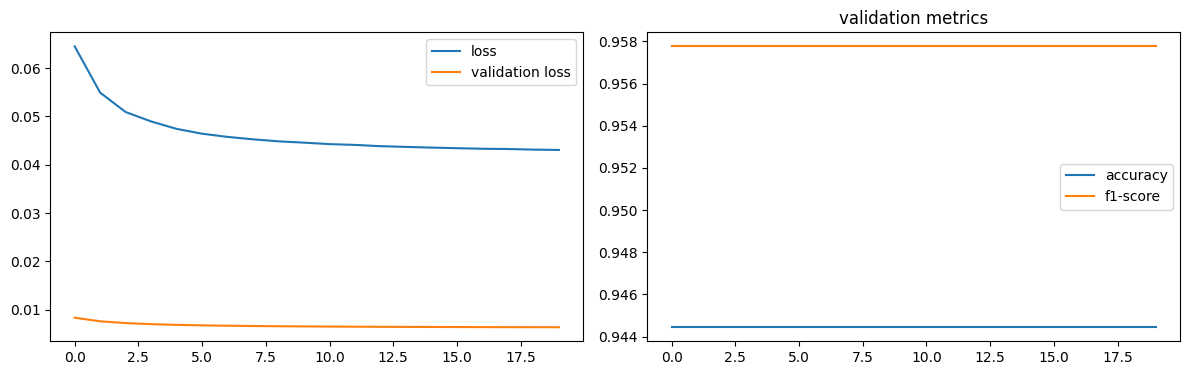

Test: loss: 0.34572088718414307, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (11, 'neuron17')


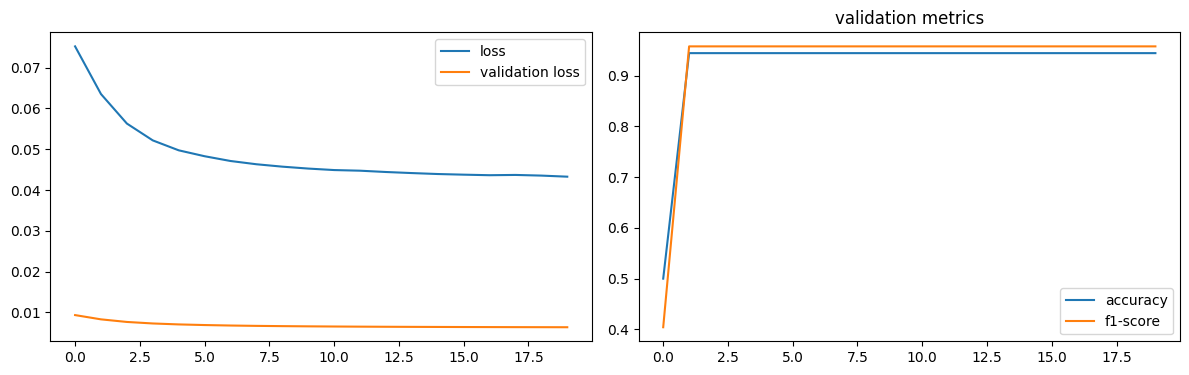

Test: loss: 0.3477715253829956, avg metrics: (0.9781481027603149, 0.979547655582428)
dropping feature: (5, 'neuron5')


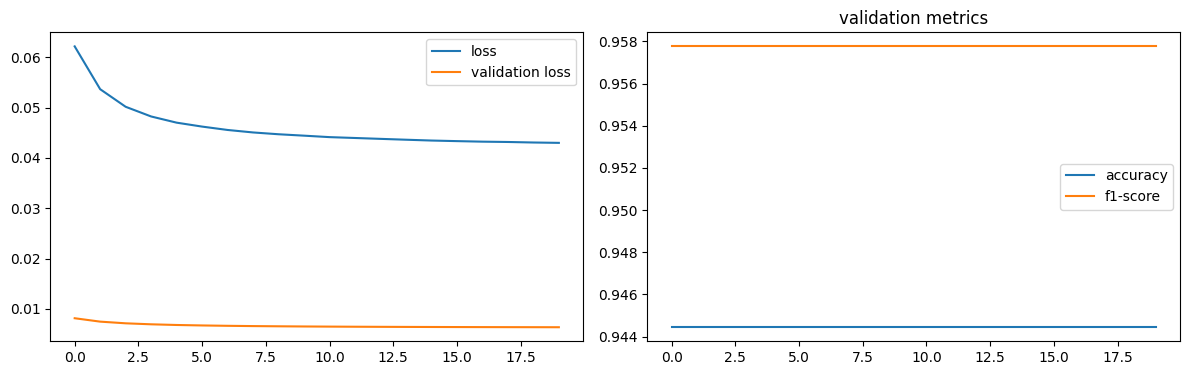

Test: loss: 0.34513652324676514, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (9, 'neuron14')


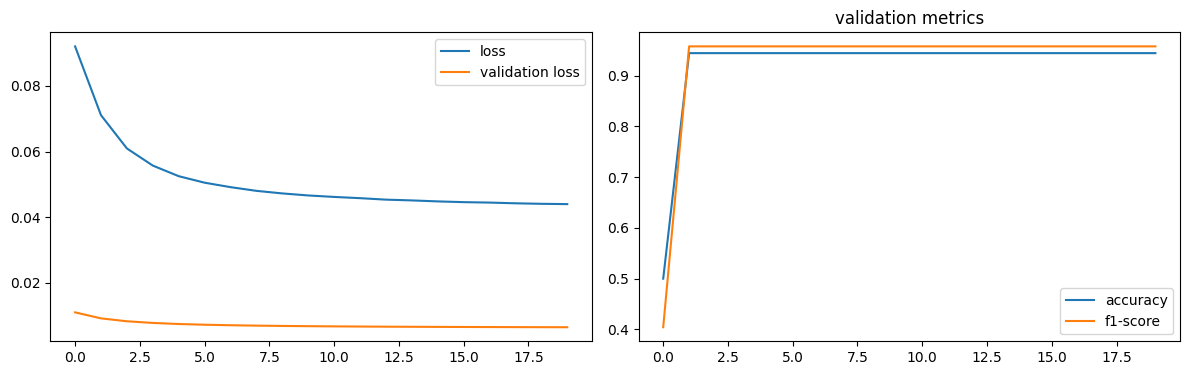

Test: loss: 0.3520551919937134, avg metrics: (0.9781481027603149, 0.979547655582428)
dropping feature: (0, 'neuron0')


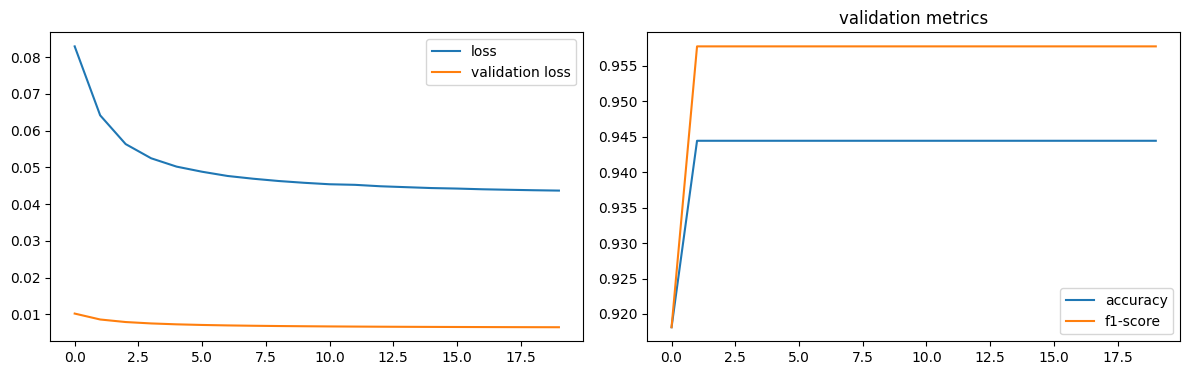

Test: loss: 0.34965476393699646, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (1, 'neuron2')


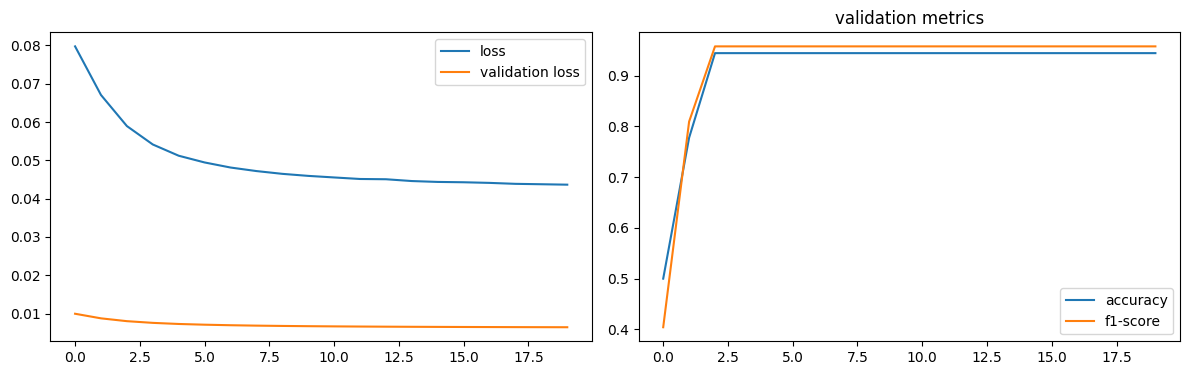

Test: loss: 0.34986066818237305, avg metrics: (0.9781481027603149, 0.979547655582428)
dropping feature: (14, 'neuron28')


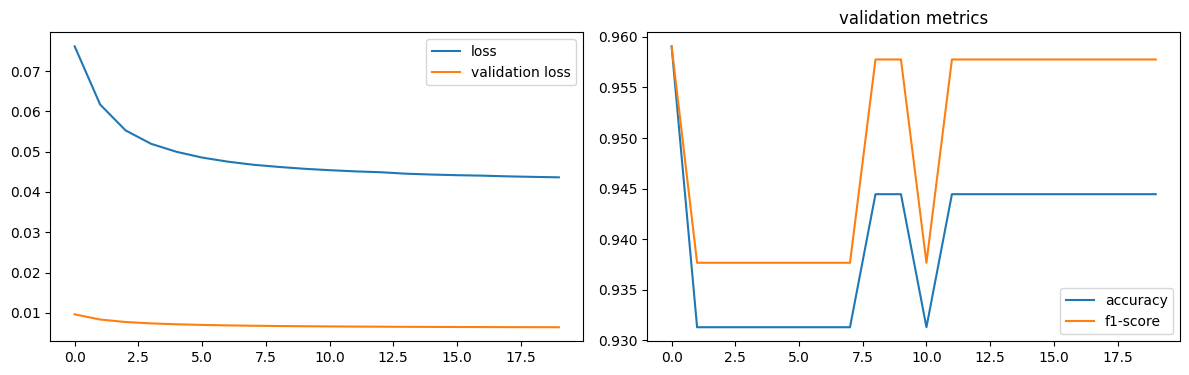

Test: loss: 0.3494344651699066, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (0, 'neuron1')


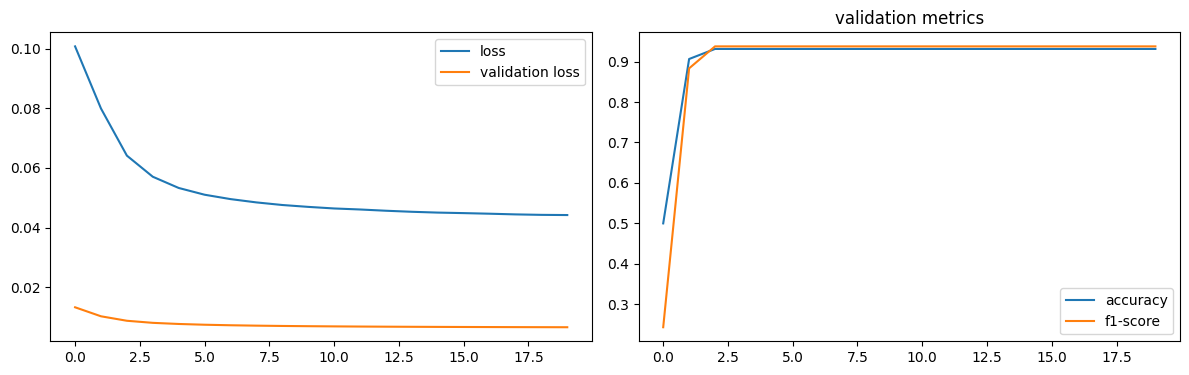

Test: loss: 0.35254859924316406, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (2, 'neuron7')


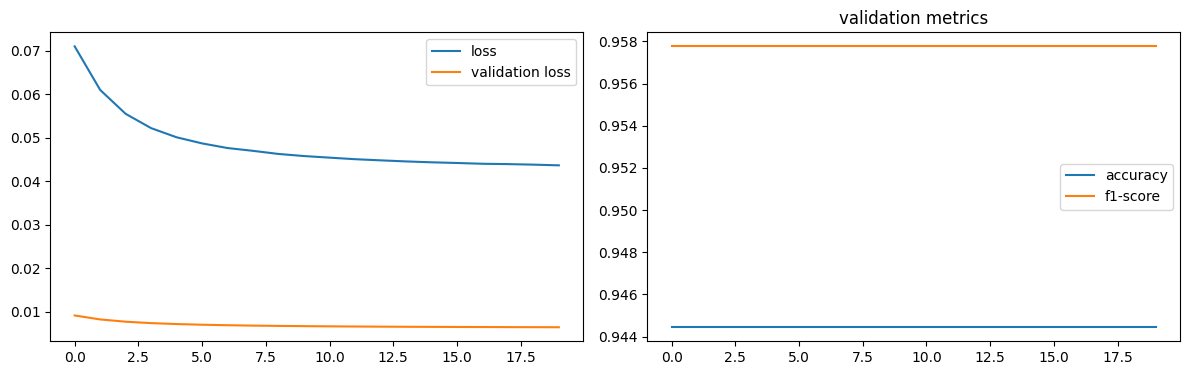

Test: loss: 0.34983327984809875, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (9, 'neuron23')


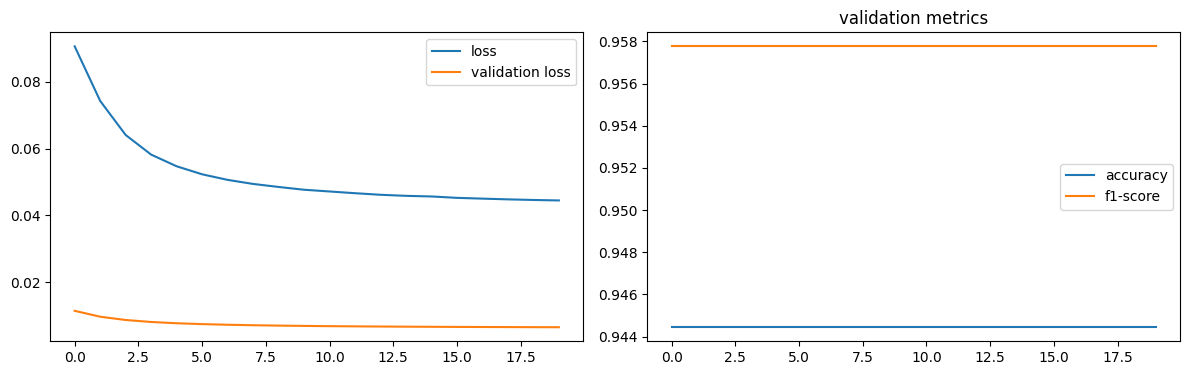

Test: loss: 0.3556346595287323, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (11, 'neuron29')


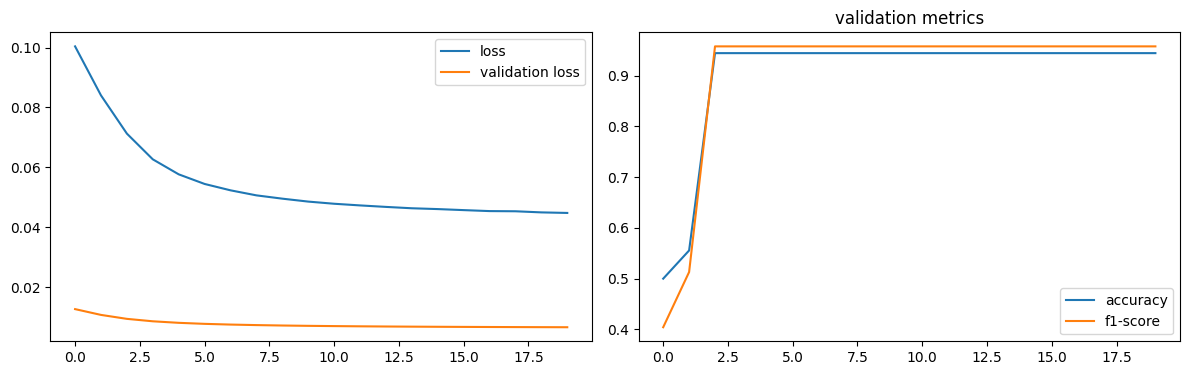

Test: loss: 0.3576918840408325, avg metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (6, 'neuron19')


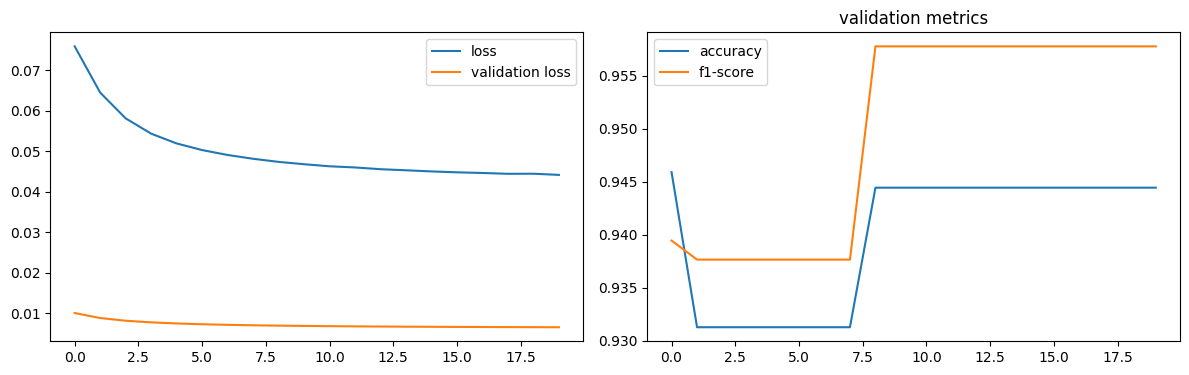

Test: loss: 0.3528127372264862, avg metrics: (0.9753312110900879, 0.9771112322807312)
dropping feature: (10, 'neuron30')


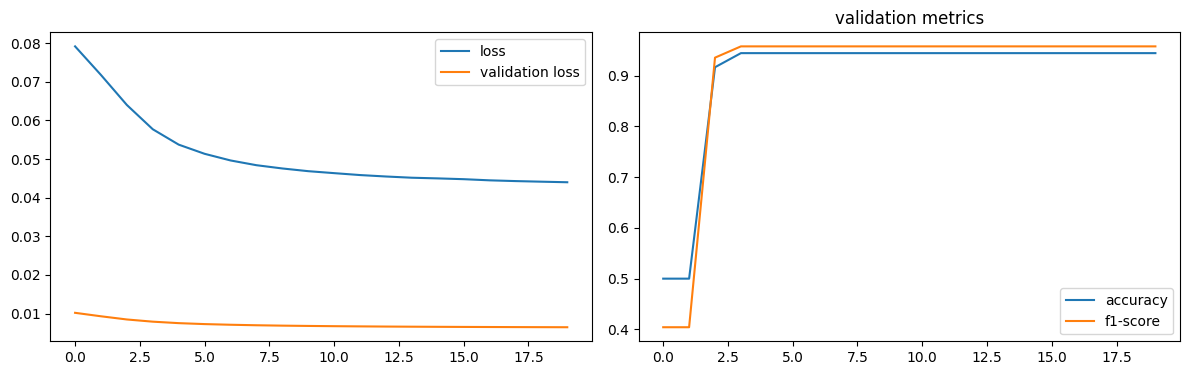

Test: loss: 0.35289791226387024, avg metrics: (0.9795565605163574, 0.9807600855827332)
dropping feature: (7, 'neuron22')


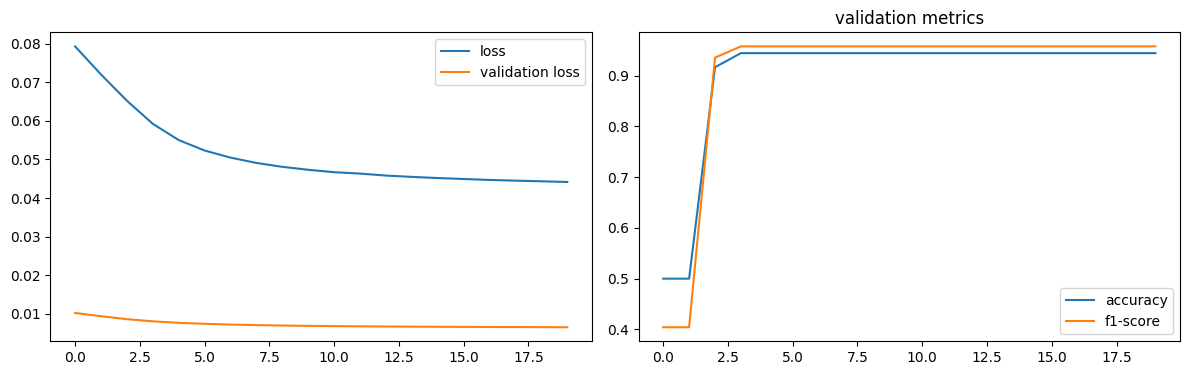

Test: loss: 0.3545088768005371, avg metrics: (0.9795565605163574, 0.9807600855827332)
dropping feature: (2, 'neuron8')


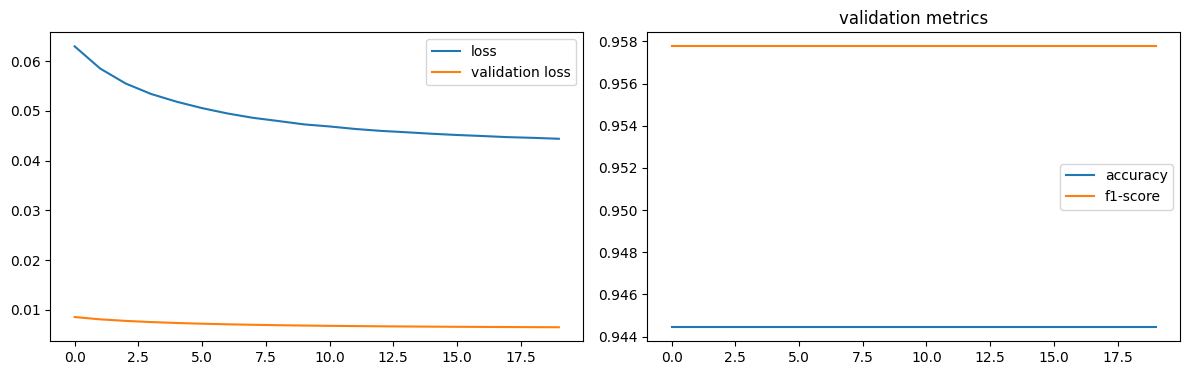

Test: loss: 0.356590211391449, avg metrics: (0.97533118724823, 0.9771227955818176)
dropping feature: (8, 'neuron31')


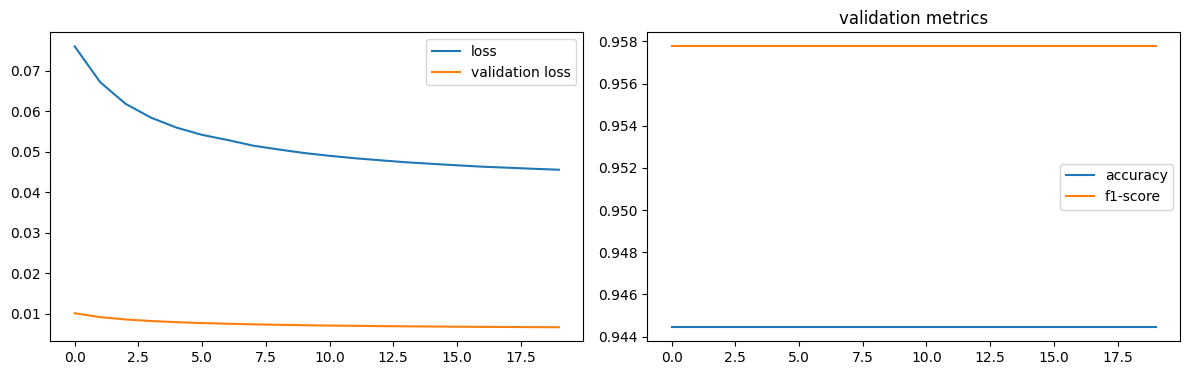

Test: loss: 0.3646372854709625, avg metrics: (0.9781481027603149, 0.979547655582428)
dropping feature: (1, 'neuron4')


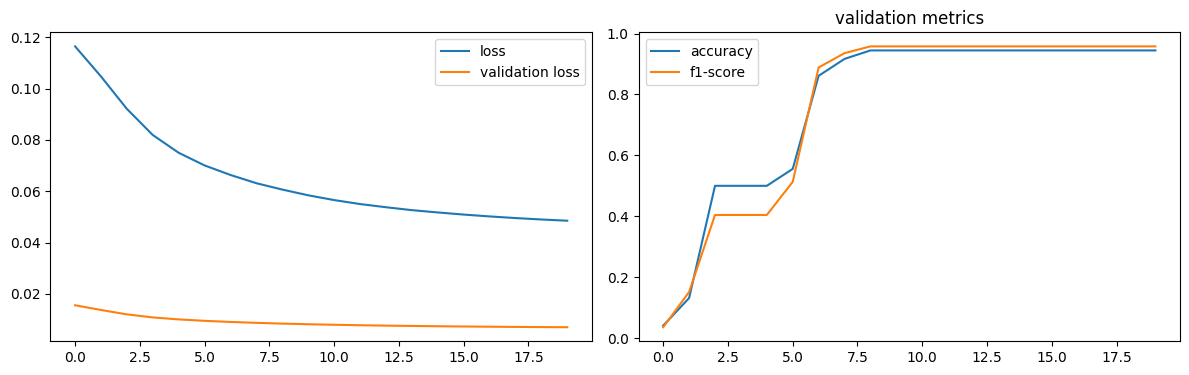

Test: loss: 0.38820627331733704, avg metrics: (0.9711058378219605, 0.9734739422798157)
dropping feature: (5, 'neuron24')


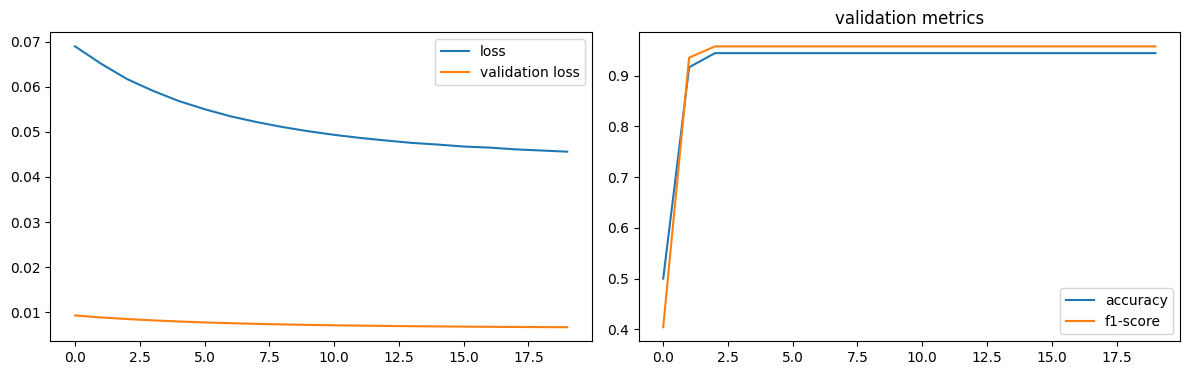

Test: loss: 0.36570316553115845, avg metrics: (0.9753311991691589, 0.9771170139312744)
dropping feature: (5, 'neuron26')


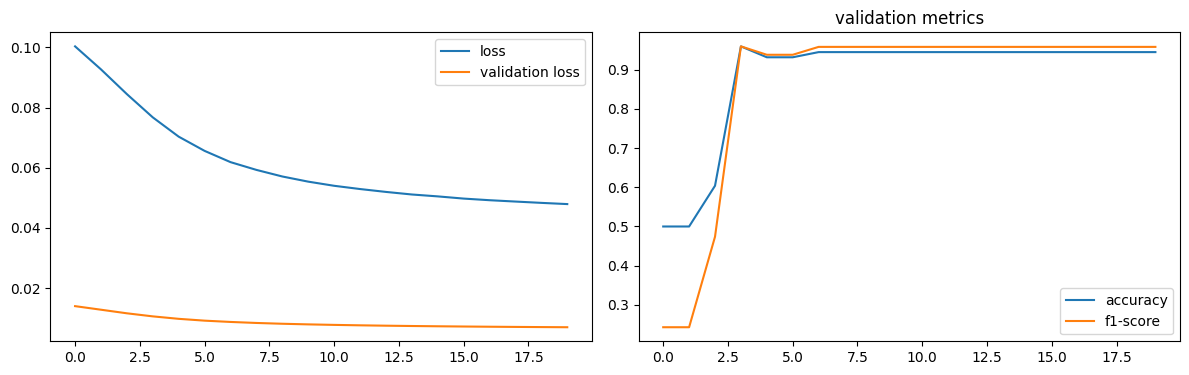

Test: loss: 0.38137564063072205, avg metrics: (0.97533118724823, 0.9771227955818176)
dropping feature: (0, 'neuron3')


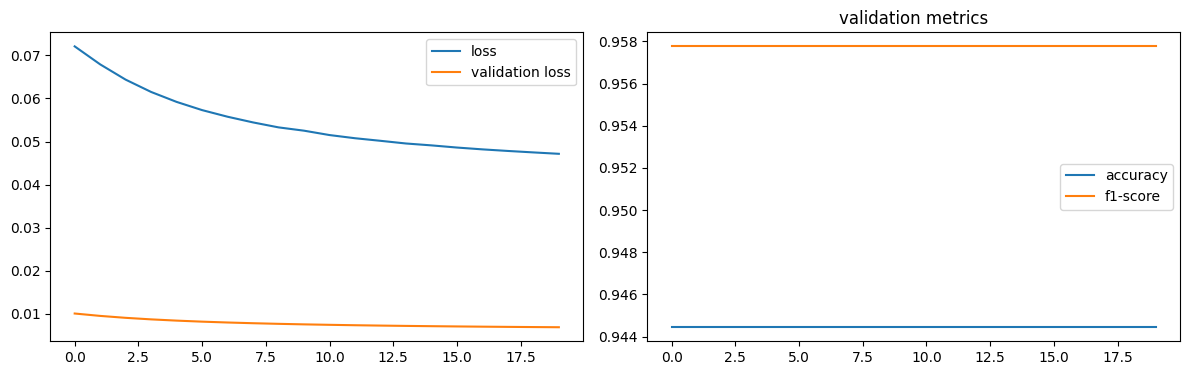

Test: loss: 0.37589824199676514, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron20')


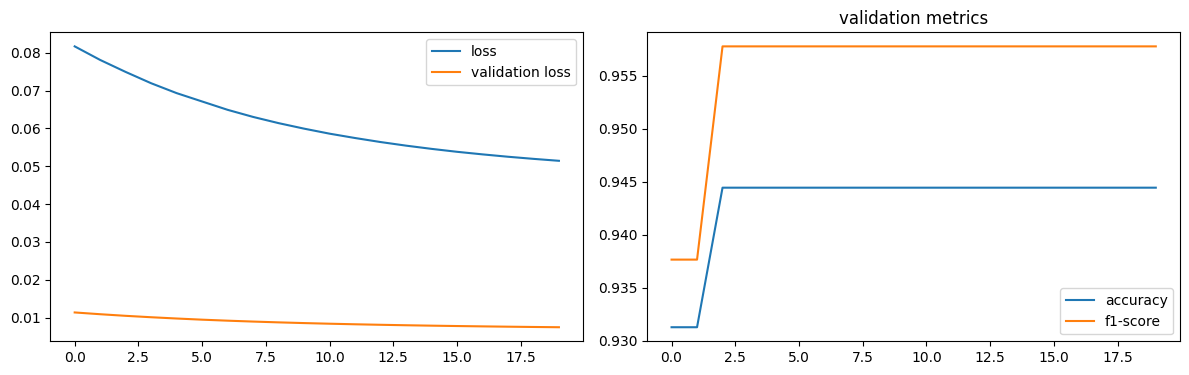

Test: loss: 0.4071386158466339, avg metrics: (0.9729326486587524, 0.9747071981430053)
dropping feature: (2, 'neuron18')


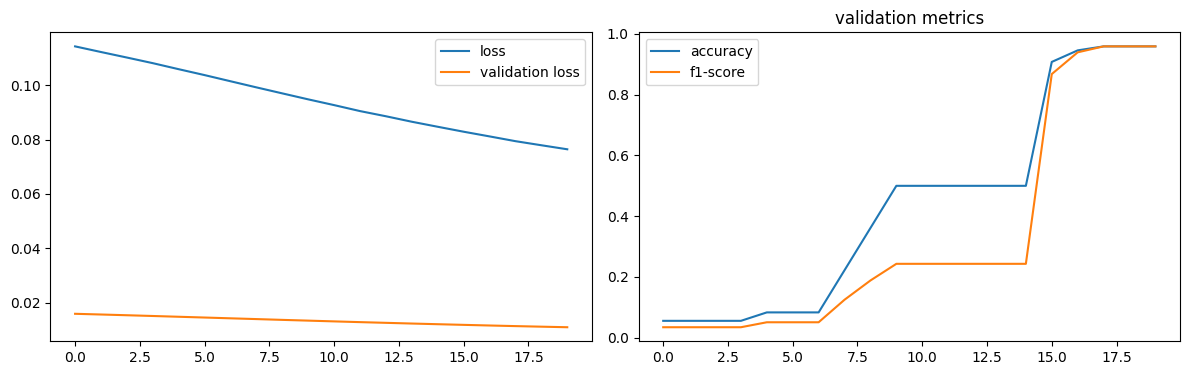

Test: loss: 0.5949414968490601, avg metrics: (0.9681355357170105, 0.9698884010314941)
dropping feature: (1, 'neuron11')


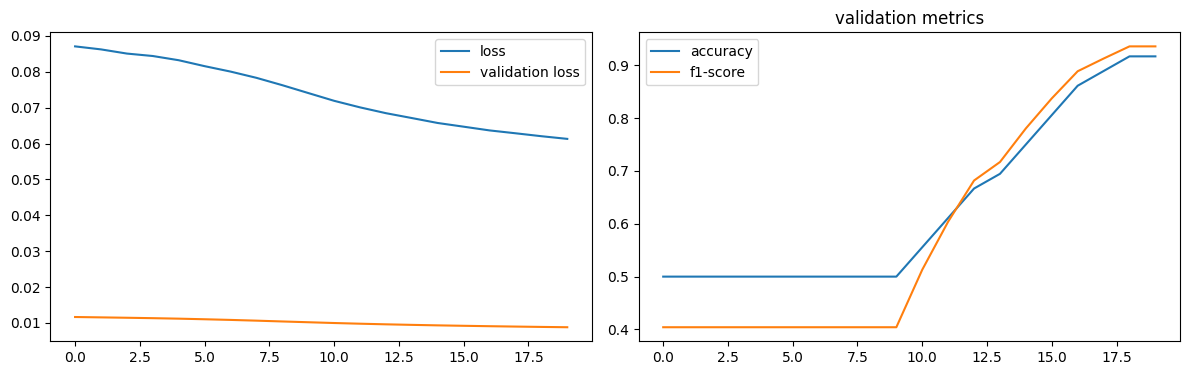

Test: loss: 0.48902758955955505, avg metrics: (0.9391298413276672, 0.9444198369979858)


In [19]:
torch.manual_seed(2024)

headers = [f"neuron{i}" for i in range(32)]


def model_factory(size):
    model = BreastCancerNN(1, (1, size), 2)
    model.layer1 = nn.Identity()
    model.layer2 = nn.Identity()
    return model


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs, 20,
    labels, "", None
)

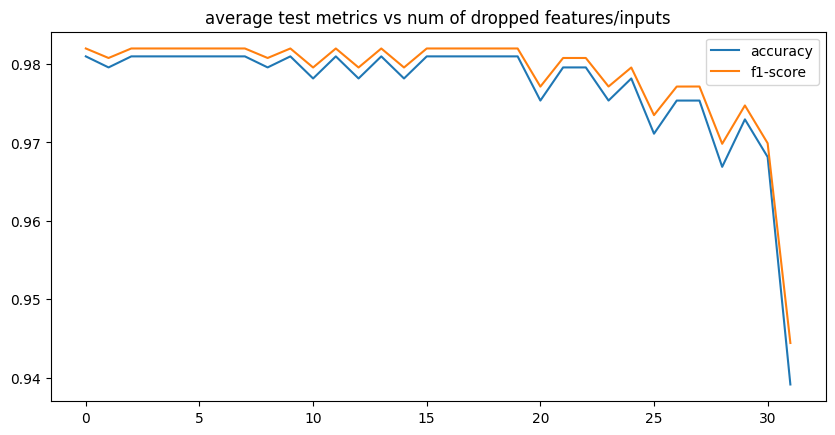

In [20]:
plot_dropping_metrics(test_metrics, labels)

In [21]:
num_drop_neurons = 19

save_models("breast", "dgsm-layer3", models, dropped)

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].out

best_model.out = layer
best_model.layer2[0] = reduce_linear(best_model.layer2[0], dropped, num_drop_neurons)

features left [13]:  ['neuron3', 'neuron4', 'neuron8', 'neuron9', 'neuron11', 'neuron18', 'neuron19', 'neuron20', 'neuron22', 'neuron24', 'neuron26', 'neuron30', 'neuron31']


### pruned

In [22]:
best_model

BreastCancerNN(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=4, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=4, out_features=13, bias=True)
    (1): ReLU()
  )
  (out): Linear(in_features=13, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

In [23]:
with torch.no_grad():
    inputs, targets = dgsm_datasets["test"][:]
    outputs = best_model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test {labels}: {test_metrics}")

test ('accuracy', 'f1-score'): (0.9809650182723999, 0.9819725155830383)


test: ('accuracy', 'f1-score'): (0.9809650182723999, 0.9819725155830383)


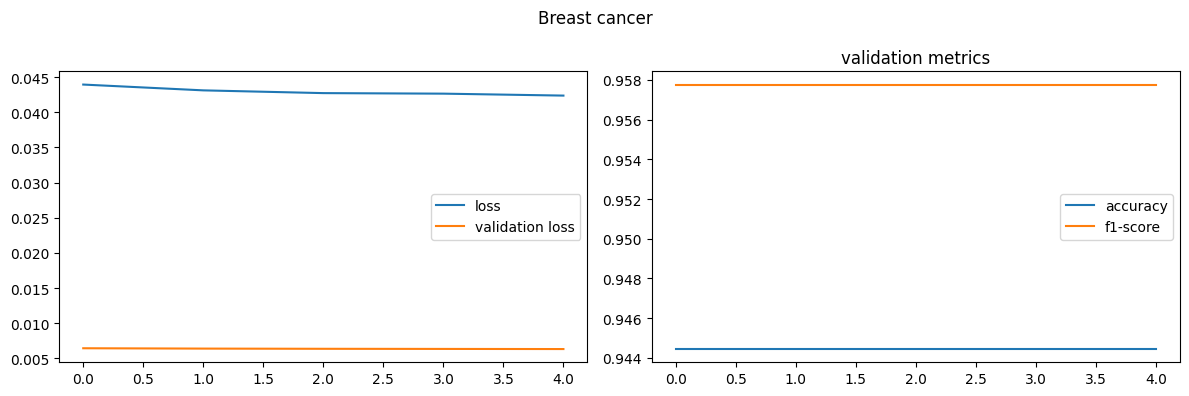

In [24]:
optimizer = optimizer_factory(best_model)
metrics = model_train(dgsm_datasets, best_model, optimizer, criterion, score_outputs, 5)

with torch.no_grad():
    inputs, targets = dgsm_datasets["test"][:]
    outputs = best_model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test: {labels}: {test_metrics}")
plot_metrics('Breast cancer', metrics, labels)

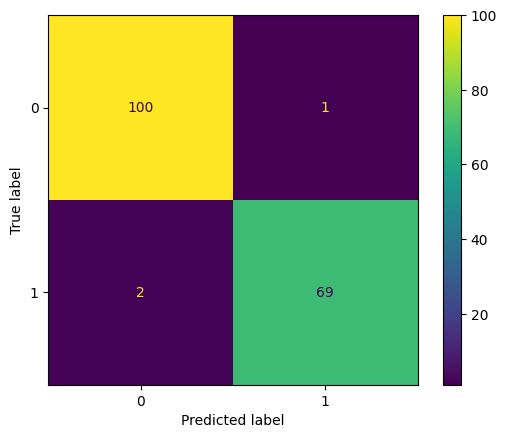

In [25]:
ConfusionMatrixDisplay.from_predictions(targets, outputs.argmax(dim=1))
plt.show()

In [26]:
save_models("breast", "dgsm-prunned", [best_model], None)

## FAST

In [27]:
best_model = BreastCancerNN(len(breast_cancer_headers), (32, 32), 2)

### input layer

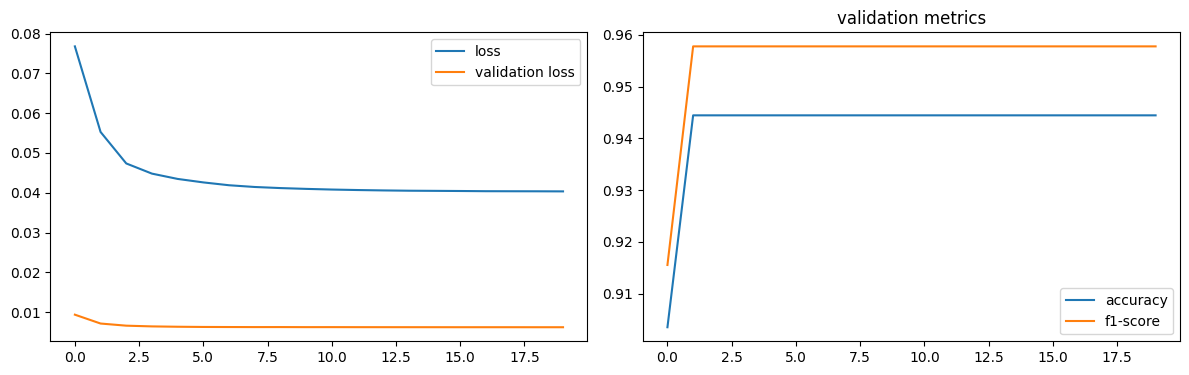

Test: loss: 0.34992516040802, avg metrics: (0.9606749534606933, 0.963766074180603)
dropping feature: (8, 'symmetry1')


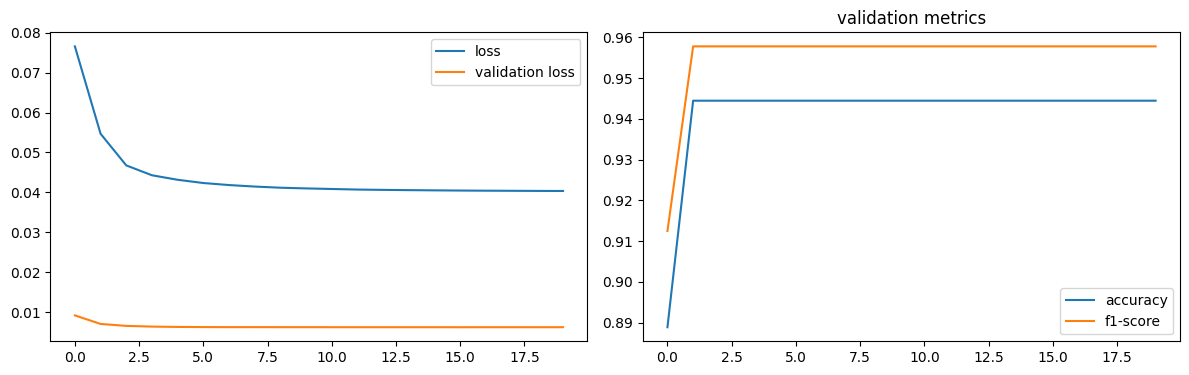

Test: loss: 0.34587907791137695, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (13, 'smoothness2')


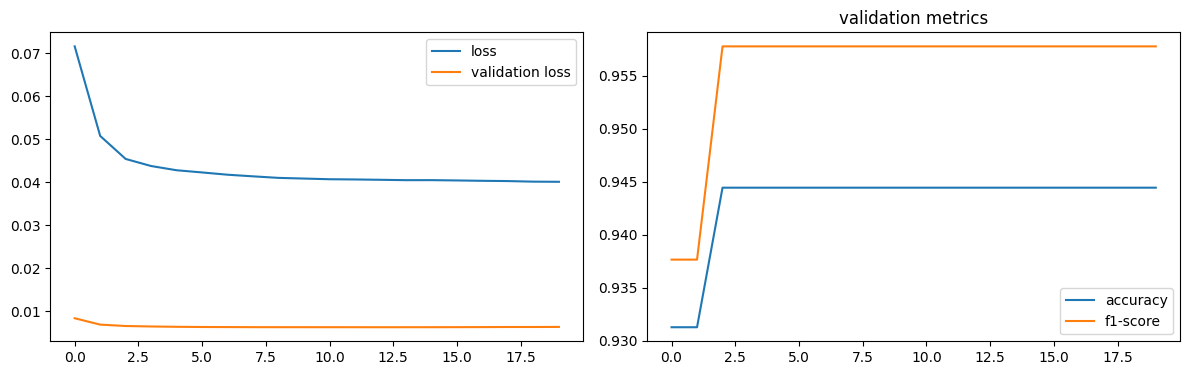

Test: loss: 0.3551272451877594, avg metrics: (0.9554594993591309, 0.9588787674903869)
dropping feature: (14, 'concavity2')


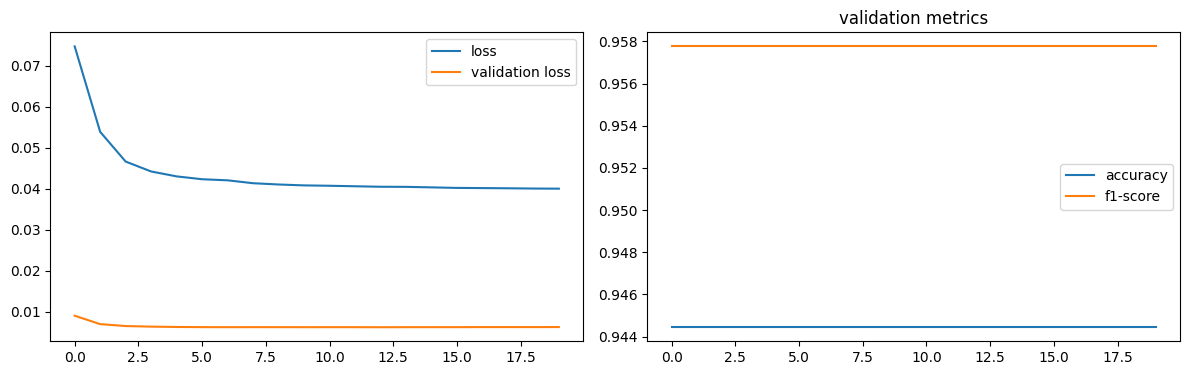

Test: loss: 0.35418692231178284, avg metrics: (0.9568679451942443, 0.9601216077804565)
dropping feature: (10, 'texture2')


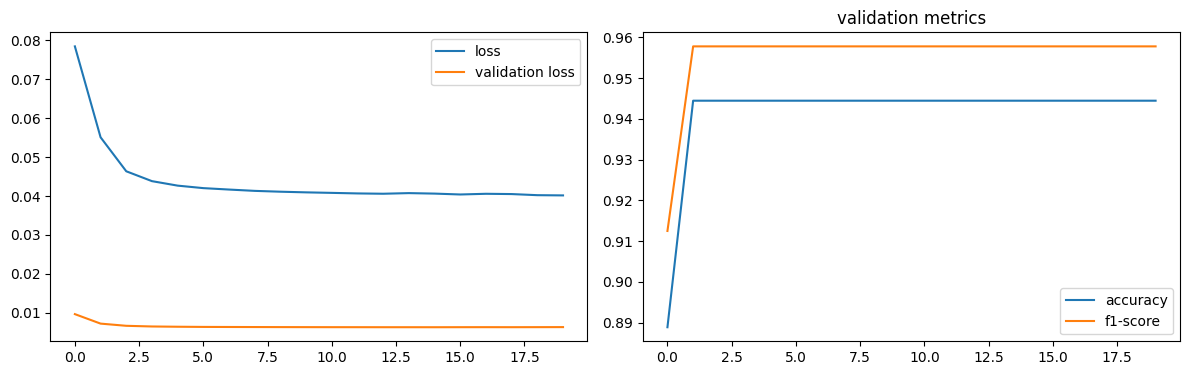

Test: loss: 0.35191771388053894, avg metrics: (0.9644819498062134, 0.967398750782013)
dropping feature: (13, 'concave_points2')


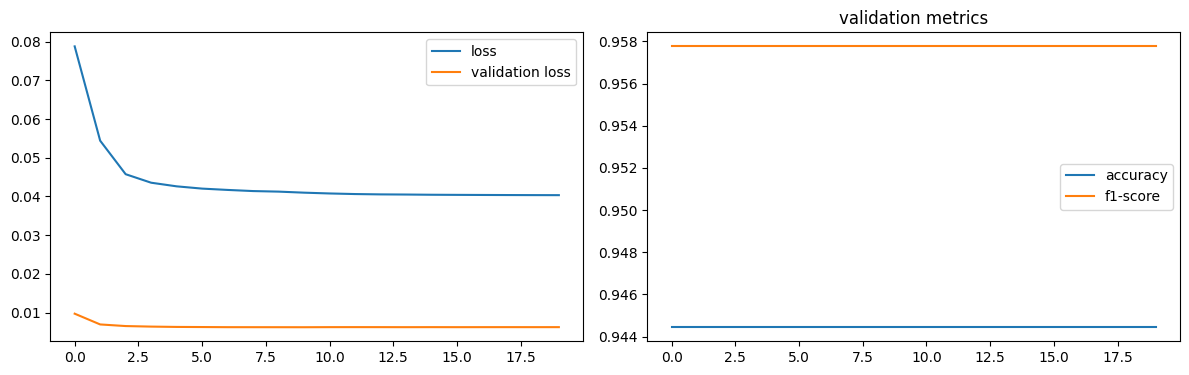

Test: loss: 0.34778186678886414, avg metrics: (0.9588481545448303, 0.9625012397766113)
dropping feature: (24, 'fractal_dimension3')


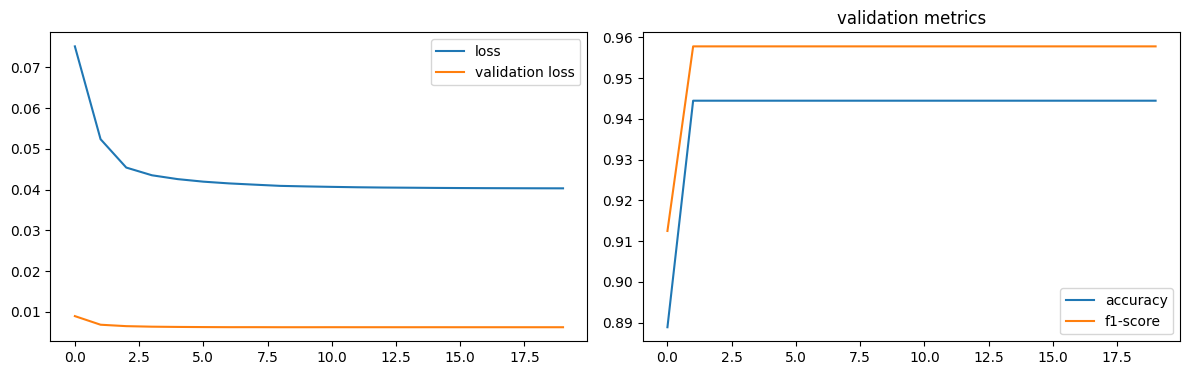

Test: loss: 0.3444306254386902, avg metrics: (0.9626551628112793, 0.9661463975906373)
dropping feature: (20, 'compactness3')


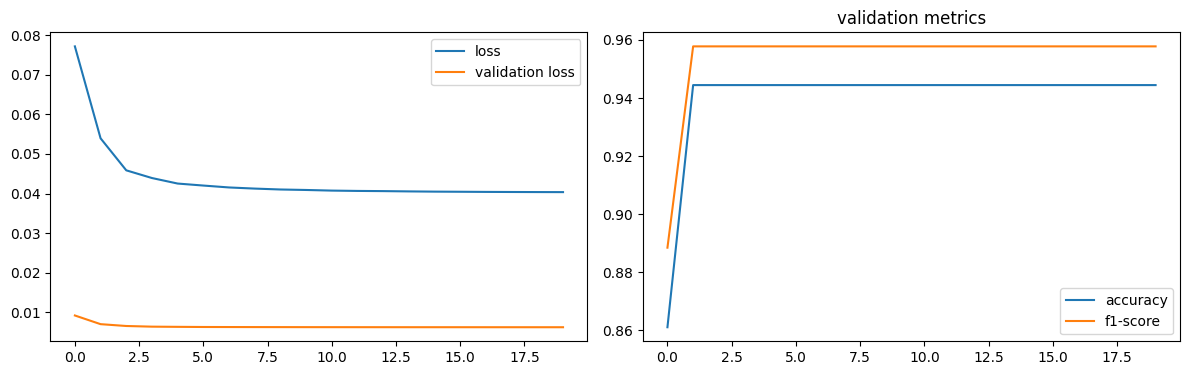

Test: loss: 0.34626609086990356, avg metrics: (0.9626551508903504, 0.9661400079727173)
dropping feature: (5, 'compactness1')


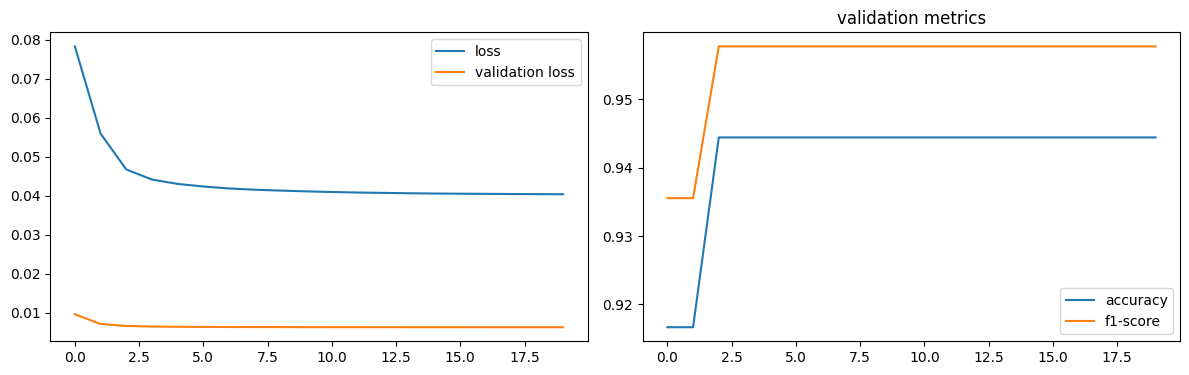

Test: loss: 0.3397364020347595, avg metrics: (0.9654720544815063, 0.968595004081726)
dropping feature: (13, 'fractal_dimension2')


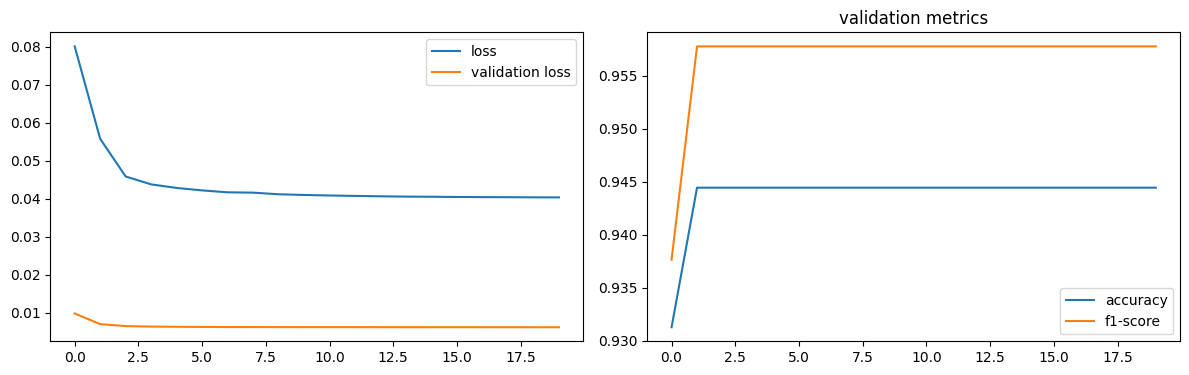

Test: loss: 0.34759989380836487, avg metrics: (0.9527959823608398, 0.9575376510620117)
dropping feature: (4, 'smoothness1')


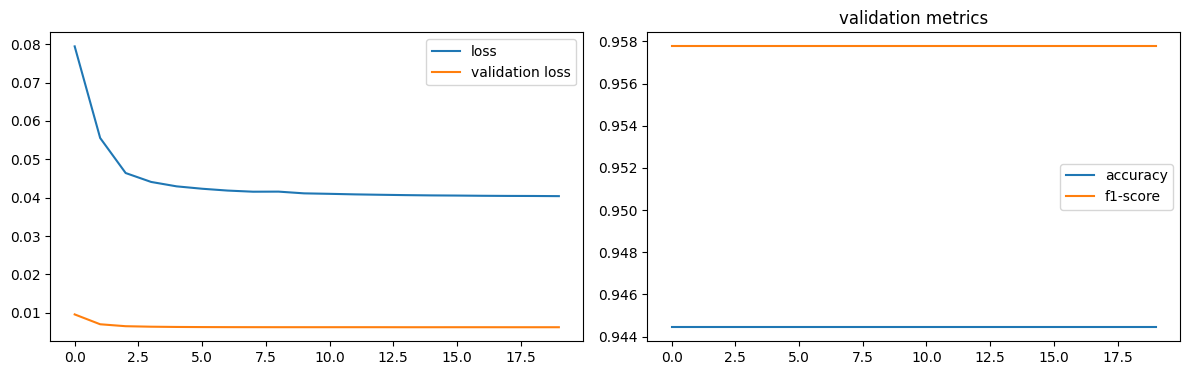

Test: loss: 0.3406260311603546, avg metrics: (0.9602566003799439, 0.9637262344360351)
dropping feature: (0, 'radius1')


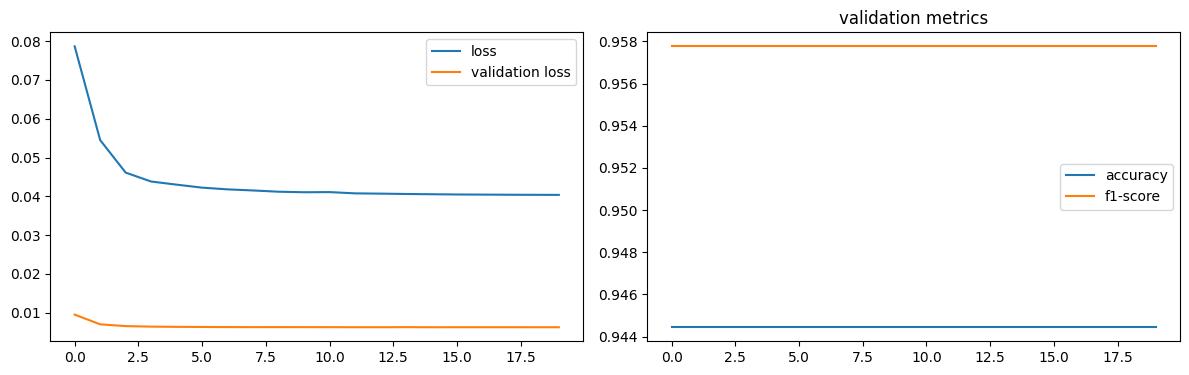

Test: loss: 0.3415263593196869, avg metrics: (0.9612467050552368, 0.9649203062057495)
dropping feature: (18, 'symmetry3')


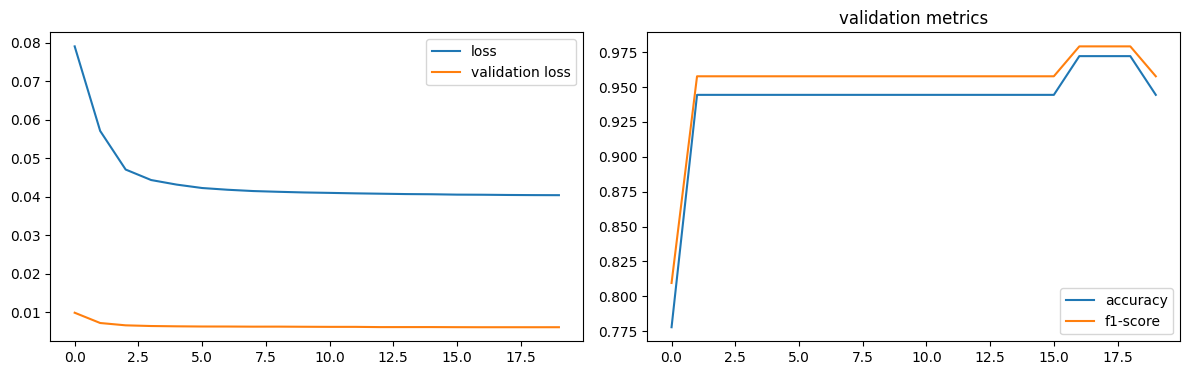

Test: loss: 0.34282076358795166, avg metrics: (0.9578580617904663, 0.9612989306449891)
dropping feature: (7, 'perimeter2')


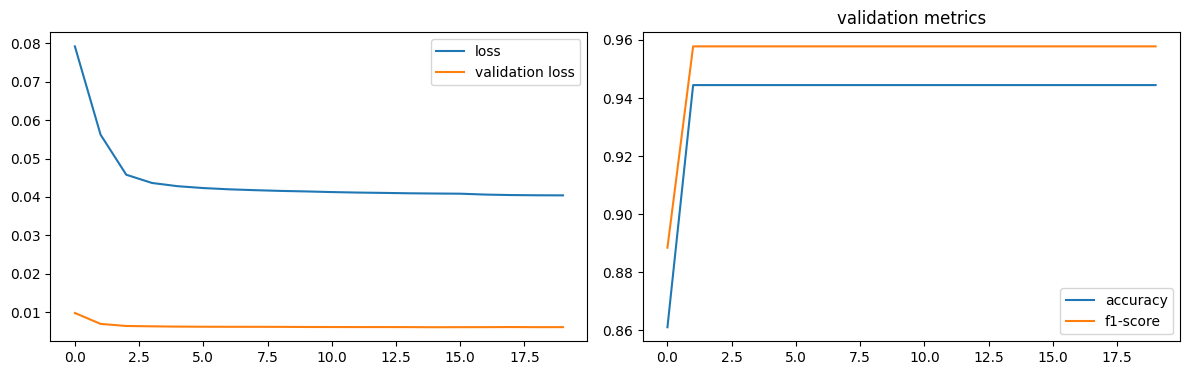

Test: loss: 0.3443901240825653, avg metrics: (0.9649003148078918, 0.9674378156661987)
dropping feature: (9, 'symmetry2')


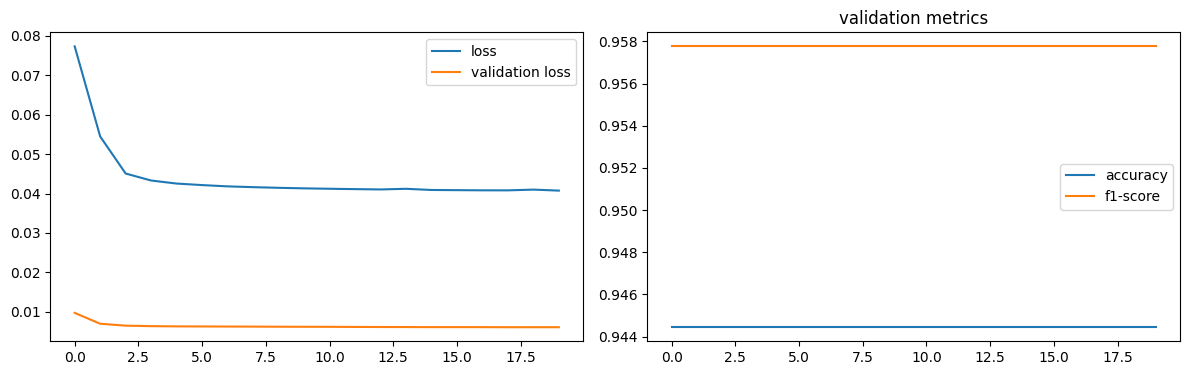

Test: loss: 0.3427450358867645, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'texture1')


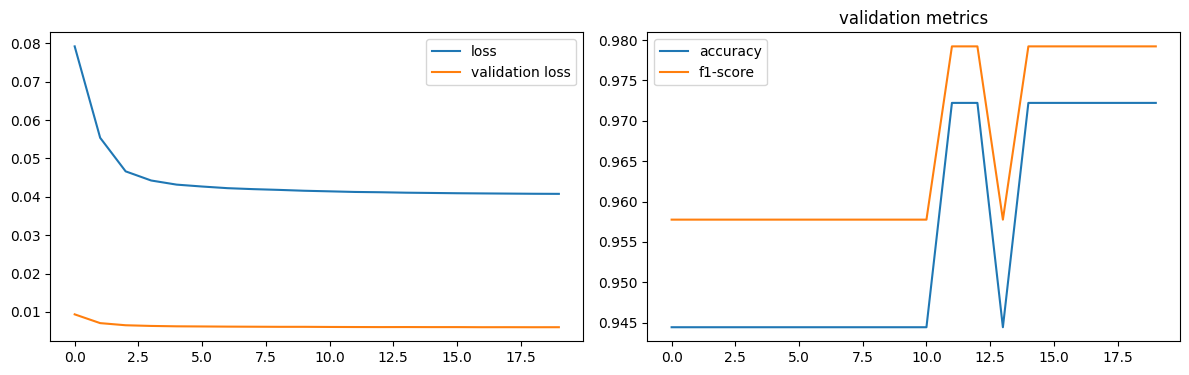

Test: loss: 0.34690722823143005, avg metrics: (0.9586947679519653, 0.9613845825195313)
dropping feature: (2, 'concavity1')


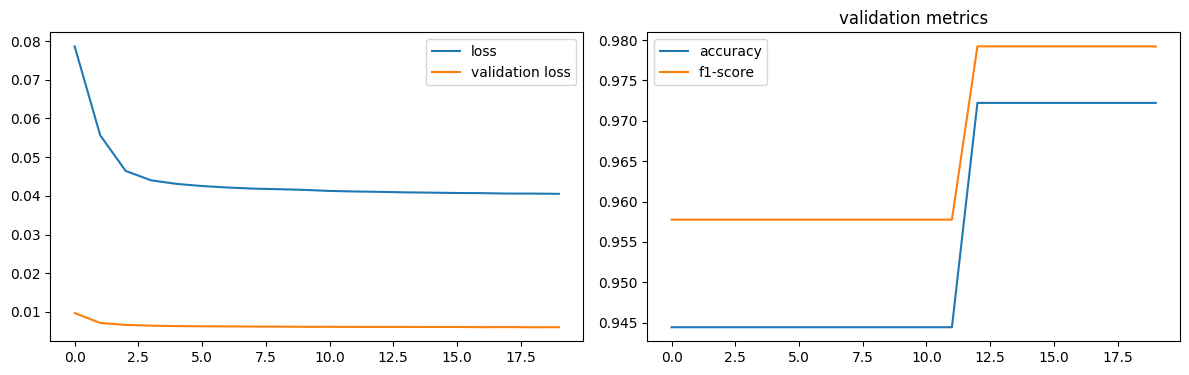

Test: loss: 0.3443242311477661, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (3, 'fractal_dimension1')


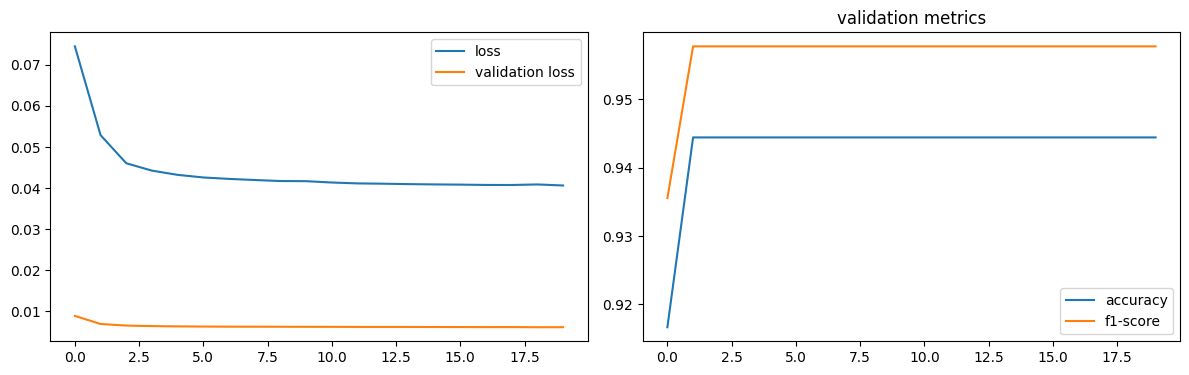

Test: loss: 0.34576651453971863, avg metrics: (0.9649003148078918, 0.9674378156661987)
dropping feature: (2, 'concave_points1')


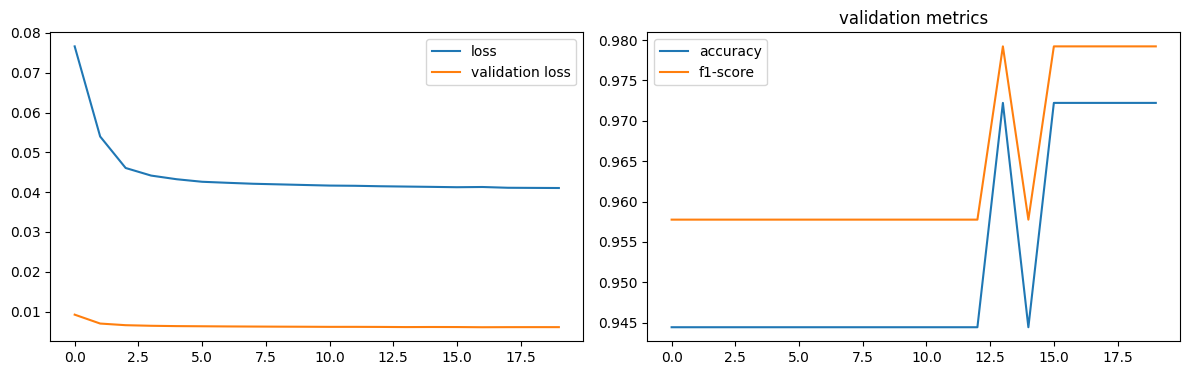

Test: loss: 0.3461493253707886, avg metrics: (0.9640636086463928, 0.9673646092414856)
dropping feature: (2, 'radius2')


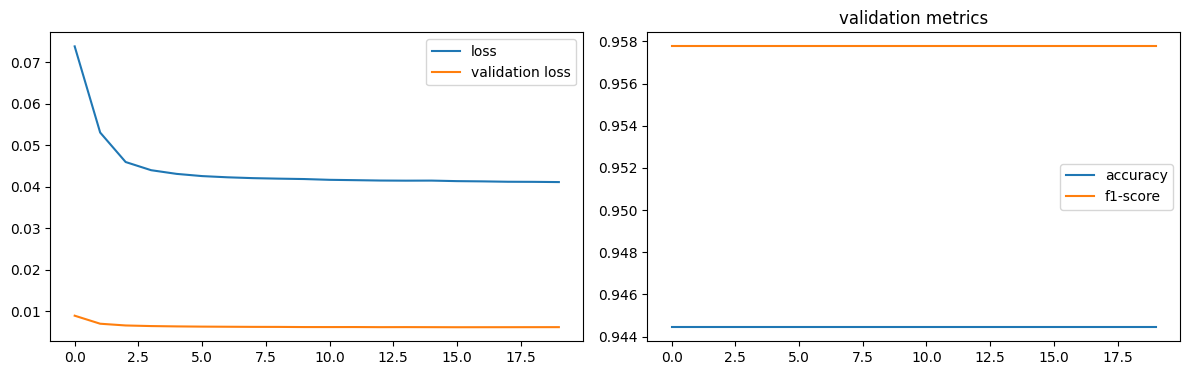

Test: loss: 0.3517136573791504, avg metrics: (0.9591131210327148, 0.9614181399345398)
dropping feature: (3, 'compactness2')


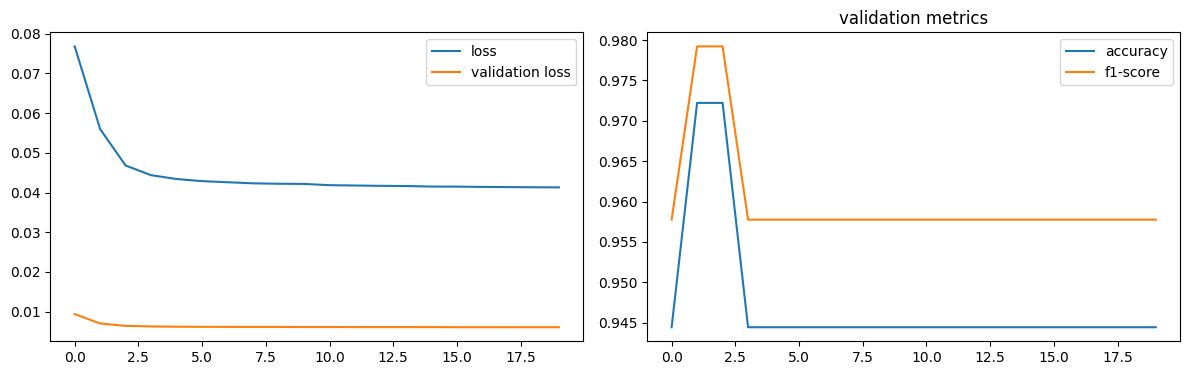

Test: loss: 0.341592013835907, avg metrics: (0.9639102220535278, 0.9662470698356629)
dropping feature: (9, 'concave_points3')


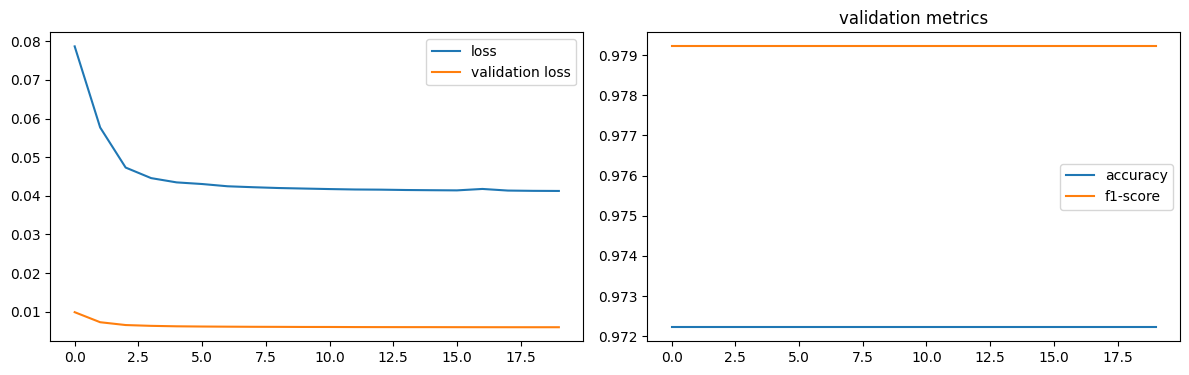

Test: loss: 0.3404262363910675, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'perimeter1')


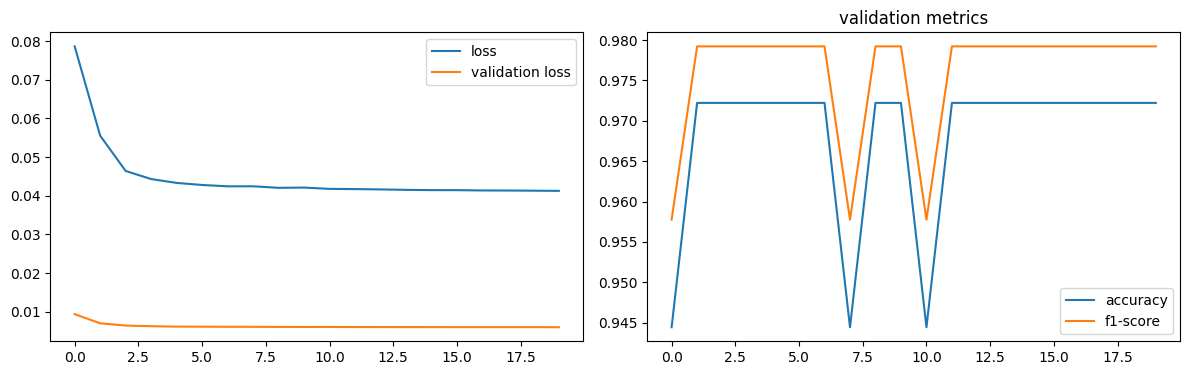

Test: loss: 0.3398016393184662, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (5, 'area3')


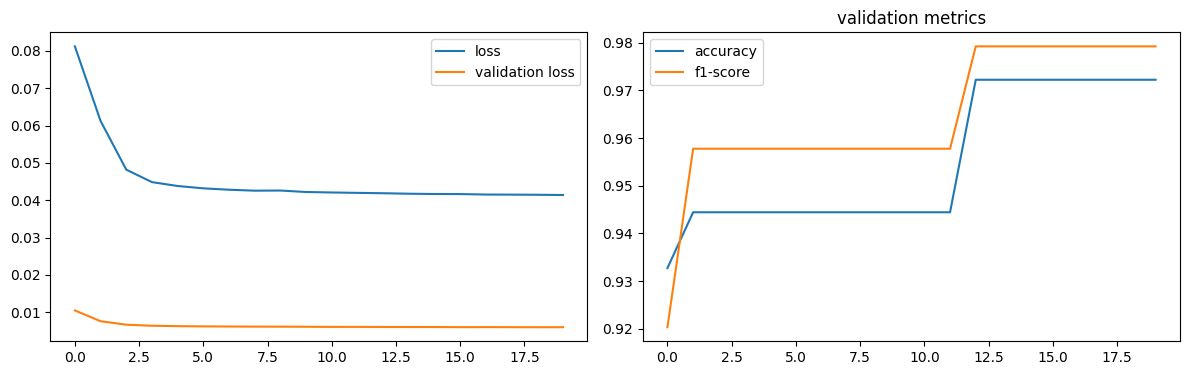

Test: loss: 0.34193918108940125, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (3, 'texture3')


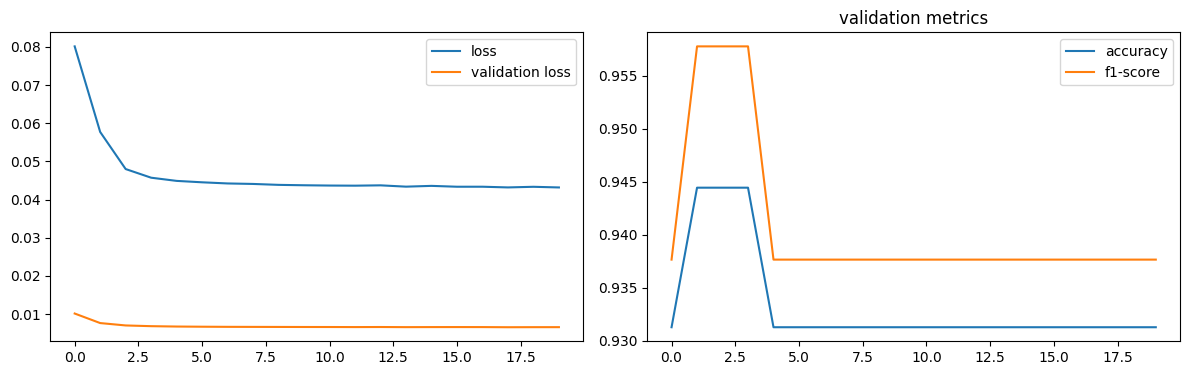

Test: loss: 0.35628193616867065, avg metrics: (0.9534792900085449, 0.9565169811248779)
dropping feature: (3, 'perimeter3')


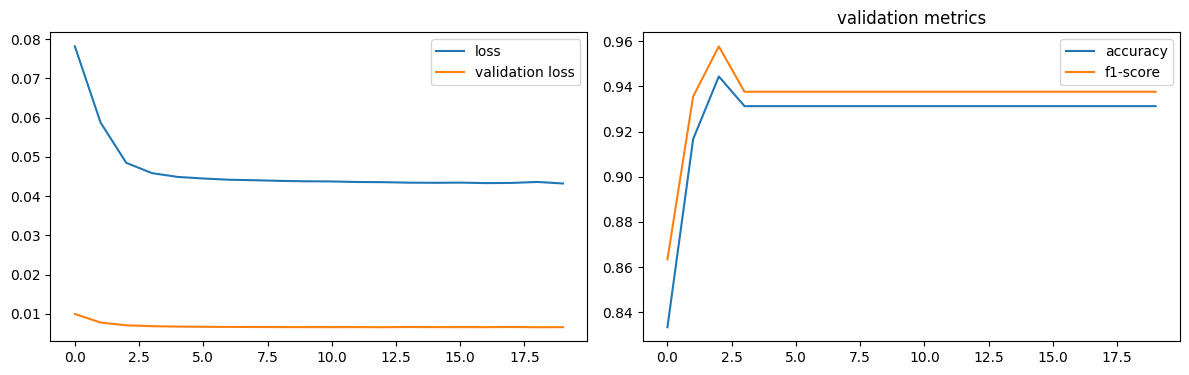

Test: loss: 0.3592577278614044, avg metrics: (0.9443034410476685, 0.9469085812568665)
dropping feature: (1, 'area2')


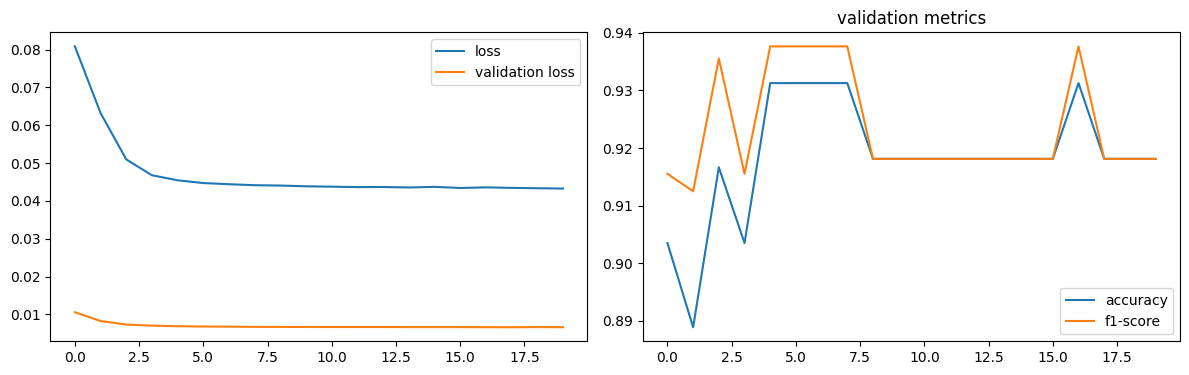

Test: loss: 0.3605656623840332, avg metrics: (0.9428949952125549, 0.9456746578216553)
dropping feature: (2, 'smoothness3')


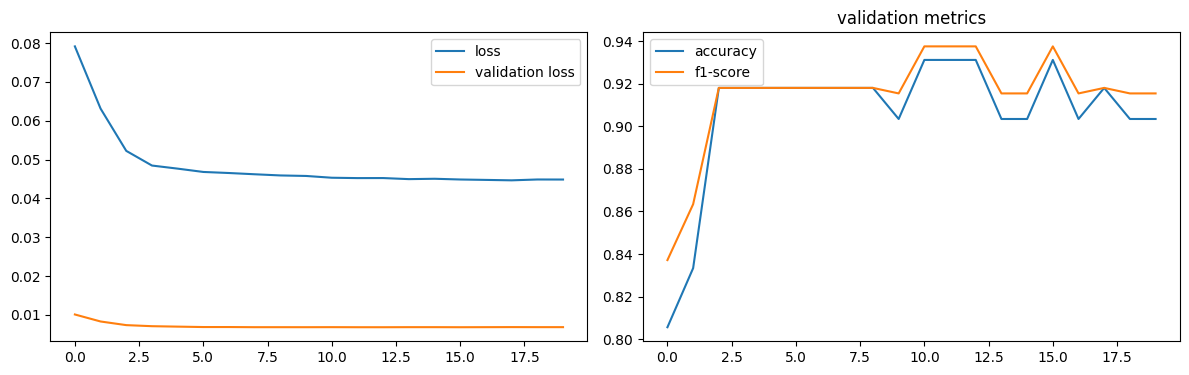

Test: loss: 0.38032159209251404, avg metrics: (0.9259517192840576, 0.9277310967445374)
dropping feature: (0, 'area1')


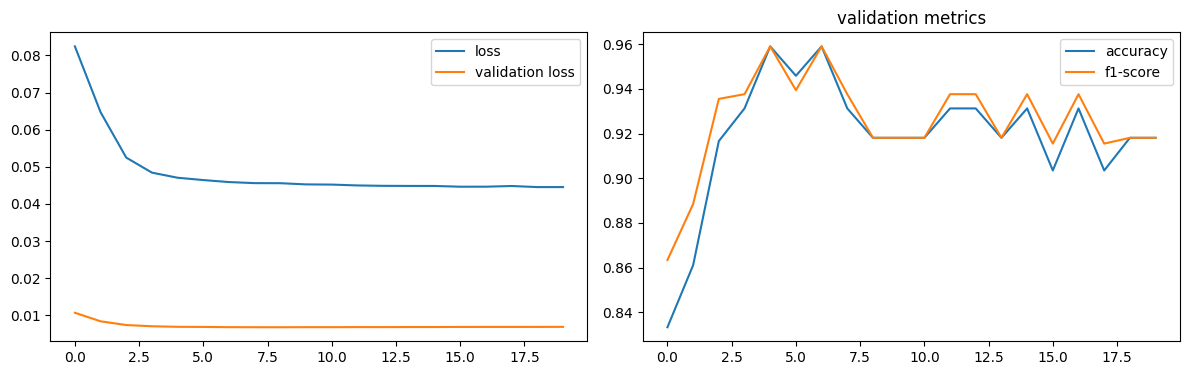

Test: loss: 0.3795240521430969, avg metrics: (0.9309022426605225, 0.9336024522781372)
dropping feature: (1, 'concavity3')


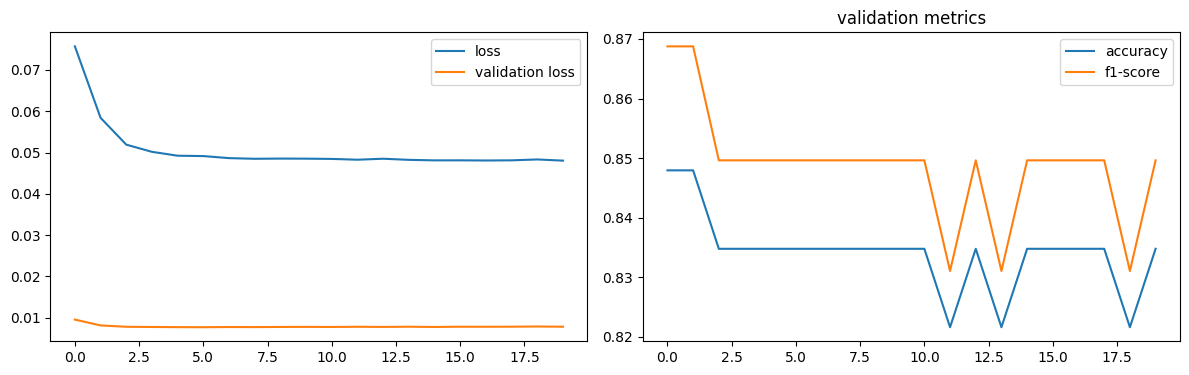

Test: loss: 0.40617215633392334, avg metrics: (0.8989262223243714, 0.9048480272293091)


In [28]:
torch.manual_seed(2024)

datasets = breast_cancer_datasets.copy()
headers = breast_cancer_headers.copy()


def model_factory(size):
    return BreastCancerNN(size, (32, 32), 2)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_fast,
    model_factory, optimizer_factory, criterion, score_outputs, 20,
    labels, "", None
)

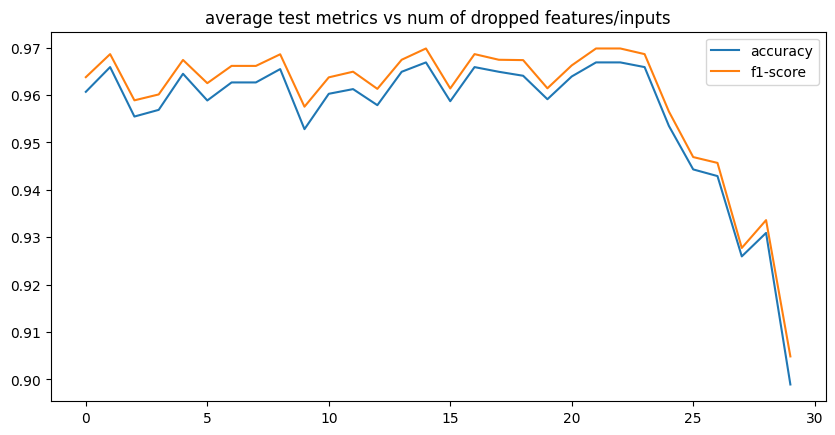

In [29]:
plot_dropping_metrics(test_metrics, labels)

In [30]:
num_drop_features = 23

save_models("breast", "fast-layer1", models, dropped)

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_features)
layer = models[num_drop_features].layer1

best_model.layer1 = layer

fast_dataset = reduced_datasets

features left [7]:  ['area1', 'area2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'concavity3']


### 1st hidden layer

In [31]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

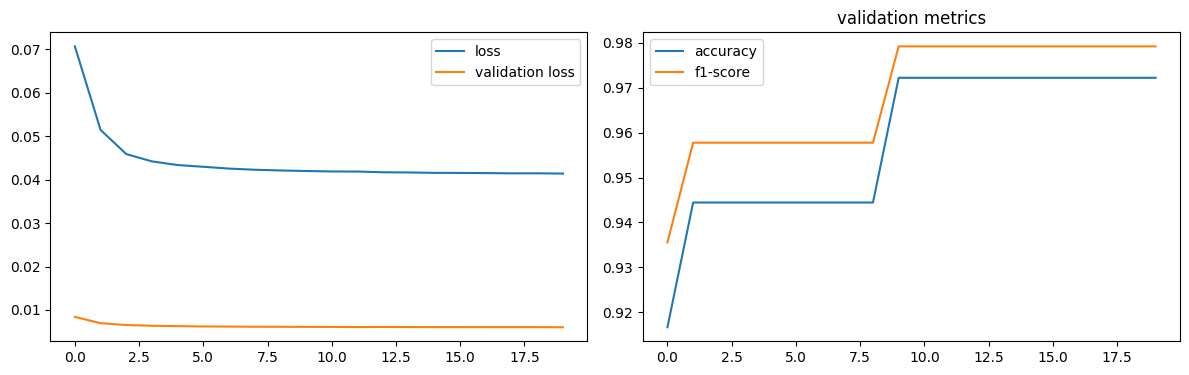

Test: loss: 0.3404568135738373, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron0')


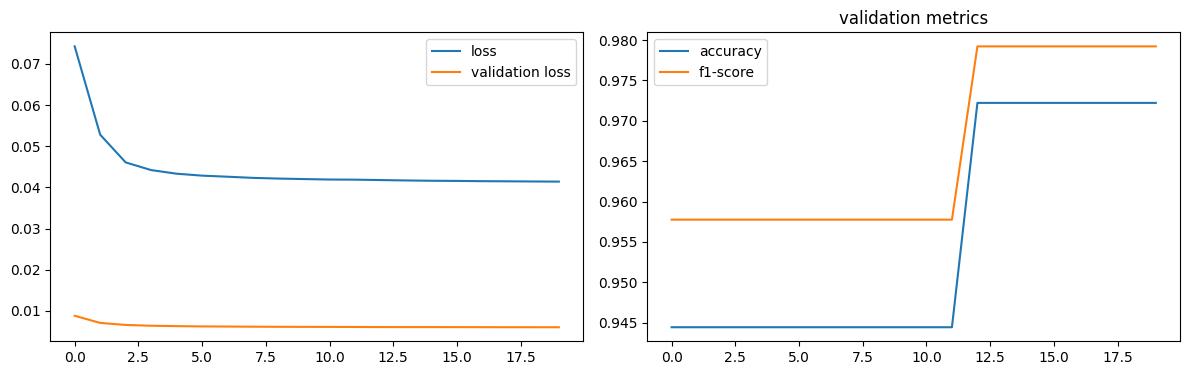

Test: loss: 0.3401854336261749, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (5, 'neuron6')


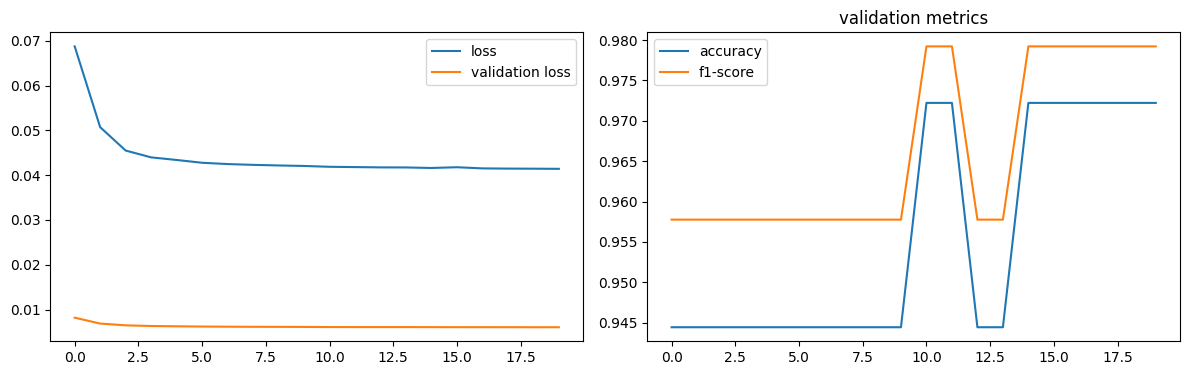

Test: loss: 0.3408239185810089, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (21, 'neuron23')


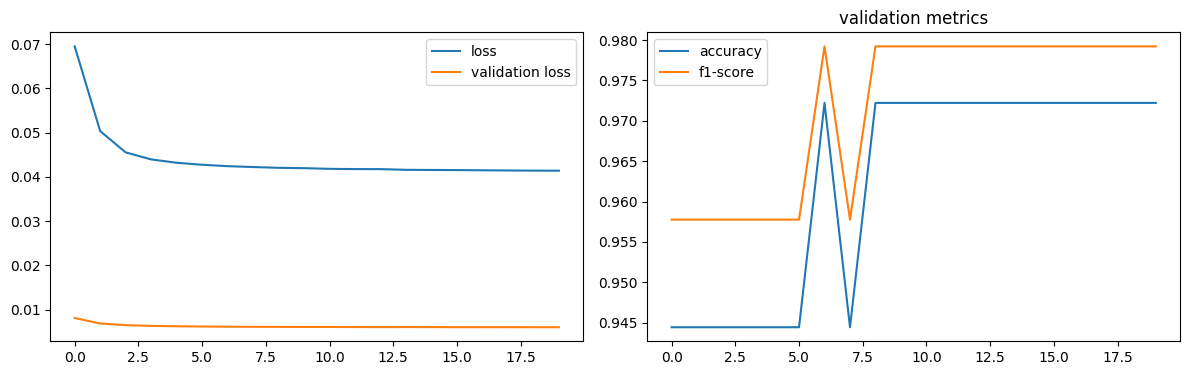

Test: loss: 0.34071022272109985, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (12, 'neuron14')


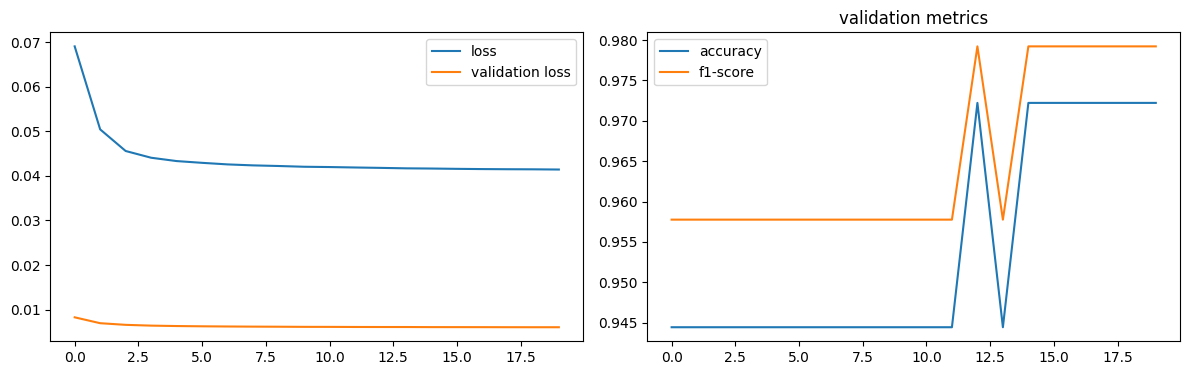

Test: loss: 0.3402548134326935, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (18, 'neuron21')


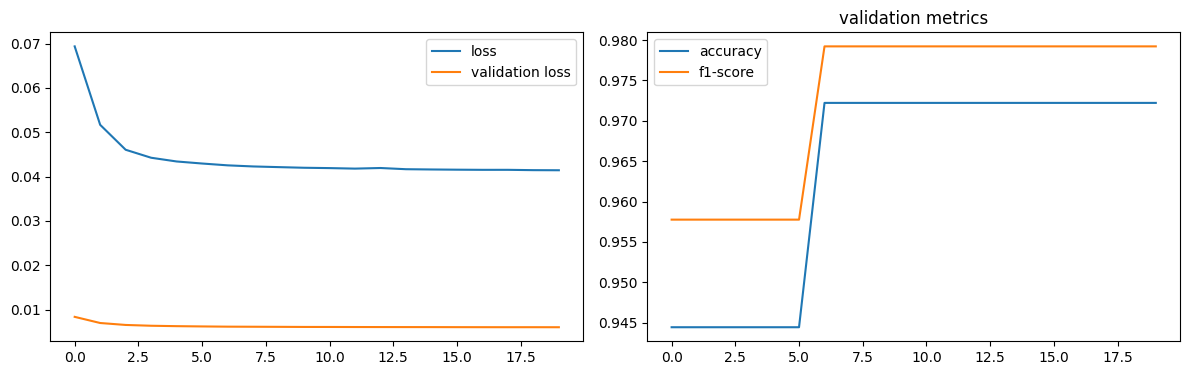

Test: loss: 0.34014254808425903, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron12')


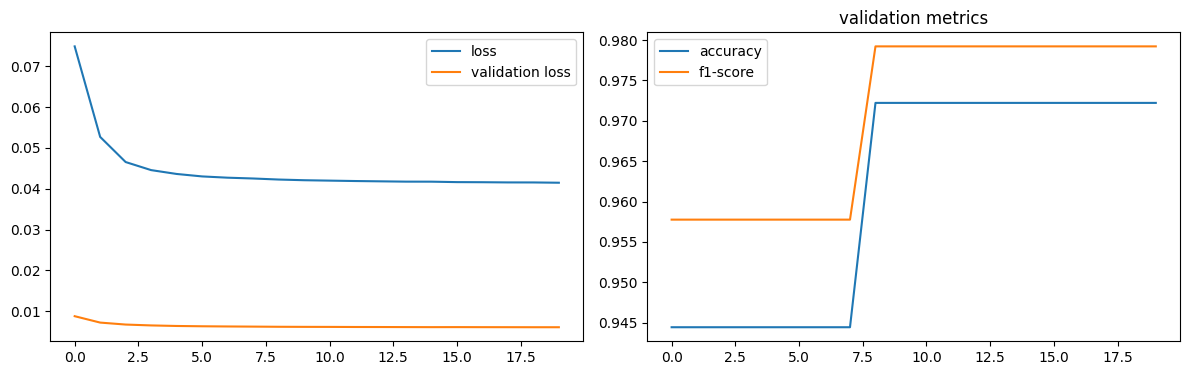

Test: loss: 0.34075358510017395, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron13')


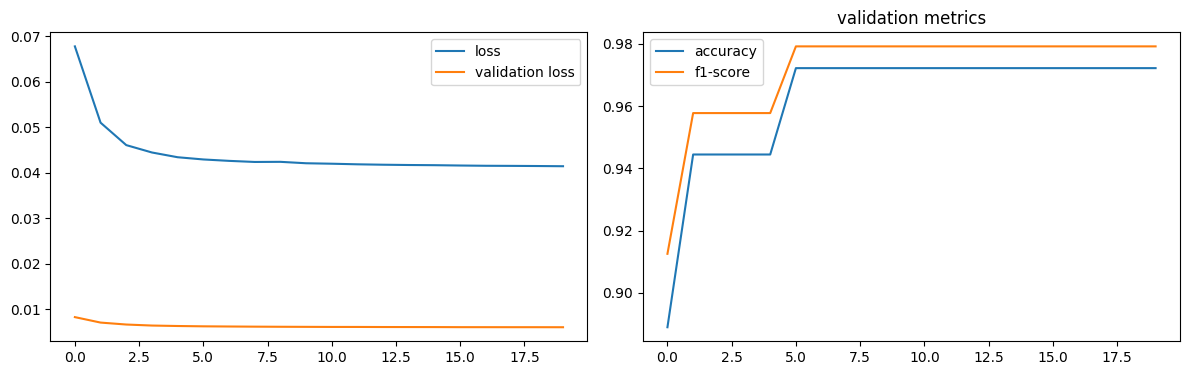

Test: loss: 0.3401743471622467, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (18, 'neuron25')


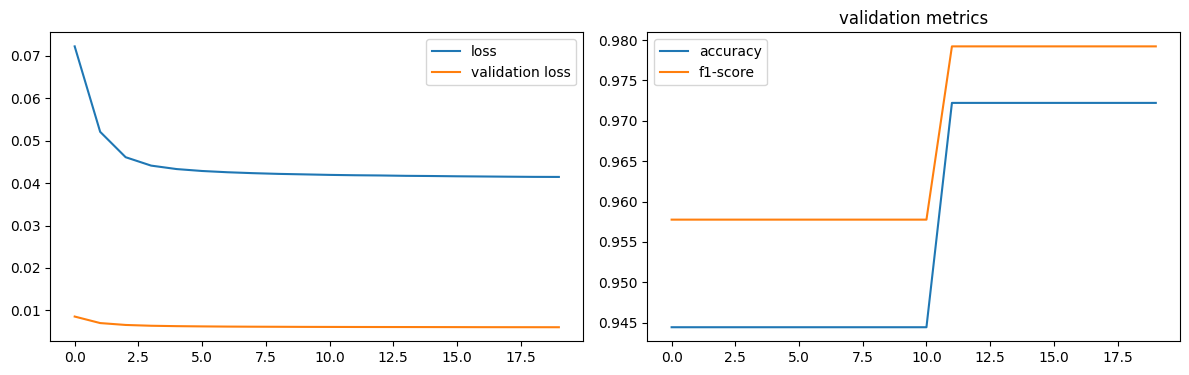

Test: loss: 0.34028440713882446, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (15, 'neuron20')


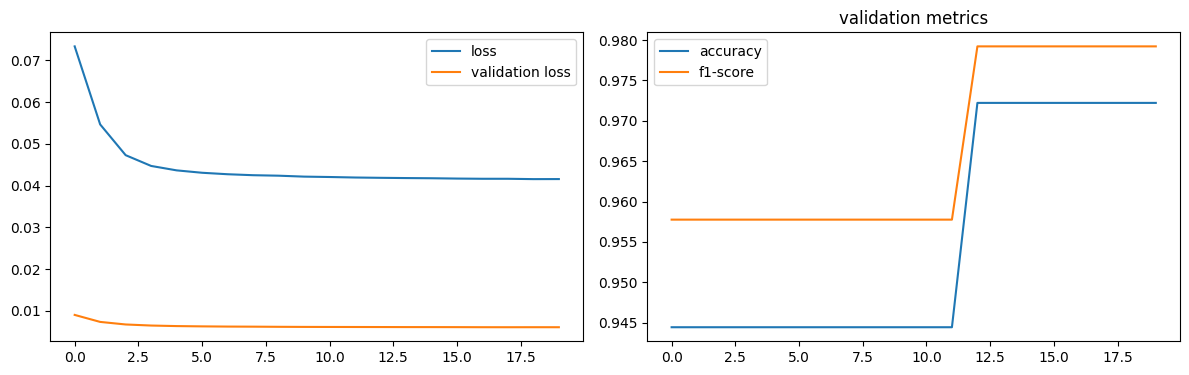

Test: loss: 0.34110593795776367, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (8, 'neuron10')


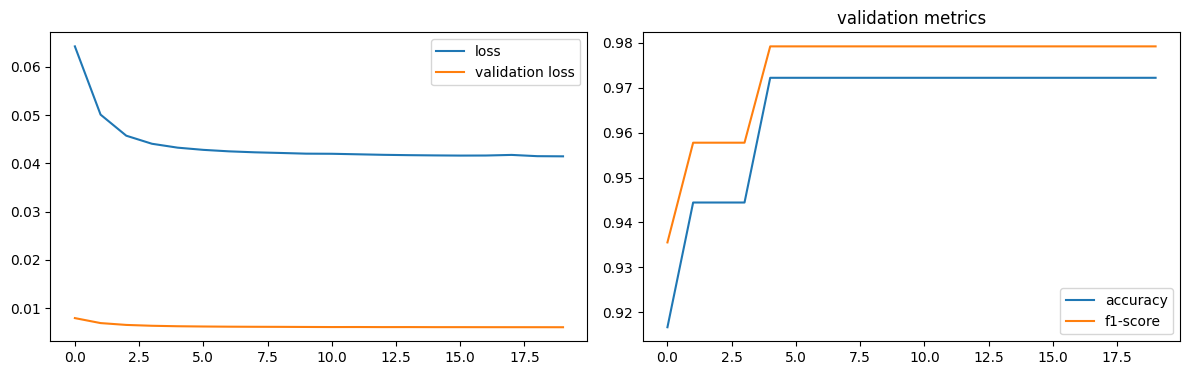

Test: loss: 0.3411651849746704, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (9, 'neuron15')


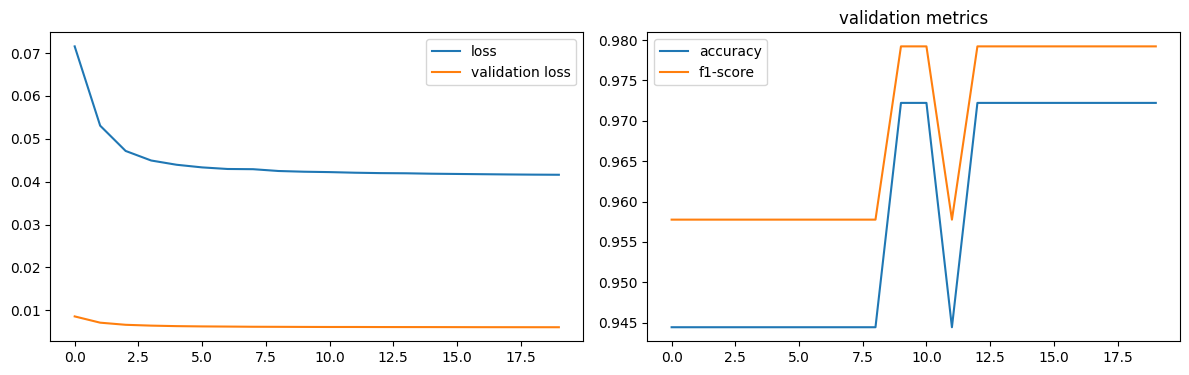

Test: loss: 0.34117764234542847, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron4')


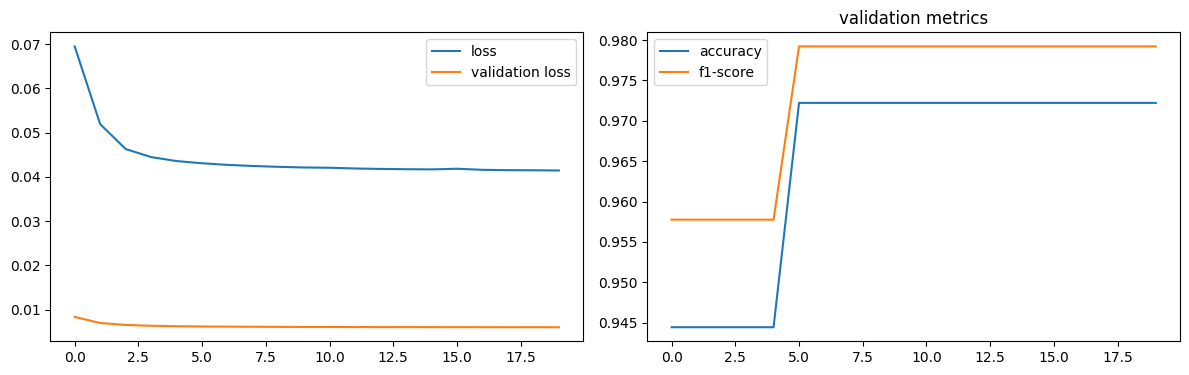

Test: loss: 0.34039798378944397, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron3')


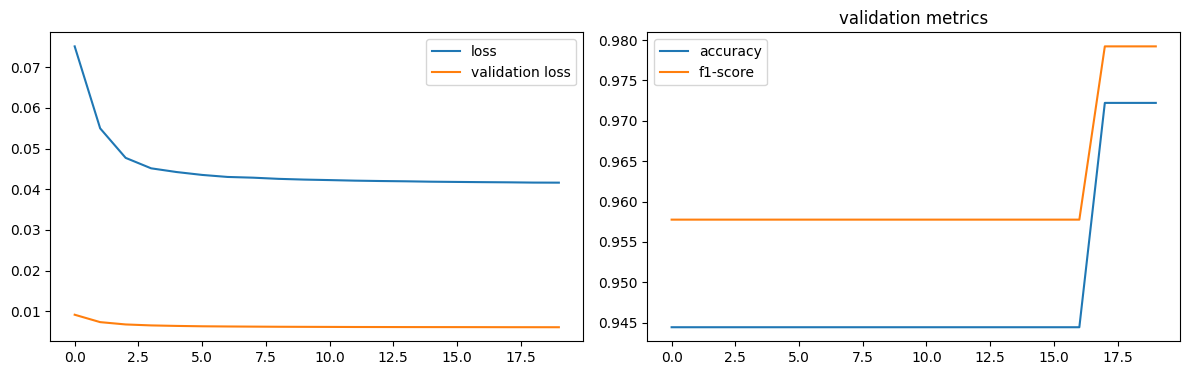

Test: loss: 0.3409165143966675, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (8, 'neuron17')


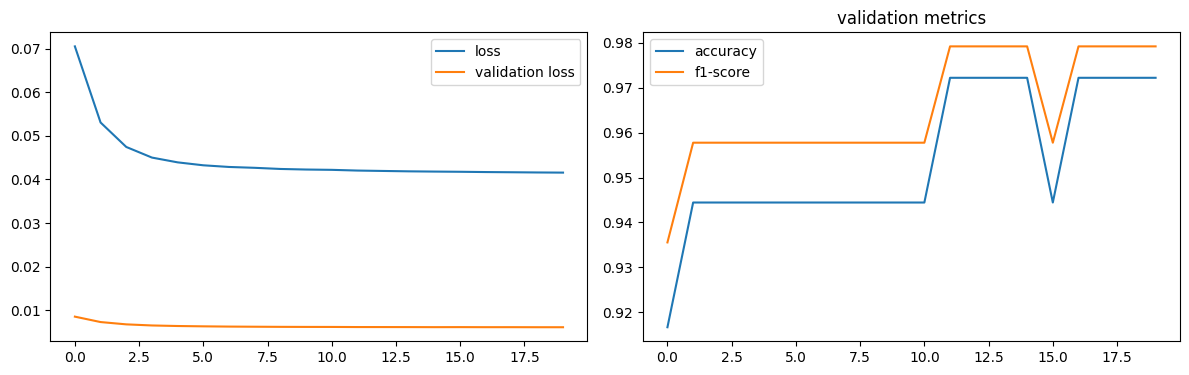

Test: loss: 0.3412095904350281, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (13, 'neuron27')


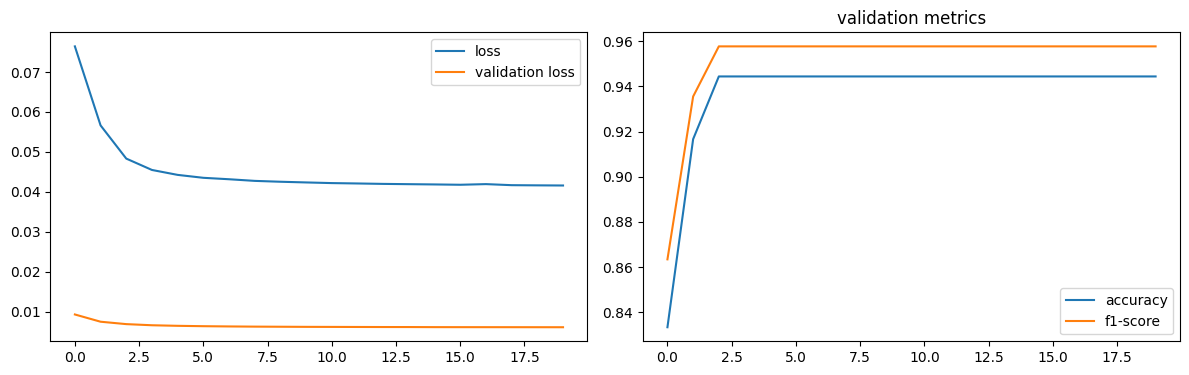

Test: loss: 0.34179946780204773, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (16, 'neuron31')


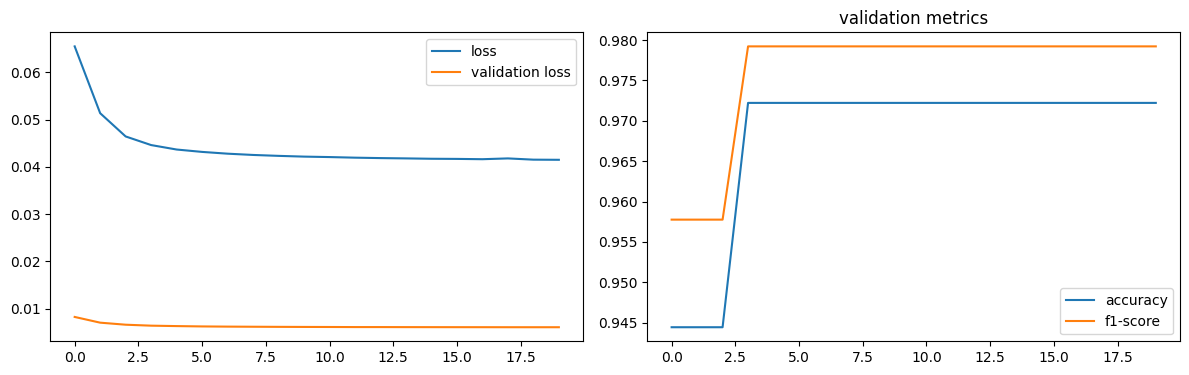

Test: loss: 0.34093910455703735, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron1')


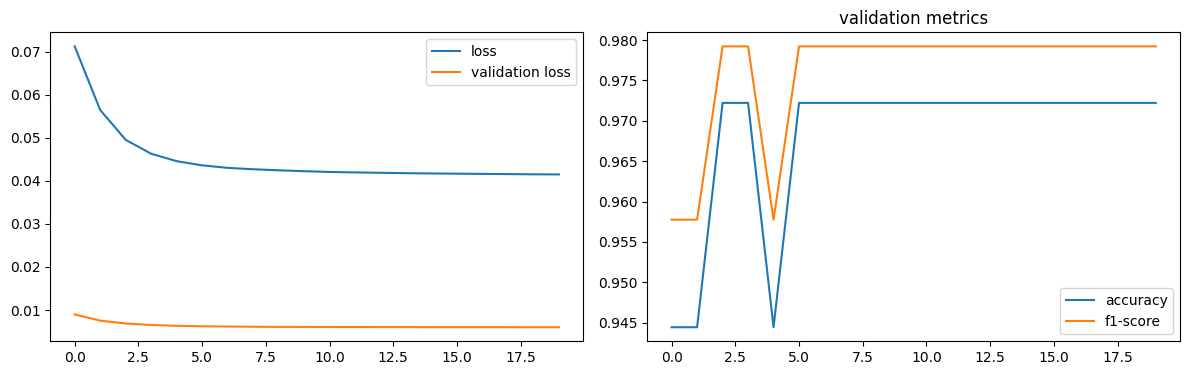

Test: loss: 0.3400278091430664, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (5, 'neuron11')


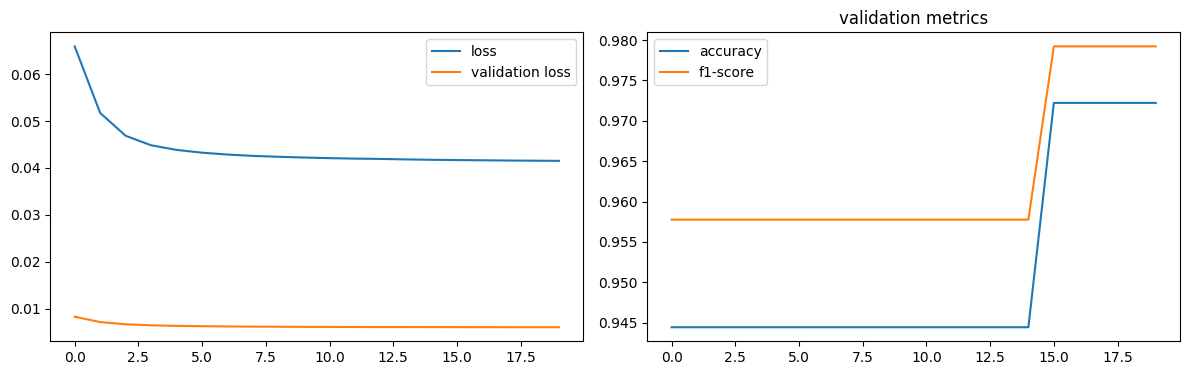

Test: loss: 0.3402171730995178, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron9')


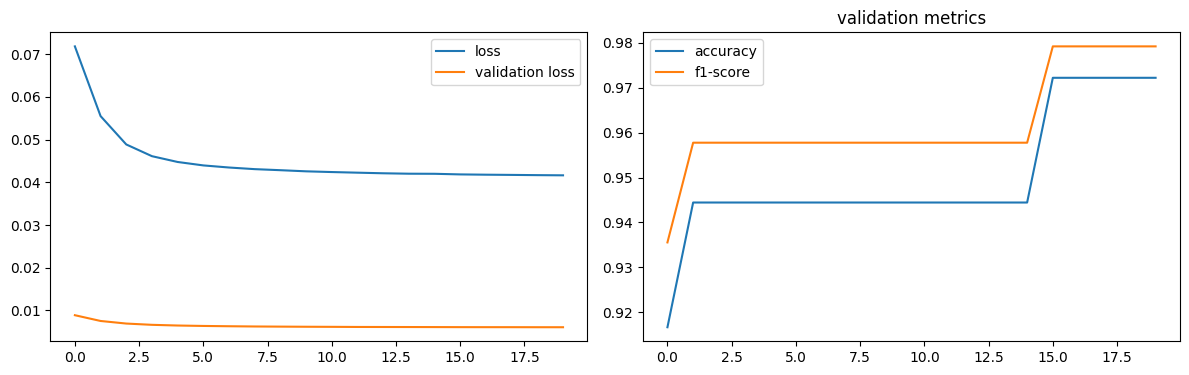

Test: loss: 0.3411763310432434, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (11, 'neuron29')


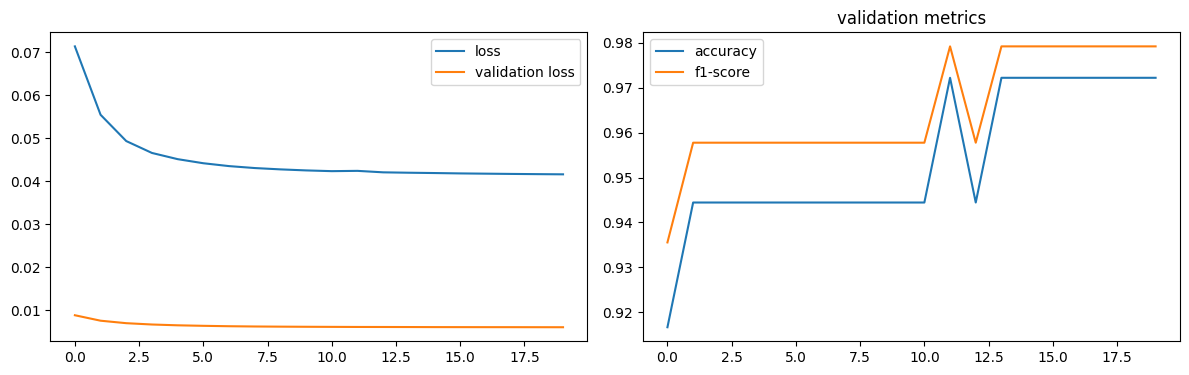

Test: loss: 0.34185683727264404, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (9, 'neuron26')


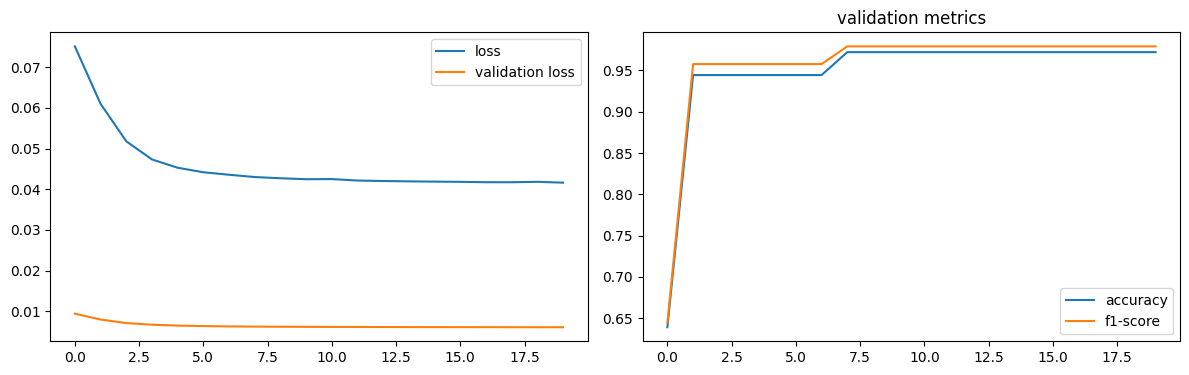

Test: loss: 0.341382771730423, avg metrics: (0.9649003148078918, 0.9674378156661987)
dropping feature: (5, 'neuron18')


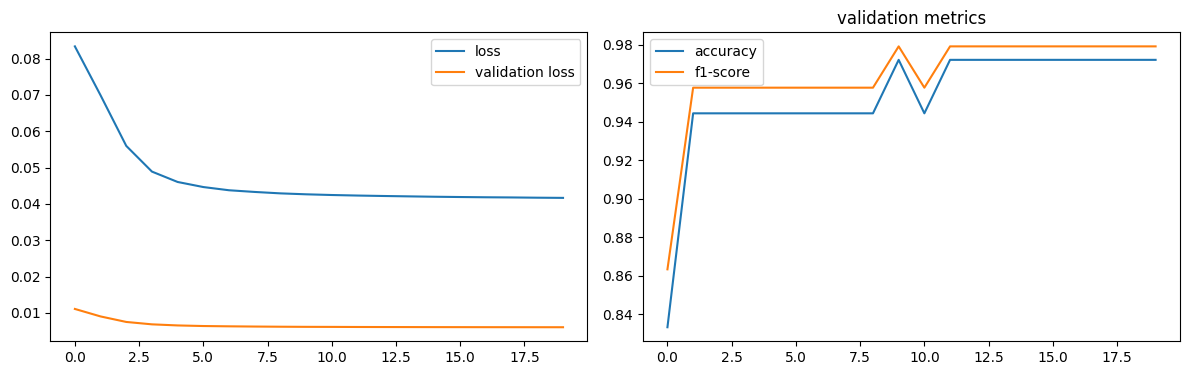

Test: loss: 0.3440377116203308, avg metrics: (0.9629201292991638, 0.965056324005127)
dropping feature: (5, 'neuron19')


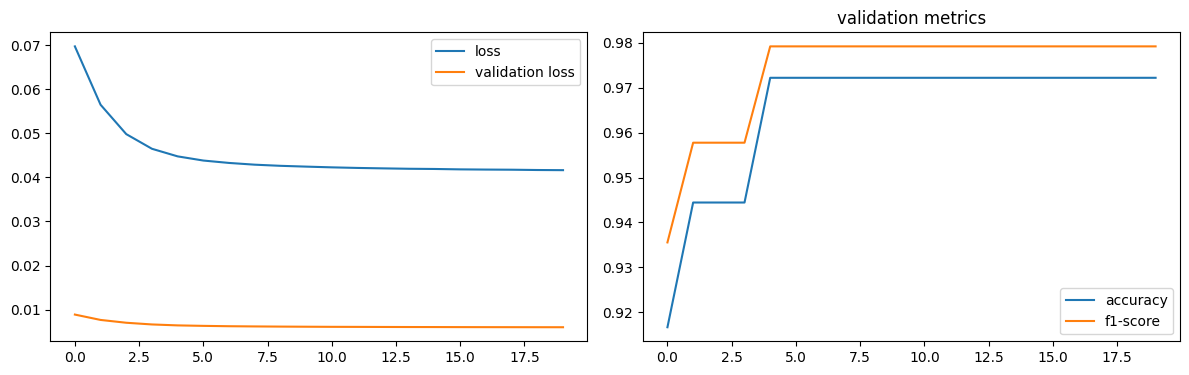

Test: loss: 0.34436744451522827, avg metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (7, 'neuron28')


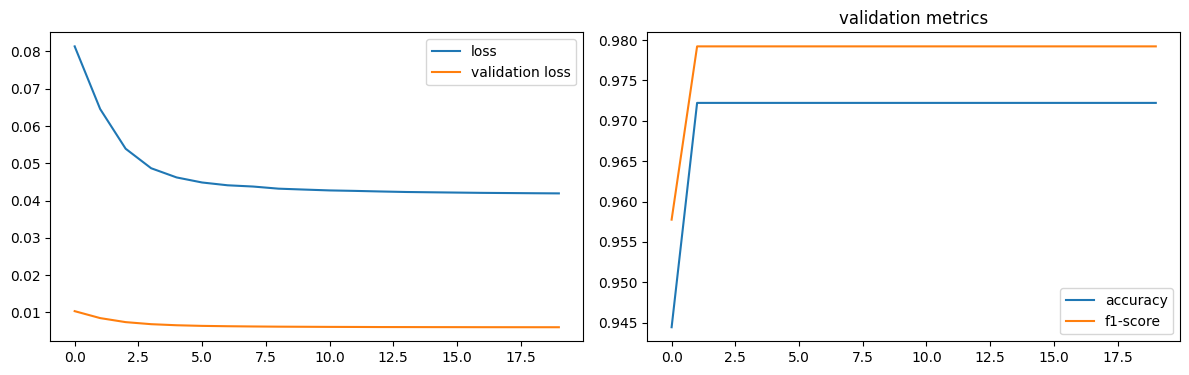

Test: loss: 0.34343063831329346, avg metrics: (0.9649003148078918, 0.9674378156661987)
dropping feature: (6, 'neuron24')


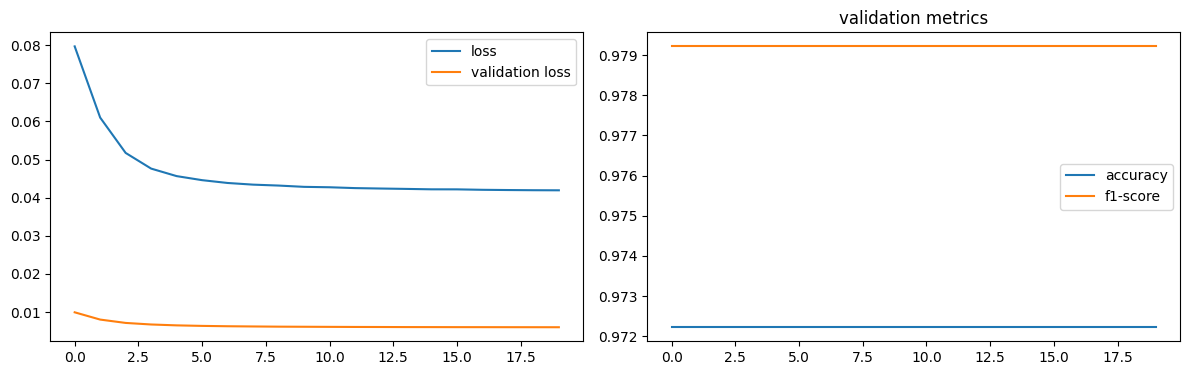

Test: loss: 0.3441973030567169, avg metrics: (0.9639102220535278, 0.9662470698356629)
dropping feature: (5, 'neuron22')


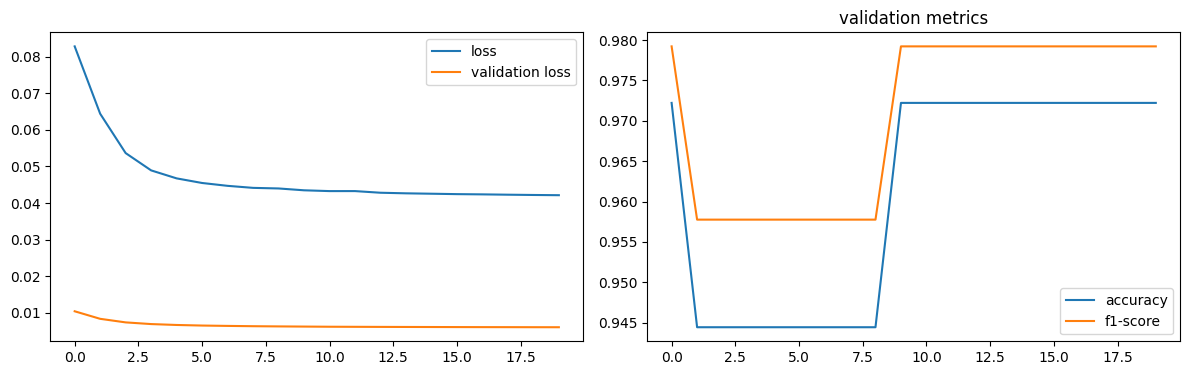

Test: loss: 0.3458710014820099, avg metrics: (0.9605215787887573, 0.9626418590545655)
dropping feature: (3, 'neuron8')


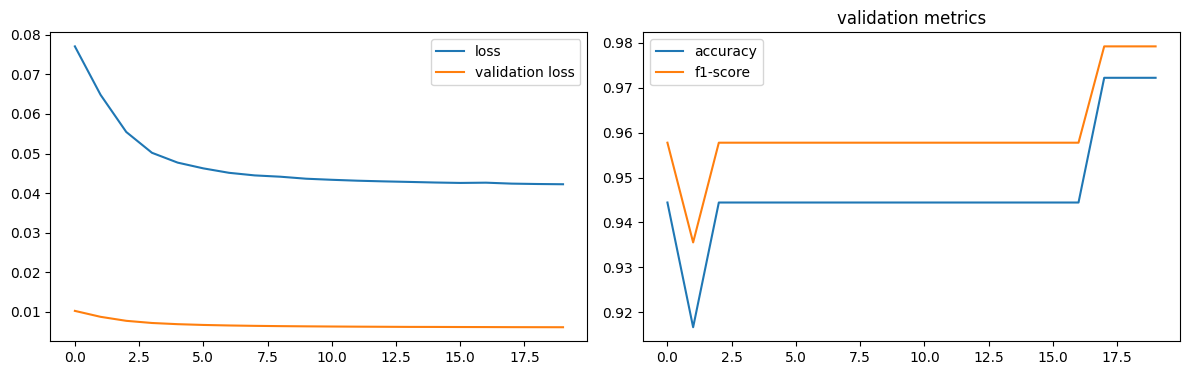

Test: loss: 0.3473718762397766, avg metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (3, 'neuron16')


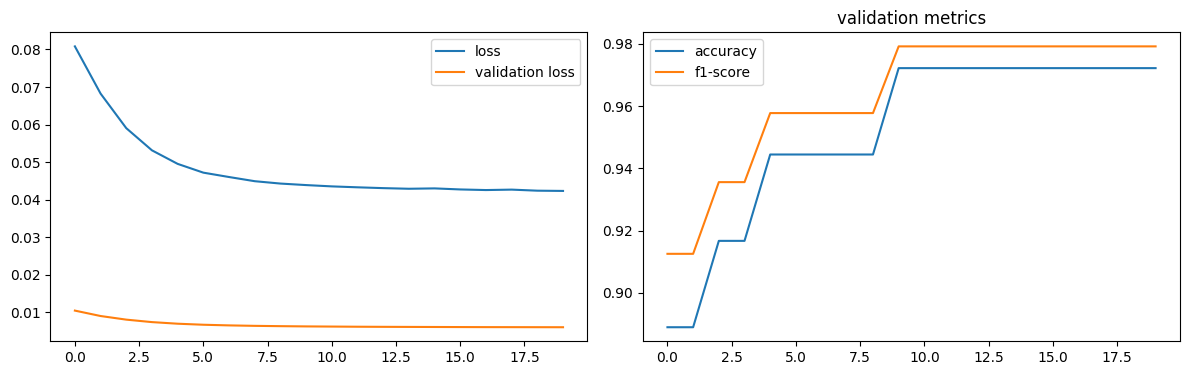

Test: loss: 0.34369605779647827, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron7')


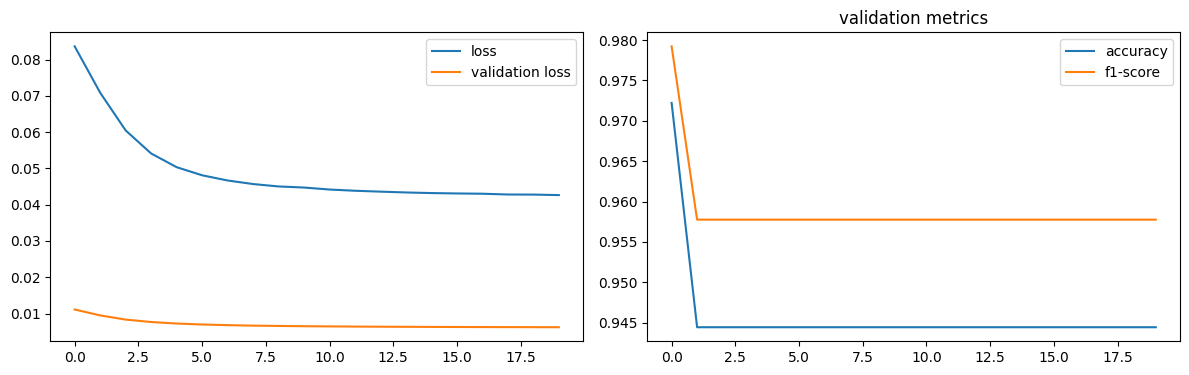

Test: loss: 0.3456875681877136, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron30')


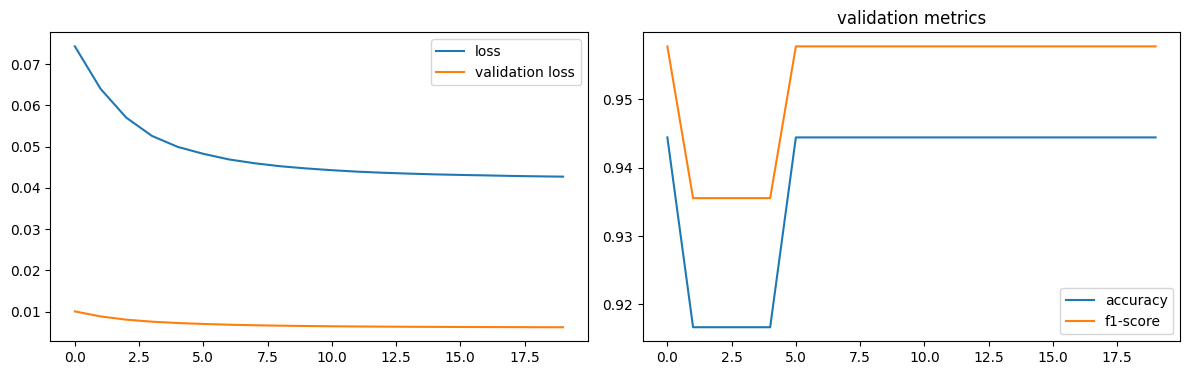

Test: loss: 0.3446260094642639, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'neuron5')


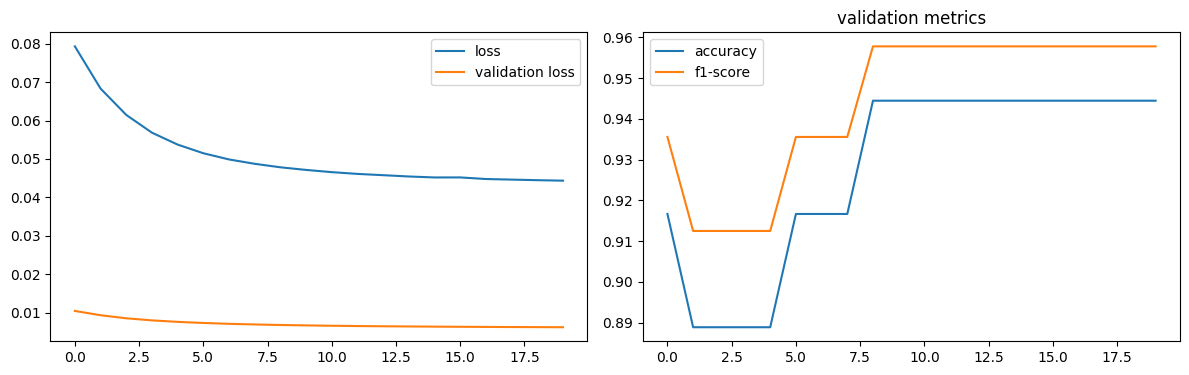

Test: loss: 0.3513668477535248, avg metrics: (0.9647887349128723, 0.9696745276451111)


In [32]:
torch.manual_seed(2024)

headers = [f"neuron{i}" for i in range(32)]

def model_factory(size):
    model = BreastCancerNN(1, (size, 32), 2)
    model.layer1 = nn.Identity()
    return model


test_metrics, dropped, models = prune(
    datasets, headers, analyze_fast,
    model_factory, optimizer_factory, criterion, score_outputs, 20,
    labels, "", None
)

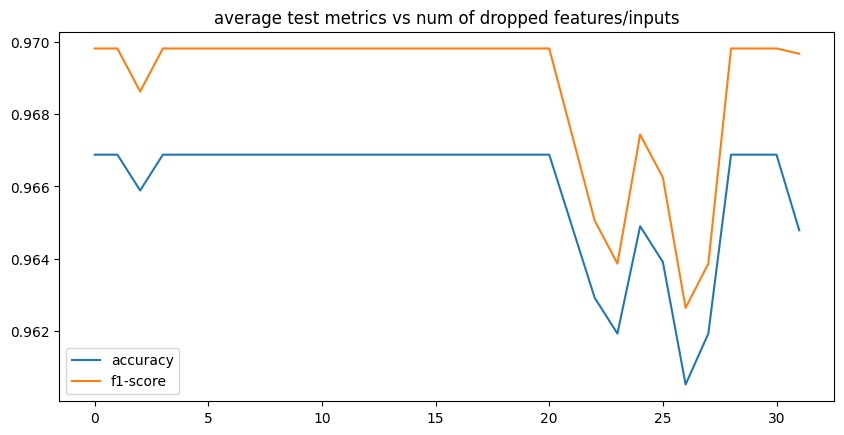

In [33]:
plot_dropping_metrics(test_metrics, labels)

In [34]:
num_drop_neurons = 20

save_models("breast", "fast-layer2", models, dropped)

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].layer2

best_model.layer2 = layer
best_model.layer1[0] = reduce_linear(best_model.layer1[0], dropped, num_drop_neurons)

features left [12]:  ['neuron2', 'neuron5', 'neuron7', 'neuron8', 'neuron16', 'neuron18', 'neuron19', 'neuron22', 'neuron24', 'neuron26', 'neuron28', 'neuron30']


### 2nd hidden layer

In [35]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

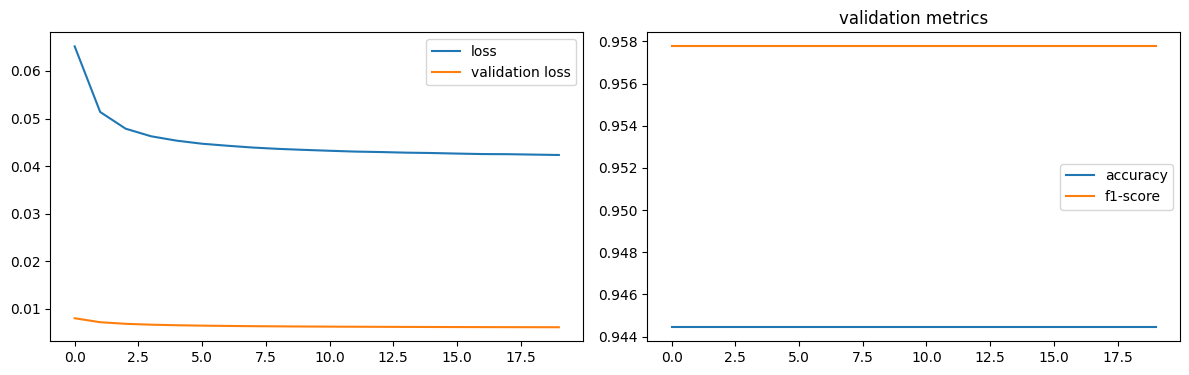

Test: loss: 0.3447023928165436, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron0')


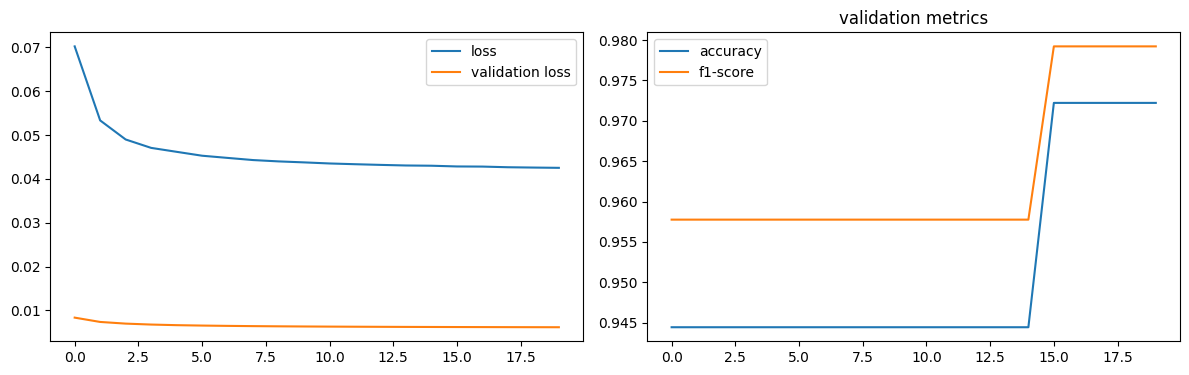

Test: loss: 0.34490126371383667, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (2, 'neuron3')


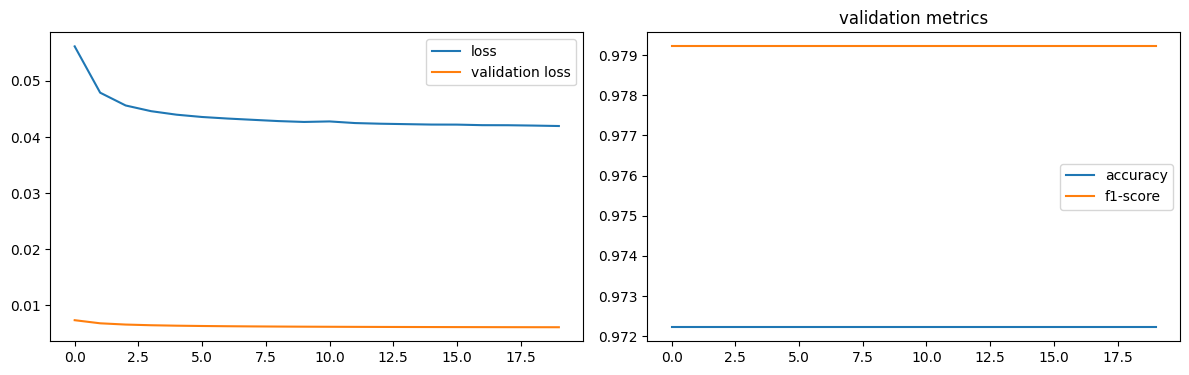

Test: loss: 0.3433021605014801, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (4, 'neuron6')


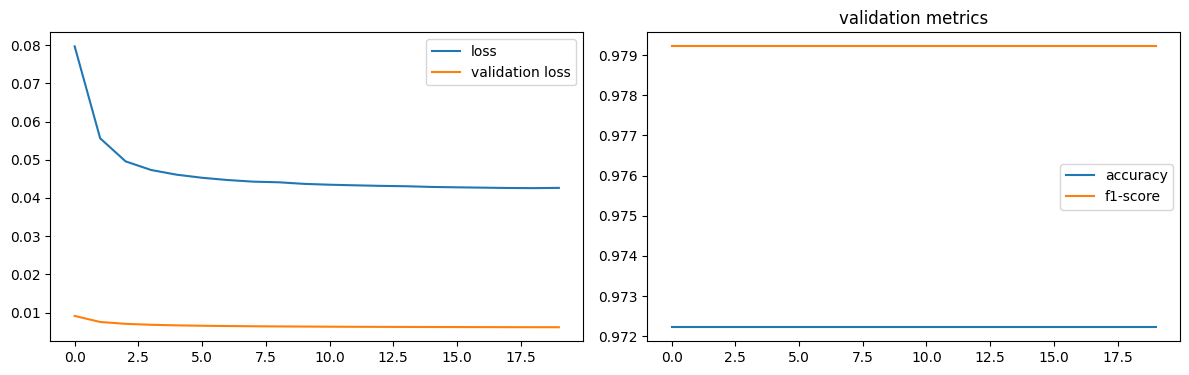

Test: loss: 0.3448370099067688, avg metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron4')


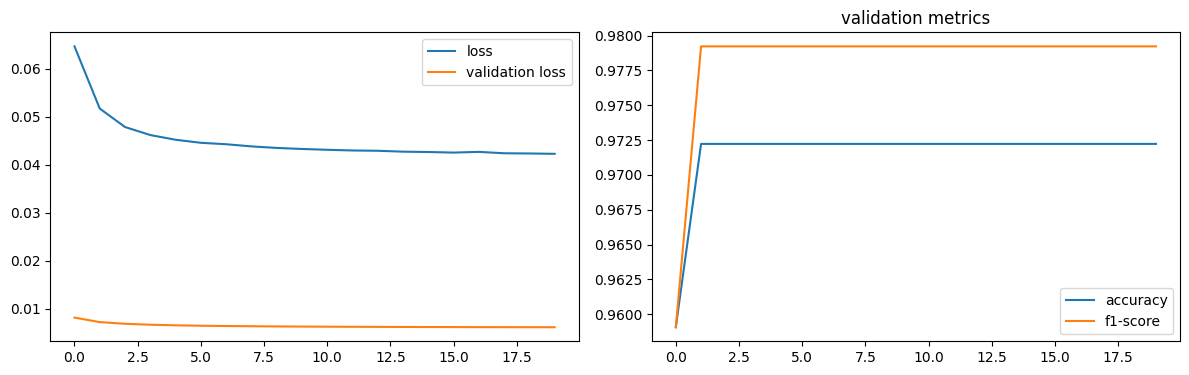

Test: loss: 0.3440704941749573, avg metrics: (0.9629201292991638, 0.965056324005127)
dropping feature: (6, 'neuron10')


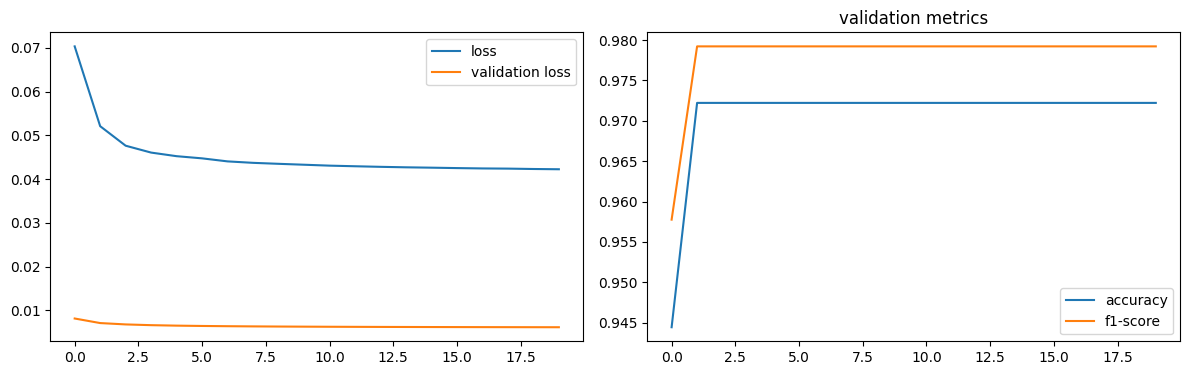

Test: loss: 0.3445543944835663, avg metrics: (0.9649003148078918, 0.9674378156661987)
dropping feature: (14, 'neuron19')


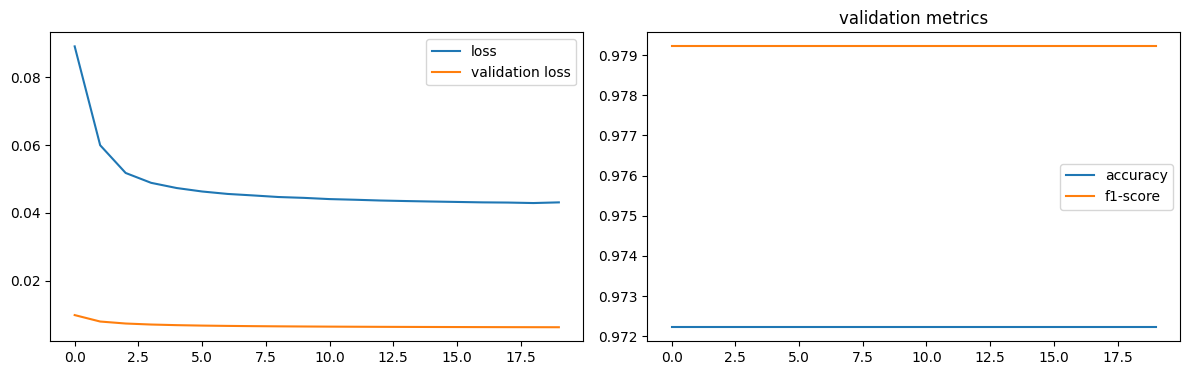

Test: loss: 0.34718579053878784, avg metrics: (0.9658904075622559, 0.9686285614967346)
dropping feature: (6, 'neuron11')


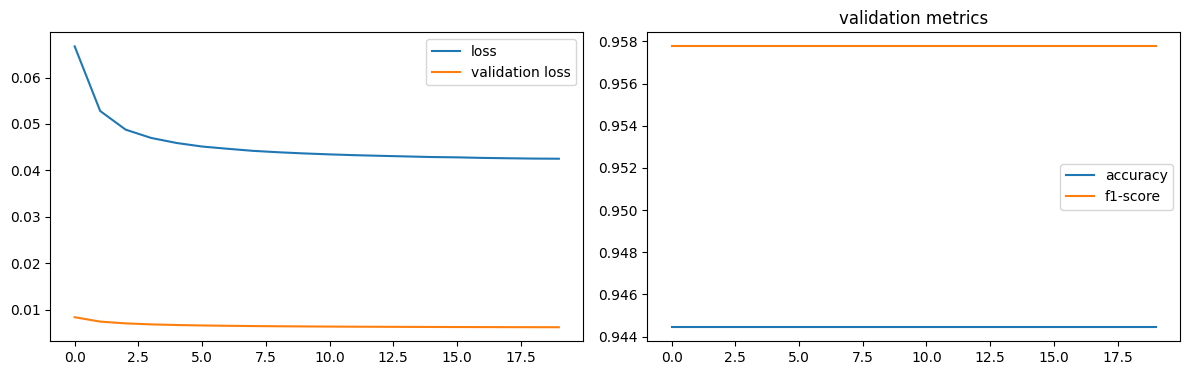

Test: loss: 0.345803827047348, avg metrics: (0.9639102220535278, 0.9662470698356629)
dropping feature: (18, 'neuron25')


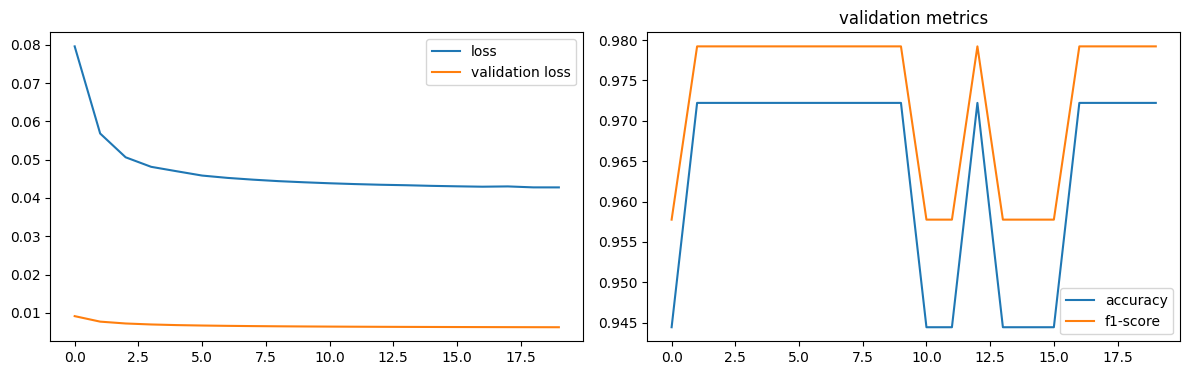

Test: loss: 0.3472210168838501, avg metrics: (0.9615116834640502, 0.9638320207595825)
dropping feature: (14, 'neuron21')


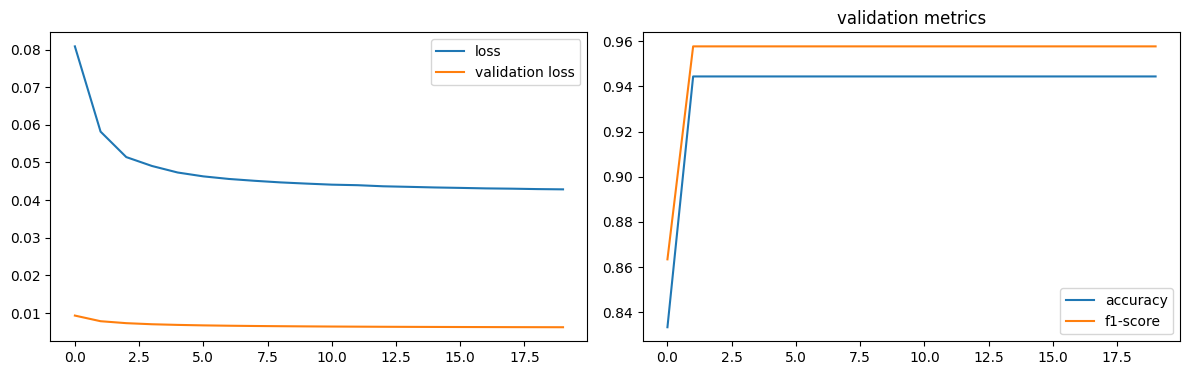

Test: loss: 0.34798479080200195, avg metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (10, 'neuron16')


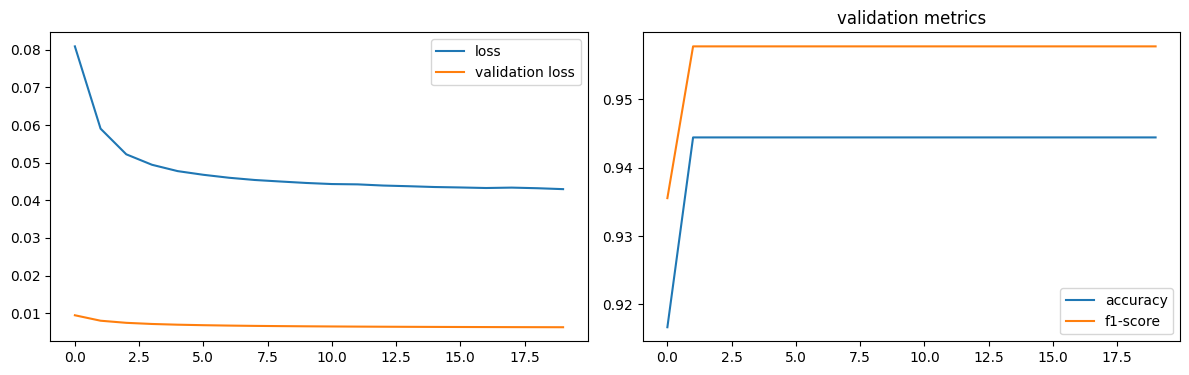

Test: loss: 0.34864965081214905, avg metrics: (0.9629201292991638, 0.965056324005127)
dropping feature: (18, 'neuron28')


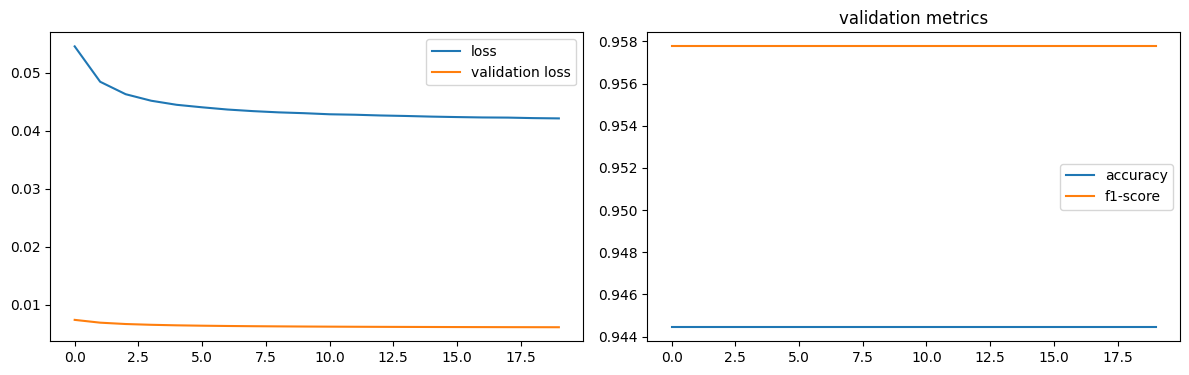

Test: loss: 0.3451978266239166, avg metrics: (0.9625017762184143, 0.9650227665901184)
dropping feature: (6, 'neuron12')


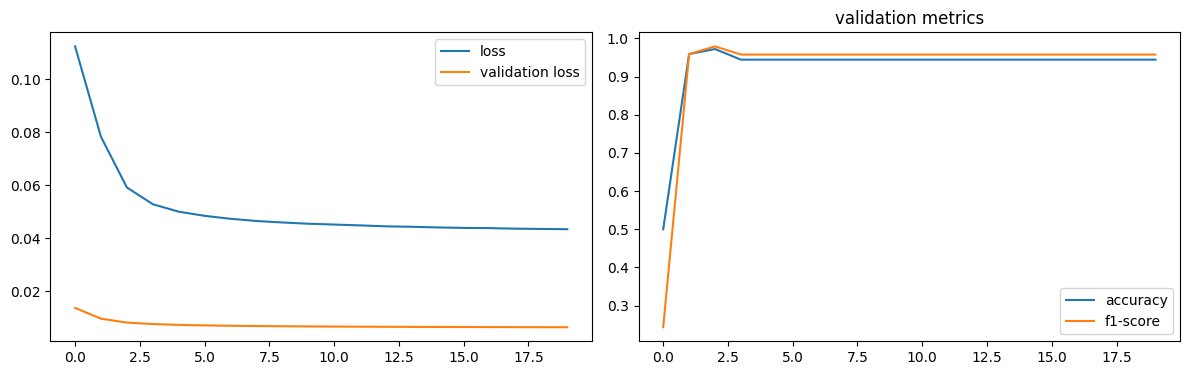

Test: loss: 0.3502149283885956, avg metrics: (0.9625017642974854, 0.9650233507156372)
dropping feature: (7, 'neuron14')


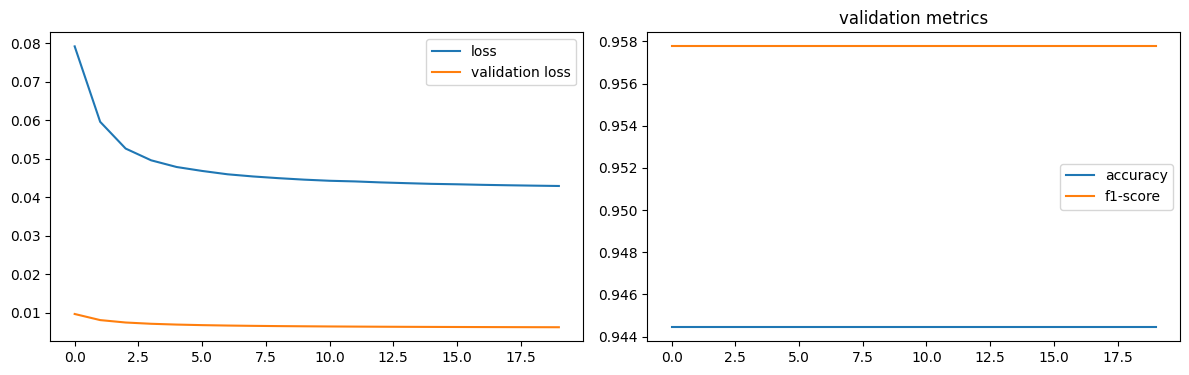

Test: loss: 0.34842047095298767, avg metrics: (0.9633384823799134, 0.9650833129882812)
dropping feature: (11, 'neuron22')


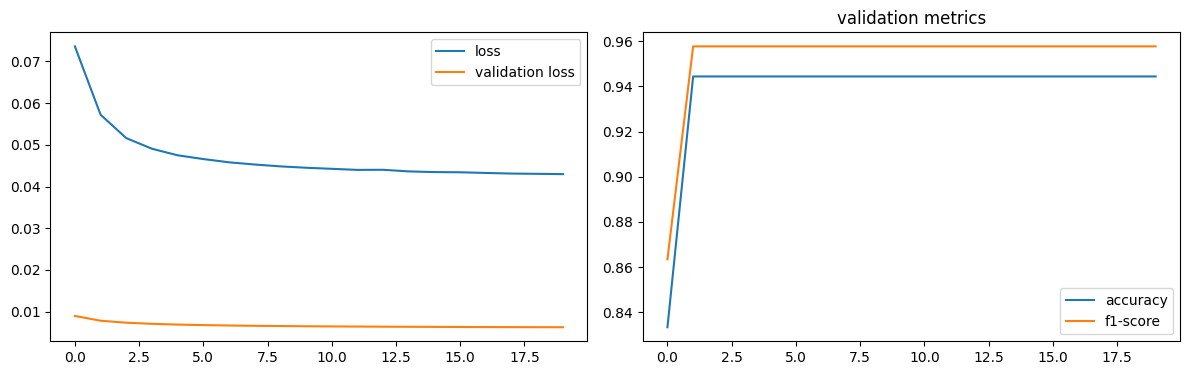

Test: loss: 0.3486365079879761, avg metrics: (0.9606749773025512, 0.9637649059295654)
dropping feature: (1, 'neuron2')


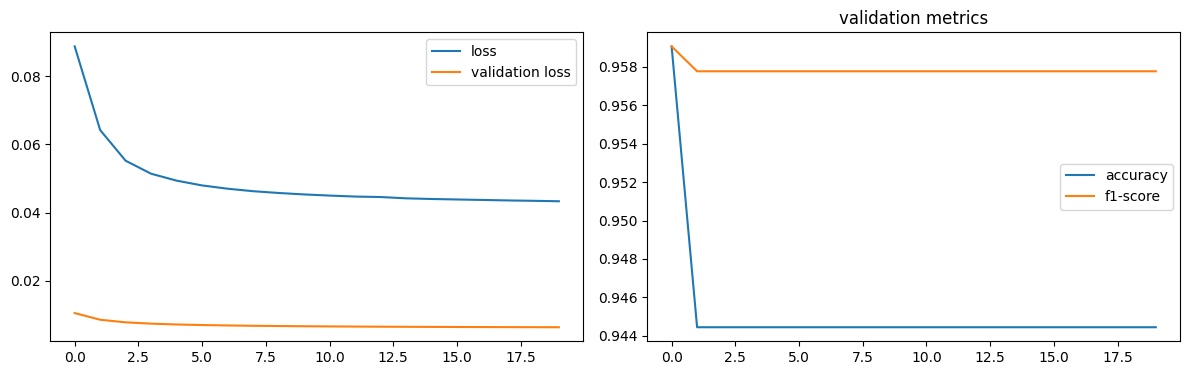

Test: loss: 0.3505132496356964, avg metrics: (0.9606749653816223, 0.9637654900550843)
dropping feature: (0, 'neuron1')


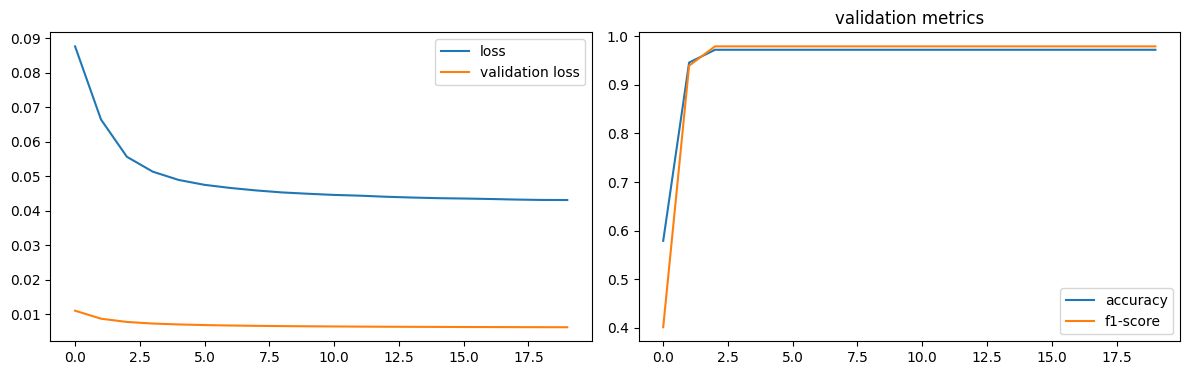

Test: loss: 0.34820204973220825, avg metrics: (0.9591131210327148, 0.9614181399345398)
dropping feature: (11, 'neuron26')


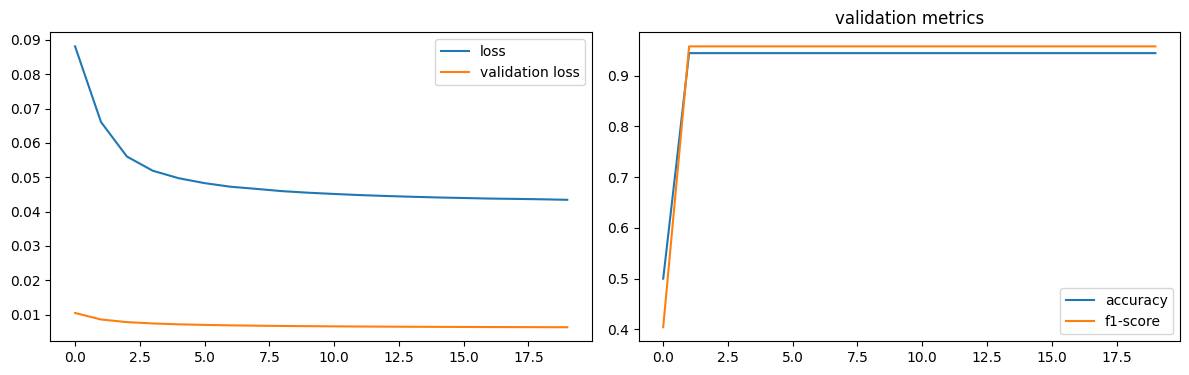

Test: loss: 0.3515572249889374, avg metrics: (0.9577046632766724, 0.9601944208145141)
dropping feature: (3, 'neuron9')


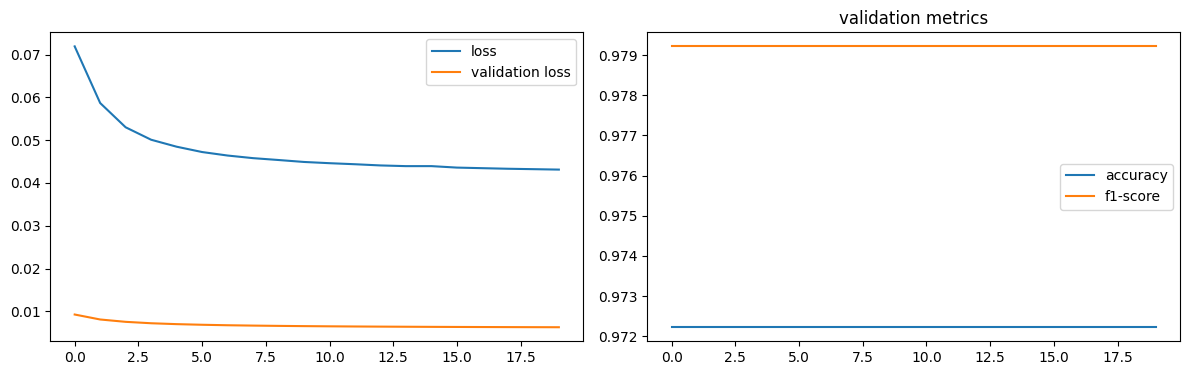

Test: loss: 0.34857797622680664, avg metrics: (0.9633384704589844, 0.9650773286819458)
dropping feature: (3, 'neuron13')


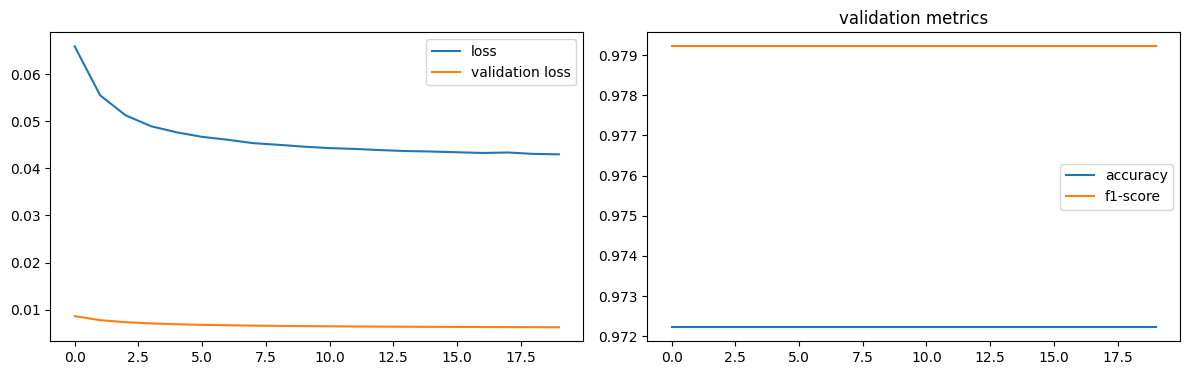

Test: loss: 0.3481144905090332, avg metrics: (0.9639102220535278, 0.9662470698356629)
dropping feature: (6, 'neuron20')


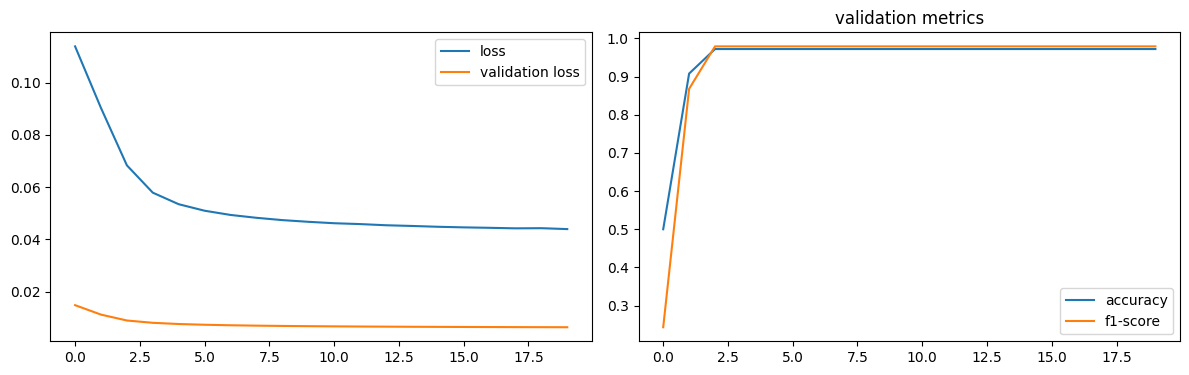

Test: loss: 0.3537062406539917, avg metrics: (0.9658904075622559, 0.9686219930648804)
dropping feature: (0, 'neuron5')


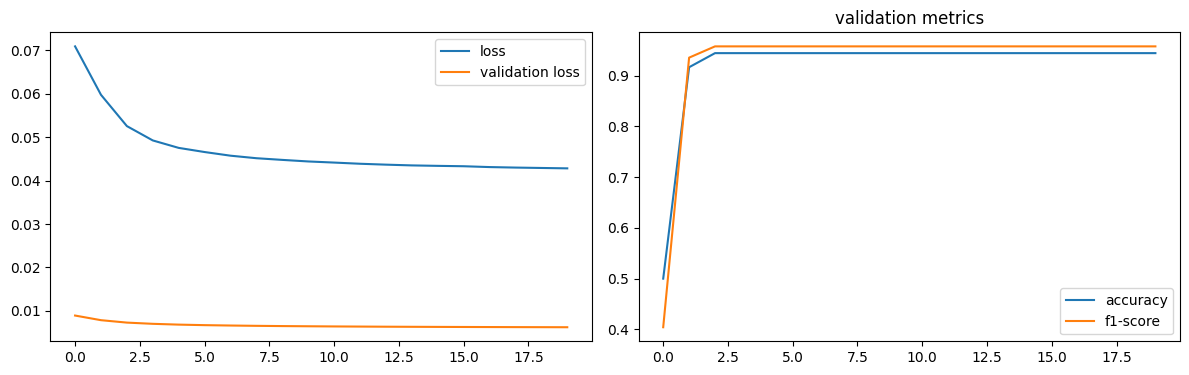

Test: loss: 0.34874072670936584, avg metrics: (0.9668805003166199, 0.9698132157325745)
dropping feature: (8, 'neuron29')


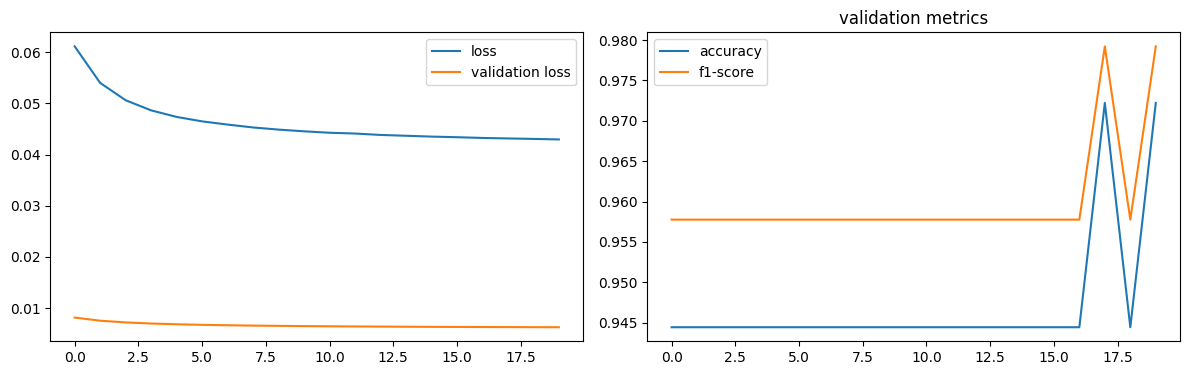

Test: loss: 0.3484155535697937, avg metrics: (0.9640636086463928, 0.9673707008361816)
dropping feature: (7, 'neuron27')


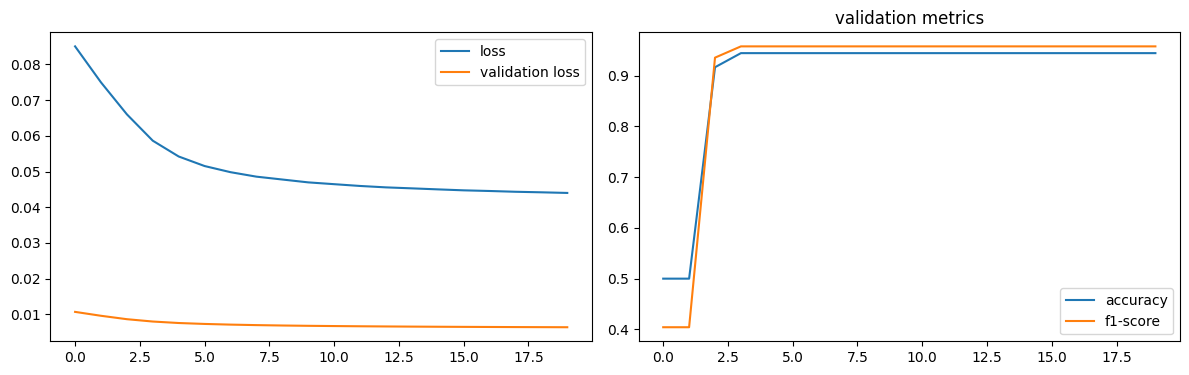

Test: loss: 0.35574302077293396, avg metrics: (0.9616650700569153, 0.9649556517601013)
dropping feature: (3, 'neuron17')


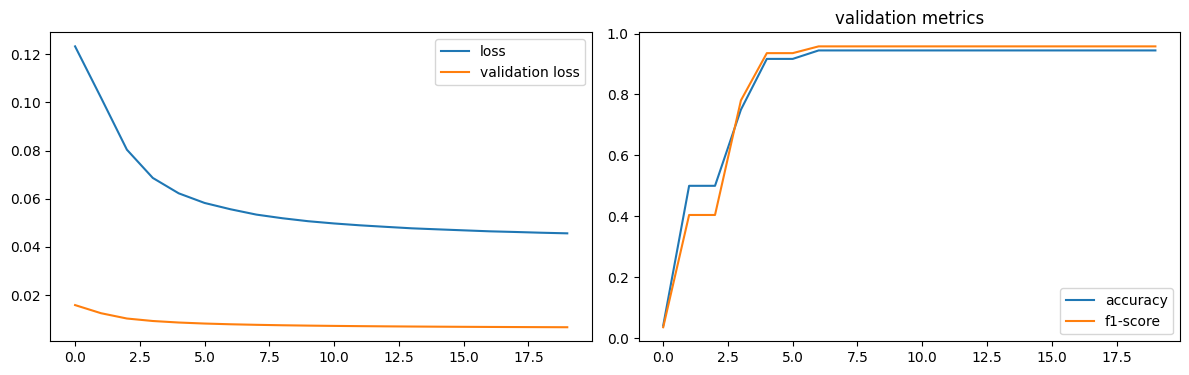

Test: loss: 0.3676415681838989, avg metrics: (0.9654720544815063, 0.96858891248703)
dropping feature: (2, 'neuron15')


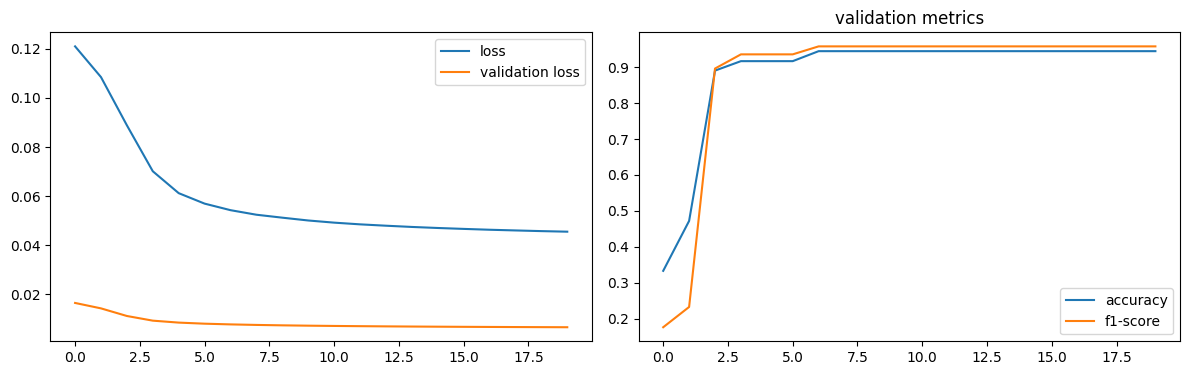

Test: loss: 0.3669990599155426, avg metrics: (0.9640636086463928, 0.9673646092414856)
dropping feature: (5, 'neuron30')


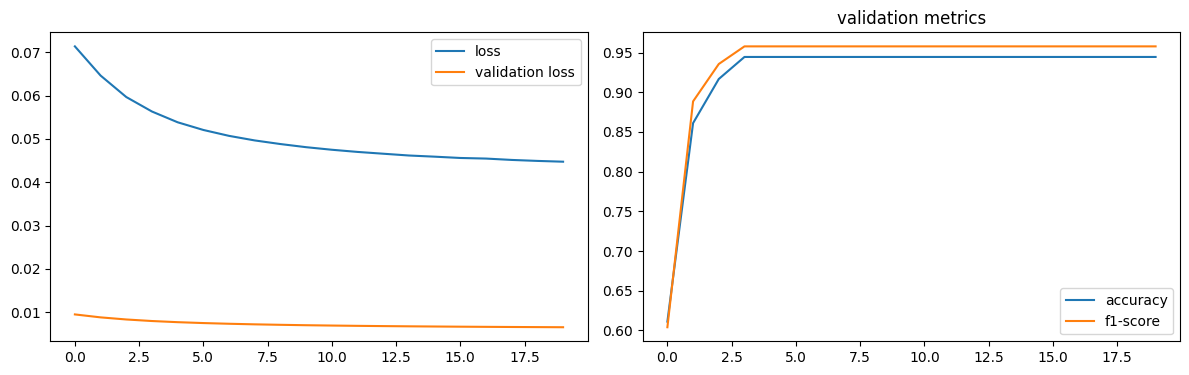

Test: loss: 0.3615477979183197, avg metrics: (0.9625017642974854, 0.965016782283783)
dropping feature: (0, 'neuron7')


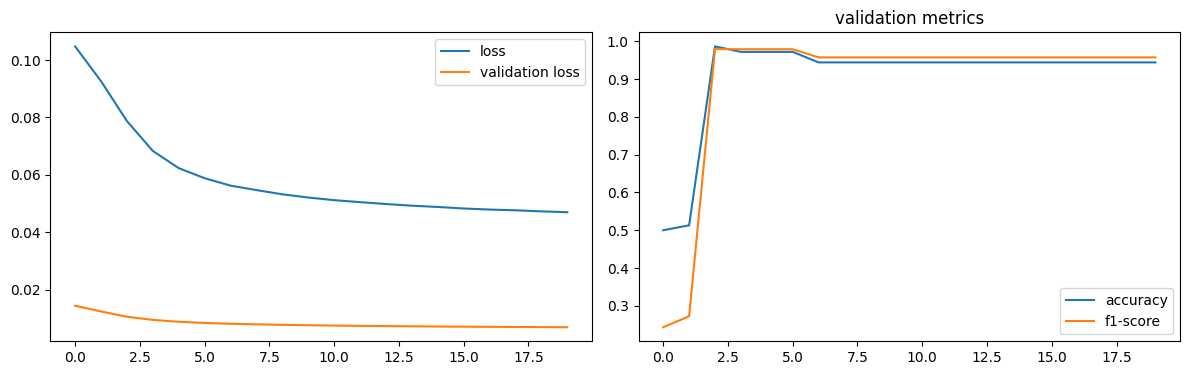

Test: loss: 0.3764992654323578, avg metrics: (0.9711058497428894, 0.9734681606292724)
dropping feature: (0, 'neuron8')


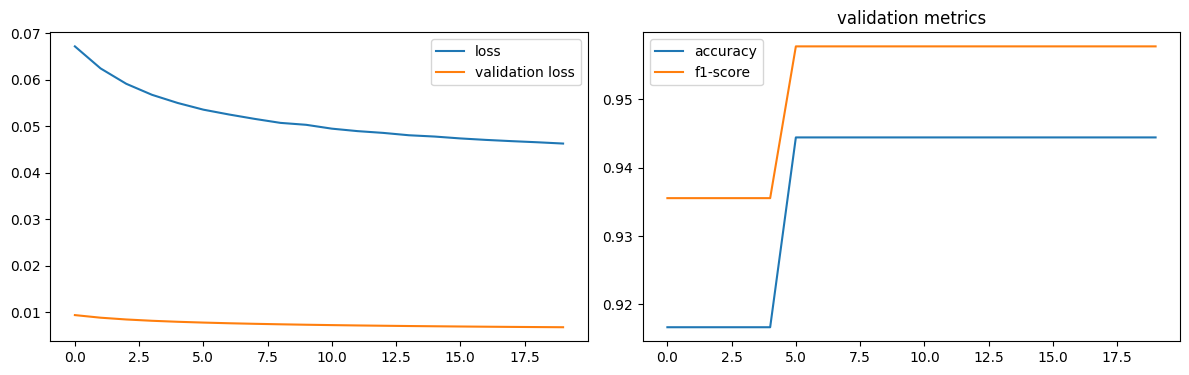

Test: loss: 0.3722105622291565, avg metrics: (0.9546227931976319, 0.9588085770606994)
dropping feature: (3, 'neuron31')


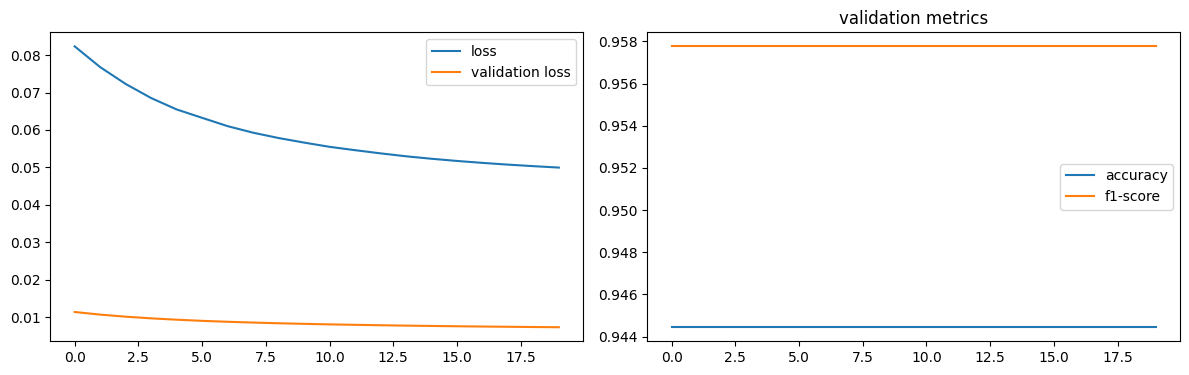

Test: loss: 0.39743733406066895, avg metrics: (0.9696973919868469, 0.9722557306289673)
dropping feature: (1, 'neuron23')


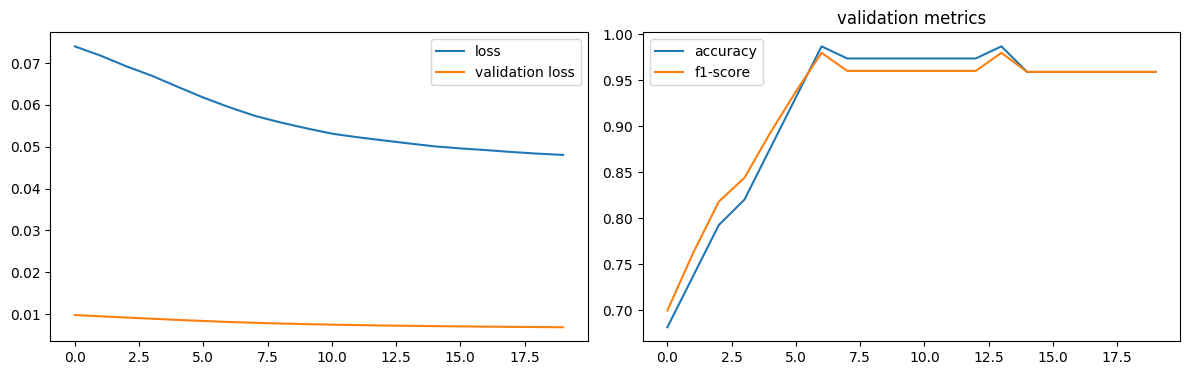

Test: loss: 0.3797805607318878, avg metrics: (0.9658904075622559, 0.968593168258667)
dropping feature: (0, 'neuron18')


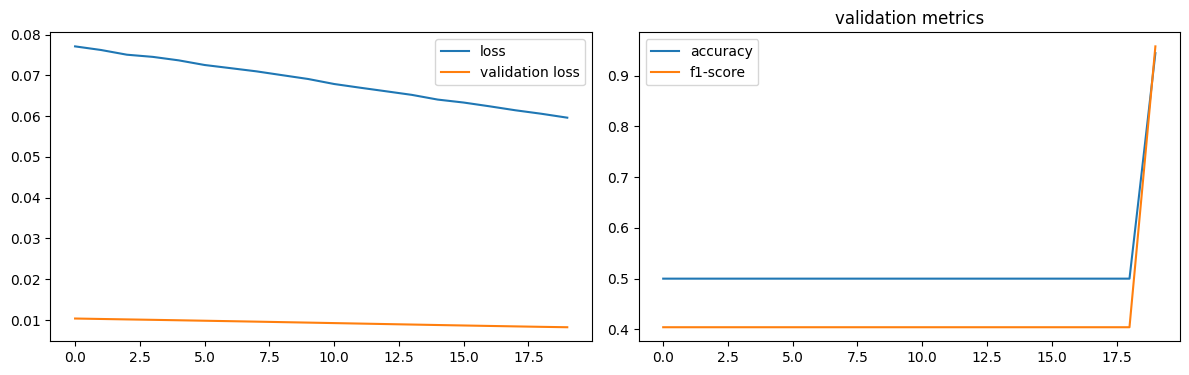

Test: loss: 0.489169716835022, avg metrics: (0.782945203781128, 0.7322863698005676)


In [36]:
torch.manual_seed(2024)

headers = [f"neuron{i}" for i in range(32)]


def model_factory(size):
    model = BreastCancerNN(1, (1, size), 2)
    model.layer1 = nn.Identity()
    model.layer2 = nn.Identity()
    return model


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs, 20,
    labels, "", None
)

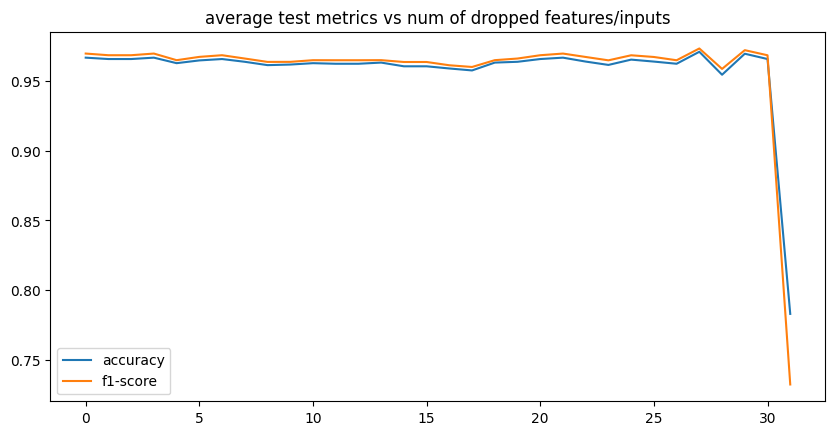

In [37]:
plot_dropping_metrics(test_metrics, labels)

In [38]:
num_drop_neurons = 30

save_models("breast", "fast-layer3", models, dropped)

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].out

best_model.out = layer
best_model.layer2[0] = reduce_linear(best_model.layer2[0], dropped, num_drop_neurons)

features left [2]:  ['neuron18', 'neuron24']


### pruned

In [39]:
best_model

BreastCancerNN(
  (layer1): Sequential(
    (0): Linear(in_features=7, out_features=12, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=12, out_features=2, bias=True)
    (1): ReLU()
  )
  (out): Linear(in_features=2, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

In [40]:
with torch.no_grad():
    inputs, targets = fast_dataset["test"][:]
    outputs = best_model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test {labels}: {test_metrics}")

test ('accuracy', 'f1-score'): (0.9710639715194702, 0.9700796604156494)


test: ('accuracy', 'f1-score'): (0.9668805003166199, 0.9698193073272705)


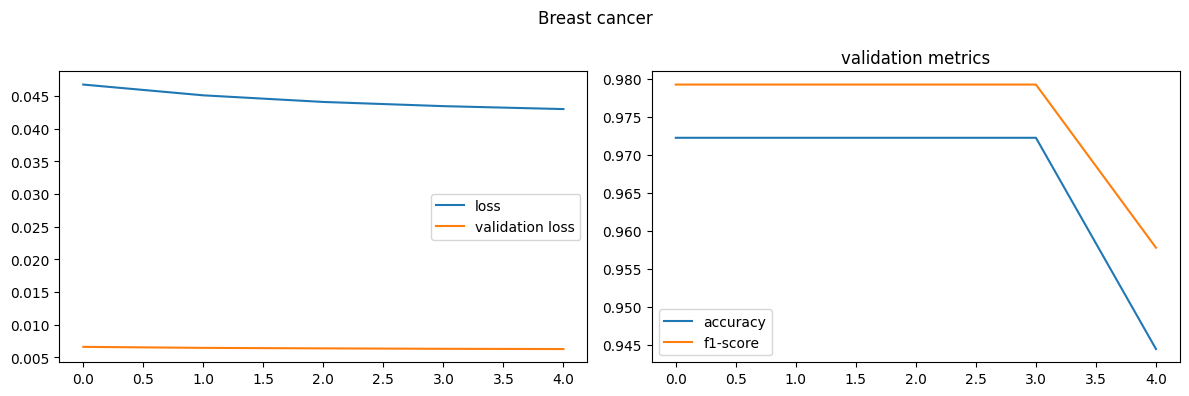

In [41]:
optimizer = optimizer_factory(best_model)
metrics = model_train(fast_dataset, best_model, optimizer, criterion, score_outputs, 5)

with torch.no_grad():
    inputs, targets = fast_dataset["test"][:]
    outputs = best_model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test: {labels}: {test_metrics}")
plot_metrics('Breast cancer', metrics, labels)

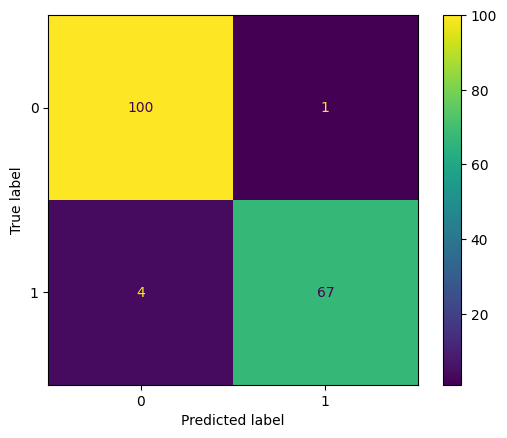

In [42]:
ConfusionMatrixDisplay.from_predictions(targets, outputs.argmax(dim=1))
plt.show()

In [43]:
save_models("breast", "fast-prunned", [best_model], None)